pygame 2.1.2 (SDL 2.0.18, Python 3.8.16)
Hello from the pygame community. https://www.pygame.org/contribute.html
ATTRIB(#113F)
ATTRIB(#1141)
ATTRIB(#1142)
ATTRIB(#1143)
ATTRIB(#1144)
[[65.317 19.791]
 [67.317 19.791]
 [69.317 19.791]
 [66.317 19.791]
 [68.317 19.791]]
[False  True False False False] [False False  True False False]
2.0 3.0
[False False  True False False] [False False False  True False]
3.0 4.0
[False False False  True False] [False False False False False]
[False False False False False] [False False False False False]
[[2. 3.]
 [3. 4.]]
CAD:  0.21516108512878418 seconds
Matrix B.BT: dimension 6x6 Rank 3
Problem built-up 0.08826851844787598 seconds
(3, 7) (12, 7)
(15, 19) 3 12
(12, 19)
15
[[ 1.         -0.64940759  0.          0.          0.          0.
   0.        ]
 [-1.         -0.64940759  0.          0.          0.          0.
   0.        ]
 [ 0.         -1.          1.          0.          0.          0.
   0.        ]
 [ 0.         -1.         -1.          0.  

C:\Users\mmoussa\AppData\Local\Temp\ipykernel_15900\1466863100.py:465: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  blockjLoadcheck = np.where(Live_loads['Blocks']['concentrated'][:,0] ==str(j))[0]
C:\Users\mmoussa\AppData\Local\Temp\ipykernel_15900\1466863100.py:497: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  blockjLoadcheck = np.where(Dead_loads['Blocks']['concentrated'][:,0] ==str(j))[0]
C:\Users\mmoussa\AppData\Local\Temp\ipykernel_15900\1466863100.py:533: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  edgeLoadcheck = np.where( Live_loads['Edges']['continuous'][:,0] == edgeindex)[0]
C:\Users\mmoussa\AppData\Local\Temp\ipykernel_15900\1466863100.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the fut

     pcost       dcost       gap    pres   dres   k/t
 0: -2.3971e-14 -2.3932e+03  2e+03  3e-14  7e+00  1e+00
 1: -1.8566e-01 -4.1168e+01  4e+01  3e-16  1e-01  1e+00
 2: -2.3922e-01 -2.8494e+00  3e+00  5e-16  8e-03  9e-02
 3: -6.1119e-01 -1.4516e+00  8e-01  3e-16  3e-03  4e-02
 4: -6.4375e-01 -6.7494e-01  3e-02  2e-16  1e-04  2e-03
 5: -6.4935e-01 -6.4967e-01  3e-04  2e-16  1e-06  2e-05
 6: -6.4941e-01 -6.4941e-01  3e-06  4e-16  1e-08  2e-07
 7: -6.4941e-01 -6.4941e-01  3e-08  2e-16  1e-10  2e-09
Optimal solution found.
(4, 7) (4, 1) (14, 7) (14, 1) (7, 1)
-0.6494075875320746
7 4 14
Static approach:  0.3090524673461914 seconds
static: 7 4 14
alpha 0.15
-0.6494075875320746
alpha 0.075
-0.6494075875320746
alpha 0.0375
-0.6494075875320746
tol 0.0
18


ValueError: `lb`, `ub`, and `keep_feasible` must be broadcastable to shape `A.shape[0:1]`

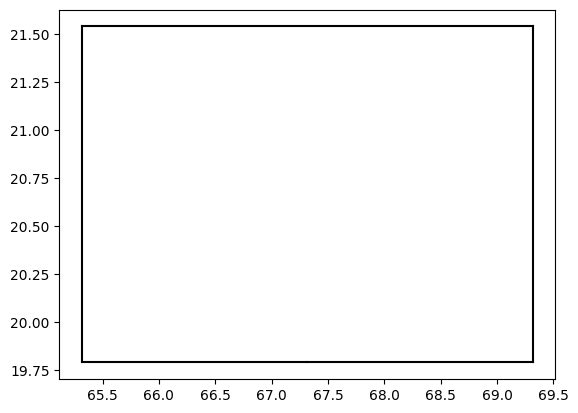

In [1]:
from shapely.geometry import Polygon
from rtree import index
import ezdxf
import time
from cvxopt import solvers, matrix
import numpy as np
import pygame
from shapely.geometry import Point
import shapely.geometry.polygon 
from matplotlib.patches import Polygon
from sympy import linear_eq_to_matrix, symbols
import math
import matplotlib.pyplot as plt
from colormath.color_objects import LabColor, XYZColor
from colormath.color_conversions import convert_color
import matplotlib.transforms as mtransforms
from matplotlib.colors import Normalize
from matplotlib.colors import BoundaryNorm
from matplotlib.cm import ScalarMappable
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
from scipy.optimize import minimize, LinearConstraint, linprog, least_squares, root,fsolve
# Load the blocks data from the file


phi_nonass =0
blocks = []

cohesion = 0
phi = 33

left_limit = [67.37,16.51]  #left bottom limit of the region where edges have different cohesions and friction angles
right_limit = [69.29,18.325] #right top limit of the region where edges have different cohesions and friction angles
cohesion1 = 0
phi1 = 33

max_comp = 999
max_ten = 0
start_cad = time.time()
fname = ["wall_data_Gilbert.txt","mechanic_data_ex1blocks.txt"]
# Open DXF file
dxf_file = "H:\Python-projects\ex1blocks1nodes.dxf" 
doc = ezdxf.readfile(dxf_file)  # import the dxf file
msp = doc.modelspace() #read data in the file

block_references = msp.query("INSERT") #import block references from the dxf file
support_edges = np.empty((0,2))
edges = [] # Initialize empty list to store edges
ind =0 #block index
allnodes = set() #collect all nodes from the drawing

# Extract all the block references data
for block_reference in block_references:
    points = block_reference.explode() #explode blocks references into polylines
    block_polygon = [] #define a variable to temporarily store current block references in form of polygon 
    vertices = points[0].get_points() # Get polygon vertices
    for element in range(0,len(vertices)): #enumerate all block references vertices
        node_coordinates = tuple([round(vertices[element][0],3),round(vertices[element][1],3)]) #extract nodes coordinates of the current vertex
        allnodes.add(node_coordinates)
        block_polygon.append( [round(vertices[element][0],3),round(vertices[element][1],3) ]) 

    block_polygon  = shapely.geometry.polygon.Polygon(block_polygon)   # convert the current block to a "python" polygon
    #add current block's data to the blocks dictionary which collects all blocks data
    blocks.append({
        'id': ind,
        'polygon': block_polygon
    })
    ind = ind+1 # increase blocks indexing variable by 1

# Extract all polylines data
# Open DXF file
doc = ezdxf.readfile(dxf_file)  # import the dxf file
msp = doc.modelspace() #read data in the file
polygons = msp.query('LWPOLYLINE') # Extract all polygon entities
polygons.extend(msp.query('3DFACE'))
# Iterate over polygons
for poly in polygons:
    block_polygon = []
    # Get polygon vertices
    vertices = poly.get_points()

    for element in range(0,len(vertices)): #enumerate all polylines vertices

        node_coordinates = tuple([round(vertices[element][0],3),round(vertices[element][1],3)]) #extract nodes coordinates of the current vertex
        allnodes.add(node_coordinates)


        block_polygon.append( [round(vertices[element][0],3),round(vertices[element][1],3) ]) 

    block_polygon  = shapely.geometry.polygon.Polygon(block_polygon) # convert the current block to a "python" polygon  
    #add current block's data to the blocks dictionary which collects all blocks data
    blocks.append({
        'id': ind,
        'polygon': block_polygon
    })
    ind = ind+1 # increase blocks indexing variable by 1

#reorganize nodes data
ind = 1 # nodes indexing variable
nodes = np.empty((0,3)) #create an array to reorganize nodes data previously extracted
for element in allnodes: #enumerate all nodes 
    nodes= np.append(nodes,np.array([[ind,element[0],element[1]]]),axis=0) # organize data for the current node (index,xcoor,ycoor)
    ind += 1   # increase node indexing variable by 1  

#Extract attributes
# Open DXF file
doc = ezdxf.readfile(dxf_file)  # import the dxf file
msp = doc.modelspace() #read data in the file
block_references = msp.query("INSERT")
attrib_points =[] 
for block_reference in block_references:
    entity = block_reference  # process all entities
    attrib_points = np.empty((0,2)) # define attribute points vector
    
    for attrib in entity.attribs:
        print(attrib)
        attrib_point = ( attrib.dxf.insert[0],
                         attrib.dxf.insert[1]) # calculate position of an attribute
        attrib_points = np.append(attrib_points,np.array([[round(attrib_point[0],3),round(attrib_point[1],3)]]),axis=0)
    print(attrib_points)
    for element in range(0,len(attrib_points)-1):
        condition1= (nodes[:,1] == attrib_points[element,0]) & (nodes[:,2] == attrib_points[element,1]) #find the position of the first point

        condition2 = (nodes[:,1] == attrib_points[element+1,0]) & (nodes[:,2] == attrib_points[element+1,1]) #find the position of the first point
        print(condition1,condition2)
        if (len(nodes[condition1,:]) !=0) & (len(nodes[condition2,:]) !=0):

            node1_ind = nodes[condition1,:][0][0]   # index of the first node of the attribute
            node2_ind = nodes[condition2,:][0][0] # index of the second node of the attribute
            print(node1_ind,node2_ind)
            support_edges = np.append(support_edges,np.array([[min(node1_ind,node2_ind),max(node1_ind,node2_ind)]]),axis=0) #add indices to the global matrix
    attrib_points =[]

print(support_edges)
# Create an R-Tree index to find neighboring blocks
p = index.Property()
ind = index.Index(properties=p) # extract R-Tree tools
for i, block in enumerate(blocks):
    ind.insert(i, block['polygon'].bounds) #add blocks boundaries 

# Iterate over the blocks and check for connections
edges = np.empty((0,4)) #define edges array
blocks_data = np.empty((0,2)) #define new block
edgeind = 1
unique_nodes = set() #find nodes without repetition
for i in range(len(blocks)):

    block = blocks[i]
    blockunique_nodes = set() #all nodes for the current block

    nearby_blocks = ind.intersection(block['polygon'].bounds) # Find all nearby blocks for the current block using the R-Tree index

    for nearby_block in nearby_blocks:

        # Check if the nearby block is actually connected to the current block
        if block['polygon'].intersects(blocks[nearby_block]['polygon']) or block['polygon'].touches(blocks[nearby_block]['polygon']):

            intersection = block['polygon'].intersection(blocks[nearby_block]['polygon'])

            if isinstance(intersection, shapely.geometry.polygon.Polygon): #if the intersection is a polygon

                xx, yy = intersection.exterior.coords.xy
                for i in range(0,len(xx)):
                    node_coordinates = tuple([xx[i],yy[i]])
                    unique_nodes.add(node_coordinates)
                    blockunique_nodes.add(node_coordinates)

            else: #if the intersection is a line

                for i in range(0,len(intersection.xy[0])):
                    node_coordinates = tuple([intersection.xy[0][i],intersection.xy[1][i]]) 
                    unique_nodes.add(node_coordinates) # add the current node to the nodes list
                    blockunique_nodes.add(node_coordinates) #add the current node to all current block nodes
            #connections.append((block['id'], blocks[nearby_block]['id']))

    block_nodes = np.empty((0,2))  #variable to reorganize the block's data      
    for element in blockunique_nodes:
        block_nodes= np.append(block_nodes,np.array([[element[0],element[1]]]),axis=0) # collect all the current block nodes in a specific array form

    block_nodes = block_nodes.T
    blockjnodesX = np.array(block_nodes[0])
    #print(blockjnodesX)
    blockjnodesY = np.array(block_nodes[1])

    A = [blockjnodesX,blockjnodesY] 
    A = A - np.mean(A,1)[:, None]
    A = np.argsort(np.arctan2(A[1,:],A[0,:]))
    blockjnodesX = blockjnodesX[A]      
    blockjnodesY = blockjnodesY[A]
    blockjnodesX = np.append(blockjnodesX,np.array([blockjnodesX[0]]))
    blockjnodesY = np.append(blockjnodesY,np.array([blockjnodesY[0]]))
    for element in range(0,len(blockjnodesX)-1):

        condition = (nodes[:, 1] == blockjnodesX[element]) & (nodes[:, 2] == blockjnodesY[element]) #look for the first vertex
        vertex1 = nodes[condition, :] #extract first vertex data
        condition = (nodes[:, 1] == blockjnodesX[element+1]) & (nodes[:, 2] == blockjnodesY[element+1]) #look for the first vertex
        vertex2 = nodes[condition, :] #extract first vertex data
        vertex1 = vertex1[0]
        vertex2 = vertex2[0]
        min_ind = int(min(vertex1[0],vertex2[0]))
        max_ind = int(max(vertex1[0],vertex2[0]))
        condition = (edges[:,1] ==min_ind) & (edges[:,2] ==max_ind) # search the current edge in the egdes list
        if len(edges[condition, :]) ==0: #if the edge does not already exist in the list
            edges = np.append(edges,np.array([[int(edgeind),int(min_ind),int(max_ind),int(0)]]),axis =0)
            blocks_data = np.append(blocks_data,np.array([[block['id']+1,edgeind]]),axis =0)
            edgeind +=1
        else: #if the edge already exists in the list
            rep_edgeind = edges[condition, :][0][0] #find the repeated edge index in the list to add it to the block edges column

            edges[int(rep_edgeind)-1][3]=1

            blocks_data = np.append(blocks_data,np.array([[block['id']+1,rep_edgeind]]),axis =0)

# Give value 2 to edges on supports 
for element in support_edges:
    edge_elements  = edges[(edges[:,1] == element[0]) & (edges[:,2] == element[1]) ,:][0] # extract current edge elements
    edges[int(edge_elements[0])-1][3] = 2
    # Print the connections


support_ind = np.empty((0,1)) 
contact_ind = np.empty((0,1))
for element in edges:
    if element[3] == 1:
        contact_ind = np.append(contact_ind,np.array([[str(int(element[0]))]]))
    if element[3] == 2:
        support_ind = np.append(support_ind,np.array([[str(int(element[0]))]]))

blocks  =  blocks_data #create an  array for blocks

strength = np.zeros((len(contact_ind) + len(support_ind),5)) #create an empty array for edges characteristics
strength = strength.astype(str)
strength[:,0] = [*contact_ind,*support_ind]
strength[:,1] = (len(contact_ind) + len(support_ind))*[str(cohesion)]
strength[:,2] = (len(contact_ind) + len(support_ind)) * [str(phi)]
strength[:,3] = (len(contact_ind) + len(support_ind)) * [str(max_comp)]
strength[:,4] = (len(contact_ind) + len(support_ind)) * [str(max_ten)]

if len(support_ind): 
    support =  np.zeros((len(support_ind),4)) #create an empty array for the support data
    support = support.astype(str)
    support[:,0] = support_ind
    support[:,1] = (len(support_ind))*[str(0)]
    support[:,2] = (len(support_ind))*[str(0)]
    support[:,3] = (len(support_ind))*[str(0)]

    strength[-1:][0][1:3] = [cohesion1,phi1]

edges_perm = np.empty((0,4))
for element in range(0,len(edges)):
    edges_perm  = np.append(edges_perm ,np.array([[str(int(edges[element][0])),str(int(edges[element][1])),str(int(edges[element][2])),str(int(edges[element][3]))]]),axis=0)
edges = edges_perm 

blocks_perm = np.empty((0,2))
for element in range(0,len(blocks)):
    blocks_perm  = np.append(blocks_perm ,np.array([[str(int(blocks[element][0])),str(int(blocks[element][1]))]]),axis=0)
blocks = blocks_perm    

nodes_perm = np.empty((0,3))
for element in range(0,len(nodes)):
    nodes_perm  = np.append(nodes_perm ,np.array([[str(int(nodes[element][0])),str(nodes[element][1]),str(nodes[element][2])]]),axis=0)
nodes = nodes_perm   

end_cad = time.time()
print("CAD: " ,end_cad-start_cad, "seconds")

start_prob = time.time()

blocks = blocks_perm
nodes = nodes_perm
edges = edges_perm
Dead_loads = dict()
Dead_loads['Edges'] = dict()
Dead_loads['Blocks'] = dict()
Dead_loads['Edges']['concentrated']= np.empty((0,7))
Dead_loads['Edges']['continuous']= np.empty((0,8))
Dead_loads['Blocks']['concentrated']= np.empty((0,7))
Dead_loads['Blocks']['volume']= np.empty((0,3))
Live_loads = dict()
Live_loads['Edges'] = dict()
Live_loads['Blocks'] = dict()
Live_loads['Edges']['concentrated']= np.empty((0,7))
Live_loads['Edges']['continuous']= np.empty((0,8))
Live_loads['Blocks']['concentrated']= np.empty((0,7))
Live_loads['Blocks']['volume']= np.empty((0,3))
Live_loadsvect = np.empty((0,1))
Dead_loadsvect = np.empty((0,1))
try:
    file = open(fname[0],'r') #check if the file exists
except: 
    print('File can not be opened:',fname) # if the file is not found
    quit()
Textlines = file.readlines() 
file.close()    


# Read the mechanic file 
try:
    file = open(fname[1],'r') #check if the file exists
except: 
    print('File can not be opened:',fname) # if the file is not found
    quit()
Textlines = file.readlines() 
file.close() 
#extract strength data

#extract Loads data
for line in range(4,len(Textlines)):
    if not Textlines[line].startswith('block'):

        if  not Textlines[line]=='\n':
            line_content = Textlines[line].rstrip() 
            line_split = line_content.split("\t")
            Dead_loads['Edges']['concentrated'] = np.append(Dead_loads['Edges']['concentrated'],np.array([[line_split[0],line_split[1],line_split[2],line_split[3],line_split[4],line_split[5],line_split[6]]]),axis =0) 

    else:
        line_block_Dccload = line
        break

for line in range(line_block_Dccload+1,len(Textlines)):
    if not Textlines[line].startswith('Continuous'):
        if  not Textlines[line]=='\n':
            line_content = Textlines[line].rstrip() 

            line_split = line_content.split("\t")

            Dead_loads['Blocks']['concentrated'] = np.append(Dead_loads['Blocks']['concentrated'],np.array([[line_split[0],line_split[1],line_split[2],line_split[3],line_split[4],line_split[5],line_split[6]]]),axis =0)  
    else:
        line_Edge_Dcnload = line
        break
for line in range(line_Edge_Dcnload+2,len(Textlines)):
    if not Textlines[line].startswith('Block'):
        if  not Textlines[line]=='\n':
            line_content = Textlines[line].rstrip() 
            line_split = line_content.split("\t")
            Dead_loads['Edges']['continuous'] = np.append(Dead_loads['Edges']['continuous'],np.array([[line_split[0],line_split[1],line_split[2],line_split[3],line_split[4],line_split[5],line_split[6],line_split[7]]]),axis =0)  
    else:
        line_block_Dcnload = line
        break
for line in range(line_block_Dcnload+1,len(Textlines)):
    if not Textlines[line].startswith('Live'):
        if  not Textlines[line]=='\n':
            line_content1 = Textlines[line].rstrip() 
            line_content = Textlines[line_block_Dcnload+1].rstrip()
            line_split = line_content.split("\t")
            line_split1 = line_content1.split("\t")

            Dead_loads['Blocks']['volume'] = np.append(Dead_loads['Blocks']['volume'],np.array([[line_split1[0],line_split[1],line_split[2]]]),axis =0)  
    else:
        line_edge_Lccload = line
        break

for line in range(line_edge_Lccload+3,len(Textlines)):
    if not Textlines[line].startswith('block'):
        if  not Textlines[line]=='\n':
            line_content = Textlines[line].rstrip() 
            line_split = line_content.split("\t")


            Live_loads['Edges']['concentrated'] = np.append(Live_loads['Edges']['concentrated'],np.array([[line_split[0],line_split[1],line_split[2],line_split[3],line_split[4],line_split[5],line_split[6]]]),axis =0)  
    else:
        line_block_Lccload = line
        break
for line in range(line_block_Lccload+1,len(Textlines)):
    if not Textlines[line].startswith('Continuous'):
        if  not Textlines[line]=='\n':
            line_content = Textlines[line].rstrip()

            line_split = line_content.split("\t")


            Live_loads['Blocks']['concentrated'] = np.append(Live_loads['Blocks']['concentrated'],np.array([[line_split[0],line_split[1],line_split[2],line_split[3],line_split[4],line_split[5],line_split[6]]]),axis =0)  
    else:
        line_Edge_Lcnload = line
        break

for line in range(line_Edge_Lcnload+2,len(Textlines)):
    if not Textlines[line].startswith('Block'):
        if  not Textlines[line]=='\n':
            line_content = Textlines[line].rstrip() 
            line_split = line_content.split("\t")
            Live_loads['Edges']['continuous'] = np.append(Live_loads['Edges']['continuous'],np.array([[line_split[0],line_split[1],line_split[2],line_split[3],line_split[4],line_split[5],line_split[6],line_split[7]]]),axis =0)  
    else:
        line_block_Lcnload = line
        break
for line in range(line_block_Lcnload+1,len(Textlines)):

    if  not Textlines[line]=='\n':
        line_content1 = Textlines[line].rstrip()
        line_content = Textlines[line_block_Lcnload+1].rstrip()

        line_split = line_content.split("\t")
        line_split1 = line_content1.split("\t")

        Live_loads['Blocks']['volume'] = np.append(Live_loads['Blocks']['volume'],np.array([[line_split1[0],line_split[1],line_split[2]]]),axis =0)  

#edge_ind, edge_rep) = (np.unique(blocks[:,1],return_counts=True)) # find all block interfaces indices (x) and the number of repetation of each one (y)  

#dge_ind = [int(edge_ind[element]) for element in range(len(edge_ind))]
#dge_rep = edge_rep[np.argsort(edge_ind)]
#edge_ind = np.sort(np.array(edge_ind))
#edges[:,3] = [int(element) for element in (edge_rep != np.ones(len(edge_rep)))]
#for element in range(0,len(edges)):
  #  if not len(np.where(support[:,0] == edges[element][0])[0]) ==0:
 #       edges[element][3] ='2'
allequations =[]; # system of equilibrium equations 
allvar = []; #collect all interfaces variables
blockscenters = np.array([])
activeEdgesInd = np.empty((0,1)) # collect all active edges indices 
i=0 #block indexing variable
testvect = np.empty((0,1)) # check whether each edge variable is equal to zero
strength = [[float(strength[element1][element2]) for element2 in range(0,strength.shape[1]) ]for element1 in range(0,strength.shape[0])]
strength = np.array(strength) 
C=np.array([[]]); #define the rupture criteria matrix
C_nonass = np.array([[]]); #define the rupture criteria matrix for non ass
coh = np.empty((0,1)) #cohesion vector
allpolygons = dict() # collect all blocks as polygons
edgesIndCoor = dict() # collect all edges for drawing (with repetition)
blockedgesInd = dict() #collect block index for each edge in the variable edgesIndCoor
while i < len(blocks):
    Live_loadsvect = np.append(Live_loadsvect, np.array([[0],[0],[0]]),axis=0) #add lines for the block j live loads
    Dead_loadsvect = np.append(Dead_loadsvect, np.array([[0],[0],[0]]),axis=0) #add lines for the block j dead loads
    j = int(blocks[i][0] ) #block index

    c=np.where( blocks[:,0] ==str(j ))    # collect the coordinates of vertices belonging to the block 

    x = blocks[c[0]]
    y = [[   int(edges[int(x[element][1])-1][1]), int(edges[int(x[element][1])-1][2])  ]  for element in range(len(x)) ]
    z1 = [[   float(nodes[int(y[element][0])-1][1]), float(nodes[int(y[element][0])-1][2])  ]  for element in range(len(y)) ]
    z2 = [[   float(nodes[int(y[element][1])-1][1]), float(nodes[int(y[element][1])-1][2])  ]  for element in range(len(y)) ]
    blockjnodes = z1+z2
    blockjnodes = np.unique(blockjnodes,axis=0)
    blockjnodes = list(zip(*blockjnodes))

    blockjnodesX = np.array(blockjnodes[0])
    blockjnodesY = np.array(blockjnodes[1])

    A = [blockjnodesX,blockjnodesY] 
    A = A - np.mean(A,1)[:, None]
    A = np.argsort(np.arctan2(A[1,:],A[0,:]))
    blockjnodesXsort = blockjnodesX[A]    # x coordinates of all vertices of block j  
    blockjnodesYsort = blockjnodesY[A]     # y coordinates of all vertices of block j
    x = np.column_stack((blockjnodesXsort,blockjnodesYsort))
    polygon = shapely.geometry.polygon.Polygon(x)  #convert x to an area
    allpolygons[str(j)] = x
    area = polygon.area # calculate the area of the block j
    blockjcenter = np.array([polygon.centroid.xy[0][0],polygon.centroid.xy[1][0]]) # center of gravity of the block j
    blockscenters = np.concatenate((blockscenters,np.array([polygon.centroid.xy[0][0],polygon.centroid.xy[1][0]])))
    #Add blocks dead and live loads
    #check volumetric live loads
    blockjLoadcheck = np.where(Live_loads['Blocks']['volume'][:,0] ==str(j))[0]
    blockjliveX = 0
    blockjliveY = 0
    blockjmoment = 0

    # Calculate live loads vector for block j
    #step 1: volumetric live loads
    if not len(blockjLoadcheck) ==0:
        for element in blockjLoadcheck:

            blockjliveX = blockjliveX + float(Live_loads['Blocks']['volume'][int(element)][1])*area
            blockjliveY = blockjliveY + float(Live_loads['Blocks']['volume'][int(element)][2])*area
            
    # step 2: concentrated live loads
    blockjLoadcheck = np.where(Live_loads['Blocks']['concentrated'][:,0] ==str(j))[0]
    if not len(blockjLoadcheck) ==0:
        for element in blockjLoadcheck:

            refpointX = float(nodes[int(Live_loads['Blocks']['concentrated'][element][4])-1][1])
            refpointY = float(nodes[int(Live_loads['Blocks']['concentrated'][element][4])-1][2])

            pointloadX = refpointX + float(Live_loads['Blocks']['concentrated'][element][5])
            pointloadY =  refpointY + float(Live_loads['Blocks']['concentrated'][element][6]) #are the coor sorted !
            loadX = float(Live_loads['Blocks']['concentrated'][element][1])
            loadY = float(Live_loads['Blocks']['concentrated'][element][2])
            moment = float(Live_loads['Blocks']['concentrated'][element][3])
            blockjliveX = blockjliveX + loadX  
            blockjliveY = blockjliveY + loadY
            blockjmoment = blockjmoment + moment + \
                           np.cross(-np.array(blockjcenter)+np.array([[pointloadX,pointloadY]]),np.array([[loadX,loadY]]))[0]

    Live_loadsvect[-3:] = np.array([[blockjliveX],[blockjliveY],[blockjmoment]]) # add block j live loads to the live loads vector

    # Calculate dead loads vector for block j
    blockjLoadcheck = np.where(Dead_loads['Blocks']['volume'][:,0] ==str(j))[0]
    blockjdeadX = 0
    blockjdeadY = 0
    blockjmoment = 0
    #step 1: volumetric dead loads
    if not len(blockjLoadcheck) ==0:
        for element in blockjLoadcheck:

            blockjdeadX = blockjdeadX + float(Dead_loads['Blocks']['volume'][int(element)][1])*area
            blockjdeadY = blockjdeadY + float(Dead_loads['Blocks']['volume'][int(element)][2])*area

    # step 2: concentrated dead loads
    blockjLoadcheck = np.where(Dead_loads['Blocks']['concentrated'][:,0] ==str(j))[0]
    if not len(blockjLoadcheck) ==0:
        for element in blockjLoadcheck:

            refpointX = float(nodes[int(Dead_loads['Blocks']['concentrated'][element][4])-1][1])
            refpointY = float(nodes[int(Dead_loads['Blocks']['concentrated'][element][4])-1][2])

            pointloadX = refpointX + float(Dead_loads['Blocks']['concentrated'][element][5])
            pointloadY =  refpointY + float(Dead_loads['Blocks']['concentrated'][element][6]) #are the coor sorted !


            loadX = float(Dead_loads['Blocks']['concentrated'][element][1])
            loadY = float(Dead_loads['Blocks']['concentrated'][element][2])
            moment = float(Dead_loads['Blocks']['concentrated'][element][3])

            blockjdeadX = blockjdeadX + loadX  
            blockjdeadY = blockjdeadY + loadY
            blockjmoment = blockjmoment + moment + \
                           np.cross(-np.array(blockjcenter)+np.array([[pointloadX,pointloadY]]),np.array([[loadX,loadY]]))[0]

    Dead_loadsvect[-3:] = np.array([[blockjdeadX],[blockjdeadY],[blockjmoment]]) # add block j dead loads to the live loads vector
    blockjvector = []; # edges vectors of the block j

    while int(blocks[i][0]) == j:          # extracting all edges of the block j

        vertex1 = nodes[int(edges[int(blocks[i][1])-1][1])-1] #extract the data of the first vertex of an edge
        vertex2 = nodes[int(edges[int(blocks[i][1])-1][2])-1] #extract the data of the second vertex of an edge
        vertex1coor = np.array([float(vertex1[element]) for element in range(1,len(vertex1))  ])
        vertex2coor = np.array([float(vertex2[element]) for element in range(1,len(vertex2)) ])
        edgeindex = edges[int(blocks[i][1])-1][0] # current edge index
        edgesIndCoor[str(i+1)] = np.array([[edgeindex,vertex1coor[0],vertex2coor[0],vertex1coor[1],vertex2coor[1]]]) #find edges indices with repetition
        blockedgesInd[str(i+1)] = j #find blocks the current edge belongs to
        plt.plot([vertex1coor[0],vertex2coor[0]], [vertex1coor[1],vertex2coor[1]],'k' )

        edgelength = math.sqrt((vertex1coor[0]-vertex2coor[0])**2 + (vertex1coor[1]-vertex2coor[1])**2 )          
        #Add edge dead and live loads
        edgeLoadcheck = np.where( Live_loads['Edges']['continuous'][:,0] == edgeindex)[0]
        edgeliveX = 0
        edgeliveY = 0
        edgemoment = 0
        #step 1: continuous Live loads
        if not len(edgeLoadcheck) ==0:

            for element in edgeLoadcheck:
                refpointX = float(nodes[int(Live_loads['Edges']['continuous'][element][3])-1][1])
                refpointY = float(nodes[int(Live_loads['Edges']['continuous'][element][3])-1][2])

                startpointloadX = refpointX + float(Live_loads['Edges']['continuous'][element][4])
                startpointloadY =  refpointY + float(Live_loads['Edges']['continuous'][element][5]) #are the coor sorted !

                endpointloadX = refpointX + float(Live_loads['Edges']['continuous'][element][6])
                endpointloadY =  refpointY + float(Live_loads['Edges']['continuous'][element][7])

                pointloadX = (startpointloadX +  endpointloadX)/2
                pointloadY = (startpointloadY +  endpointloadY)/2

                Loadlength = math.sqrt((startpointloadX-endpointloadX)**2 + (startpointloadY-endpointloadY)**2 ) 

                loadX = float(Live_loads['Edges']['continuous'][element][1])*Loadlength
                loadY = float(Live_loads['Edges']['continuous'][element][2])*Loadlength

                edgeliveX = edgeliveX + loadX  
                edgeliveY = edgeliveY  + loadY
                edgemoment = edgemoment + \
                               np.cross(-np.array(blockjcenter)+np.array([[pointloadX,pointloadY]]),np.array([[loadX,loadY]]))[0]


        #step 2: concentrated live loads
        edgeLoadcheck = np.where( Live_loads['Edges']['concentrated'][:,0] == edgeindex)[0]
        if not len(edgeLoadcheck) ==0:
            for element in edgeLoadcheck:
                refpointX = float(nodes[int(Live_loads['Edges']['concentrated'][element][4])-1][1])
                refpointY = float(nodes[int(Live_loads['Edges']['concentrated'][element][4])-1][2])

                pointloadX = refpointX + float(Live_loads['Edges']['concentrated'][element][5])
                pointloadY =  refpointY + float(Live_loads['Edges']['concentrated'][element][6])

                loadX = float(Live_loads['Edges']['concentrated'][element][1])
                loadY = float(Live_loads['Edges']['concentrated'][element][2])
                moment = float(Live_loads['Edges']['concentrated'][element][3])

                edgeliveX = edgeliveX + loadX  
                edgeliveY = edgeliveY  + loadY
                edgemoment = edgemoment + moment + \
                               np.cross(-np.array(blockjcenter)+np.array([[pointloadX,pointloadY]]),np.array([[loadX,loadY]]))[0]

        Live_loadsvect[-3:] = Live_loadsvect[-3:] + \
        np.array([[edgeliveX],[edgeliveY],[edgemoment]]) # add edges live loads to the dead loads vector  



        #step 3: continuous dead loads
        edgeLoadcheck = np.where( Dead_loads['Edges']['continuous'][:,0] == edgeindex)[0]
        edgedeadX = 0
        edgedeadY = 0
        edgemoment = 0

        if not len(edgeLoadcheck) ==0:
            for element in edgeLoadcheck:
                refpointX = float(nodes[int(Dead_loads['Edges']['continuous'][element][3])-1][1])
                refpointY = float(nodes[int(Dead_loads['Edges']['continuous'][element][3])-1][2])

                startpointloadX = refpointX + float(Dead_loads['Edges']['continuous'][element][4])
                startpointloadY =  refpointY + float(Dead_loads['Edges']['continuous'][element][5]) #are the coor sorted !

                endpointloadX = refpointX + float(Dead_loads['Edges']['continuous'][element][6])
                endpointloadY =  refpointY + float(Dead_loads['Edges']['continuous'][element][7])

                pointloadX = (startpointloadX +  endpointloadX)/2
                pointloadY = (startpointloadY +  endpointloadY)/2

                Loadlength = math.sqrt((startpointloadX-endpointloadX)**2 + (startpointloadY-endpointloadY)**2 ) 

                loadX = float(Dead_loads['Edges']['continuous'][element][1])*Loadlength
                loadY = float(Dead_loads['Edges']['continuous'][element][2])*Loadlength

                edgedeadX = edgedeadX + loadX  
                edgedeadY = edgedeadY  + loadY
                edgemoment = edgemoment + \
                               np.cross(-np.array(blockjcenter)+np.array([[pointloadX,pointloadY]]),np.array([[loadX,loadY]]))[0]


        #step 4: concentrated dead loads
        edgeLoadcheck = np.where( Dead_loads['Edges']['concentrated'][:,0] == edgeindex)[0]
        if not len(edgeLoadcheck) ==0:
            for element in edgeLoadcheck:
                refpointX = float(nodes[int(Dead_loads['Edges']['concentrated'][element][4])-1][1])
                refpointY = float(nodes[int(Dead_loads['Edges']['concentrated'][element][4])-1][2])

                pointloadX = refpointX + float(Dead_loads['Edges']['concentrated'][element][5])
                pointloadY =  refpointY + float(Dead_loads['Edges']['concentrated'][element][6])

                loadX = float(Dead_loads['Edges']['concentrated'][element][1])
                loadY = float(Dead_loads['Edges']['concentrated'][element][2])
                moment = float(Dead_loads['Edges']['concentrated'][element][3])

                edgedeadX = edgedeadX + loadX  
                edgedeadY = edgedeadY  + loadY
                edgemoment = edgemoment + moment + \
                               np.cross(-np.array(blockjcenter)+np.array([[pointloadX,pointloadY]]),np.array([[loadX,loadY]]))[0]

        Dead_loadsvect[-3:] = Dead_loadsvect[-3:] + \
        np.array([[edgedeadX],[edgedeadY],[edgemoment]]) # add edges dead loads to the dead loads vector    


        if not int(edges[int(blocks[i][1])-1][3]) == 0:

            edgevector = vertex1coor - vertex2coor  # find the direction of the edge
            edgevector = edgevector / np.linalg.norm(edgevector) # find a unit vector 

            normalvector = np.array([-edgevector[1], edgevector[0]]) #find the normal to the edge
                     #check whether yhe normal is inward or outward ?
            edgecenter = ((vertex1coor[0]+vertex2coor[0]) /2, (vertex1coor[1]+vertex2coor[1]) /2) # find the center of the edge
            testpoint = edgecenter + 0.001*normalvector # find a new point very close to the edge center following the direction 'normal vector'  
            #A = [blockjnodesX,blockjnodesY] 
            #A = A - np.mean(A,1)[:, None]
            #A = np.argsort(np.arctan2(A[1,:],A[0,:]))
            #blockjnodesX = blockjnodesX[A]    # x coordinates of all vertices of block j  
            #blockjnodesY = blockjnodesY[A]     # y coordinates of all vertices of block j
            #x = np.column_stack((blockjnodesX,blockjnodesY))
            #polygon = Polygon(x)  #convert x to an area
            #blockjcenter = np.array([polygon.centroid.xy[0][0],polygon.centroid.xy[1][0]]) # center of gravity of the block j
            #print( Point(testpoint[0],testpoint[1]).within(polygon))
            if  not Point(testpoint[0],testpoint[1]).within(polygon):
                normalvector = -normalvector
                edgevector = -edgevector 
            #print(normalvector,edgevector)
            blockjvector.append(edgevector) 
            blockjvector.append(normalvector) 
            blockjvector.append(vertex1) 
            blockjvector.append(vertex2) 
            blockjvector.append(int(edges[int(blocks[i][1])-1][3])) # 0 1 or 2
            blockjvector.append(int(edges[int(blocks[i][1])-1][0])) # edge index
            #print(blockjvector[0])
        i+=1
        if i == len(blocks):
            break
    blockjvar =[]; # all edge variables (t,n &m) for the block j
    blockjeq1 = 0 # block equilibrium equation in x direction
    blockjeq2 = 0 # block equilibrium equation in y direction
    blockjeq3 = 0 # block equilibrium equation (moment)  


    for v in range(0,len(blockjvector),6):
        testx = 1
        testy = 1
        testm = 1
        currentEdgeInd = blockjvector[v+5] 
        minInd = min(blockjvector[v+2][0],blockjvector[v+3][0]) #find the min index of the vertex of an edge
        maxInd = max(blockjvector[v+2][0],blockjvector[v+3][0]) #find the max index of the vertex of an edge 
        nsym= symbols('n'+minInd+maxInd) # normal reaction at an edge, symbolic representation 
        tsym= symbols('t'+minInd+maxInd) # shear at an edge, symbolic representation 
        msym = symbols('m'+minInd+maxInd) # moment at an edge, symbolic representation 
        if blockjvector[v+4] == 2:

            testx = (support[(np.where(support[:,0] == str( blockjvector[v+5])))[0][0]][1] == '0')*1 #test if the support prevents disp in x direction
            testy = (support[(np.where(support[:,0] == str( blockjvector[v+5])))[0][0]][2] == '0')*1 #test if the support prevents disp in y direction
            testm = (support[(np.where(support[:,0] == str( blockjvector[v+5])))[0][0]][3] == '0')*1  #test if the support prevents rotation around z


        n= blockjvector[v+1]*nsym # normal vector, symbolic representation
        t= blockjvector[v]*tsym # shear vector, symbolic representation
        edgenode1 = [float(blockjvector[v+2][1]),float(blockjvector[v+2][2]) ] #first node coordinates
        edgenode2 = [float(blockjvector[v+3][1]),float(blockjvector[v+3][2]) ] # second node coordinates
        edgecenter = [np.mean([float(blockjvector[v+2][1]),float(blockjvector[v+3][1])]), np.mean([float(blockjvector[v+2][2]),float(blockjvector[v+3][2])])]
        edgelength = np.linalg.norm(np.array(edgenode1)-np.array(edgenode2))
        if len(np.where(blockjvar == nsym)[0]) == 0:
             #Add the equations corresponding to a new edge to the problem of the block j 
            blockjeq1 = blockjeq1 + (n[0]+t[0])
            blockjeq2 = blockjeq2 + (n[1]+t[1])
            blockjeq3 = blockjeq3 + np.cross(-np.array(blockjcenter)+np.array(edgecenter),np.array([[n[0] +t[0] ,0]])) + \
            np.cross(-np.array(blockjcenter)+np.array(edgecenter),np.array([[0,n[1] +t[1] ]]))

            if blockjvector[v+1][1] ==0:
                if blockjvector[v+1][0] > 0:
                    blockjeq3 = blockjeq3 - msym*edgelength/2
                else:
                    blockjeq3 = blockjeq3 + msym*edgelength/2
            else:
                if blockjvector[v+1][1] > 0:
                    blockjeq3 = blockjeq3 + msym*edgelength/2
                else:
                    blockjeq3 = blockjeq3 - msym*edgelength/2

            #Add the new edge variables to the previous variables        

            if len(np.where(allvar == nsym)[0]) == 0:
                activeEdgesInd = np.append(activeEdgesInd,np.array([currentEdgeInd]))
                testvect = np.append(testvect,np.array([testx,testy,testm]))
                blockjvar = np.append(blockjvar,np.array([tsym,nsym,msym ]))
                allvar = np.append(allvar,np.array([tsym,nsym,msym ]))
                # Create the rupture criteria matrix C
                ind = np.where( strength[:,0] == currentEdgeInd)[0] #find the index of an edge in the strength array
                if not len(ind) ==0:
                    
                    C_add =np.array([[1,-math.tan(math.radians(strength[ind[0]][2])),0],[-1,-math.tan(math.radians(strength[ind[0]][2])),0],
                       [0,-1,1],[0,-1,-1],[0,-1,0],[0,1,0]]) #find new block of the matrix C
                    C = np.block([[C,np.zeros((C.shape[0],3))],[np.zeros((6,C.shape[1])),C_add]]) #Add a new block to the matrix C 
                    
                    C_add  =np.array([[1,-math.tan(math.radians(phi_nonass)),0],[-1,-math.tan(math.radians(phi_nonass)),0],
                       [0,-1,1],[0,-1,-1],[0,-1,0],[0,1,0]]) #find new block of the matrix C_non ass
                    
                    C_nonass =   np.block([[C_nonass,np.zeros((C_nonass.shape[0],3))],[np.zeros((6,C_nonass.shape[1])),C_add]]) #Add a new block to the matrix C non ass                 
                    
                    coh_add = np.array([strength[ind[0]][1]*edgelength,strength[ind[0]][1]*edgelength,0,0,strength[ind[0]][4],strength[ind[0]][3]])

                    coh = np.append (coh,coh_add)

    #Add the problems of the block j to the global problem
    allequations = np.append(allequations,np.array(blockjeq1))
    allequations = np.append(allequations,np.array(blockjeq2))
    allequations = np.append(allequations,np.array(blockjeq3))
#Write the linear equations problem in matrix form
B,b = linear_eq_to_matrix(allequations,allvar)
B = np.array(B)

Astat=B

C = np.delete(C,0,axis=0)
C_nonass = np.delete(C_nonass,0,axis=0)
Cstat = np.append(C,np.zeros((C.shape[0],1)),axis=1)

B = B.astype(float)
testrankmatrix = np.dot(B.T,B)
#testrankmatrix = B.T
#print(np.linalg.eigvals(testrankmatrix))
print("Matrix B.BT: dimension " + str(testrankmatrix.shape[0])+"x" + str(testrankmatrix.shape[1]) + \
      " Rank " + str(np.linalg.matrix_rank(testrankmatrix)))
cohkin = coh


end_prob = time.time()
print("Problem built-up",end_prob-start_prob, "seconds")
#Static approach

bstat = Dead_loadsvect
for element in np.where(testvect == 0)[0]: # add boundary conditions to A
    new_line = np.zeros(Astat.shape[1]) 
    new_line[element] = 1        # create a line corresponding to a boundary condition
    Astat = np.append(Astat,[new_line],axis=0) #add the created line to A
    Live_loadsvect = np.append(Live_loadsvect,np.array([[0]]),axis=0)
    bstat = np.append(bstat,np.array([[0]]),axis=0)
    cohkin = np.append(cohkin,np.array([[0]]))

Astat = np.append(Astat,Live_loadsvect,axis=1)

    
zmix = np.array([*np.zeros(Astat.shape[1] -1),1.0]) # objective mix 
zstat = matrix(np.array([*np.zeros(Astat.shape[1] -1),-1.0])) 
Astat = Astat.astype(np.double)
bstat = Dead_loadsvect 
count = len(bstat)

while not count == Astat.shape[0]:
    bstat = np.append(bstat,np.array([[0]]))
    count = count+1
#b= np.array(b).T
print(Astat.shape,Cstat.shape)

# reserve data for scipy
A1 = []
A1 = np.array(Astat) # reserve data for scipy
A = np.vstack((A1, Cstat))
firstIndZ = A1.shape[1] # first element's index of the Z vector
numbZ = Cstat.shape[0]  #number of elements of the vector Z
A1 = np.hstack((A1, np.zeros((A1.shape[0],Cstat.shape[0]))))

#LinearConstraint(A,np.array(-bstat),np.array(-bstat))
A1 = np.vstack((A1,np.hstack((np.array(Cstat),np.eye(Cstat.shape[0]))))) # reserve data for scipy
print(A1.shape,len(bstat),len(coh))
G1 = np.hstack((np.zeros((Cstat.shape[0],Astat.shape[1])),-np.eye(Cstat.shape[0])))
print(G1.shape)
ulb1 = np.append(-bstat,coh) 

print(len(ulb1))

alpha = 0.3
beta = 0.3

all_normallimit = np.empty((0,Astat.shape[1]))

for element in range(1,Astat.shape[1]-1,3):
    normallimit = np.zeros(Astat.shape[1])
    normallimit[element] =-1
    all_normallimit = np.append(all_normallimit,np.array([normallimit]),axis=0)
    coh = np.append(coh,np.array([-0])) 
    
Cstat = np.array(Cstat)
Cstat =np.append(Cstat,all_normallimit,axis = 0) 
print(Cstat)
#static approach calculation
Cstat = matrix(np.array(Cstat))
cohstat = matrix(coh)

Astat = np.append(Astat, np.array([[0,1,-6,0,-1,-6,0]]),axis=0)
bstat = np.append(bstat,np.array([-0]))

Astat = matrix(Astat)
#b = matrix(b.T)
bstat = matrix(bstat)
start = time.time()
statsolver = solvers.lp(zstat,Cstat,cohstat,Astat,-bstat)
end = time.time()
print(Astat.size,bstat.size,Cstat.size,cohstat.size,zstat.size)
print(statsolver['primal objective'])
statsol = statsolver['x']
print(len(statsolver['x']),len(statsolver['y']),len(statsolver['z']))
print("Static approach: ", end - start, "seconds")

#first =  np.array(kinsolver['x'])
second = np.array(statsolver['y'])
third = np.array(statsolver['z'])
fourth = np.append(second,third)
print("static:", len(statsolver['x']),len(statsolver['y']) ,len(statsolver['z']))
#print("kinematic:", len(kinsolver['x']),len(kinsolver['y']) ,len(kinsolver['z']))
#fifth = np.column_stack((first,fourth))
#print(max(fifth[:,0]-fifth[:,1]))


tol =1
itr = 0
#statsol = np.random.rand(len(statsol))*0.9
statsol =statsol
while tol >0.0001:
    if alpha <= 0.0001:
        alpha = 0.0001
    else:
        alpha = alpha/2
    print("alpha",alpha)
    Cstat = np.array(Cstat)
    for element in range(0,Astat.size[1]-1,3):
        Cstat[element*2][1+element] = -Cstat[element*2][1+element]*alpha
        
        Cstat[element*2+1][1+element] = -Cstat[element*2+1][1+element]*alpha
    
    if itr>1:
        normalvalues_old = normalvalues
        statsolver_old = statsolver['primal objective']
    
    shearvalues = np.empty((0,1))
    normalvalues = np.empty((0,1))
    momentvalues = np.empty((0,1))
    rup_test = np.empty((0,1))
    for element in range(0,len(statsol)-2,3):
        shearvalues = np.append(shearvalues,statsol[element])
        normalvalues = np.append(normalvalues,statsol[element+1])
        momentvalues = np.append(momentvalues,statsol[element+2])


    for element in range(0,int((Astat.size[1]-1)/3),1):
        if itr >1:
            cohstat[element*6] = 0.00001*max(normalvalues) + (1+alpha)*math.tan(math.radians(strength[ind[0]][2]))*(beta*normalvalues[element] + (1-beta)*normalvalues_old[element])
            cohstat[element*6+1] = 0.00001*max(normalvalues) + (1+alpha)*math.tan(math.radians(strength[ind[0]][2]))*(beta*normalvalues[element] + (1-beta)*normalvalues_old[element])
        else:
            cohstat[element*6] = 0.00001*max(normalvalues) + (1+alpha)*math.tan(math.radians(strength[ind[0]][2]))*normalvalues[element] 
            cohstat[element*6+1] = 0.00001*max(normalvalues) + (1+alpha)*math.tan(math.radians(strength[ind[0]][2]))*normalvalues[element]
    
    Cstat = matrix(Cstat)
    start = time.time()
    
    #statsolver = solvers.lp(zstat,Cstat,cohstat,Astat,-bstat)
    end = time.time()
    #statsol = statsolver['x']
    #print(Astat.size,bstat.size,Cstat.size,cohstat.size,zstat.size)
    print(statsolver['primal objective'])
    if itr >1:
        tol = abs(statsolver['primal objective']-statsolver_old)/abs(statsolver['primal objective'])
        print("tol", tol)
    itr = itr+1
    
Z0 = np.array(cohstat) - np.dot(np.array(Cstat),np.array(statsol))

Z0 = Z0*0.1
Z0 = np.array([np.random.rand(len(Z0))]).T*0.01

for element in range(0,len(Z0)):
    Z0[element] = round(float(Z0[element]),3)



cohkh = np.array(coh - Z0.T).T

ulb1kh = []
print(len(np.append(-bstat,cohkh)))
ulb1kh = np.append(-bstat,cohkh) # b vector (Ax =b) for Khalil approach     


def f(x):
    return  x.T @ np.array(zstat)

lb = np.append(-bstat,-np.inf*np.ones(len(cohstat)))
ub = np.append(-bstat,cohstat)
#print(A.shape,len(lb),len(ub))

linear_constraint = LinearConstraint(A, lb,ub)
#print("hii")
x0 = np.array(statsol)*0
x0 = np.array([np.random.rand(len(x0))]) 
#res = minimize(f, x0, method='SLSQP', constraints=linear_constraint)
#print(res)
#check1 = np.dot(A,res.x)
#print(check1)


    #Kinematic approach

B = B.astype(np.double)
Akin = Astat.T
#Akin = np.array([[row[i] for i in range(len(row)) if i != B.shape[1]-1] for row in B])

zkin = -matrix(np.append(Dead_loadsvect,-cohkin))
Akin = np.append(B.T,C.T,axis=1)

for element in np.where(testvect == 0)[0]: # add boundary conditions to A
    new_line = np.zeros((Akin.shape[0],1)) 
    new_line[element] = 1        # create a line corresponding to a boundary condition
    #allnew_line = np.append(allnew_line,[new_line],axis=0) 
    Akin = np.append(Akin,np.array(new_line),axis=1) #add the created line to A

Akin = np.array( [np.append(Live_loadsvect,np.zeros(len(zkin)-len(Live_loadsvect))), *Akin ])
bkin = np.array([1,*np.zeros(Akin.shape[0]-1)])
#Gkin = np.block([[np.zeros((len(Dead_loadsvect),len(zkin)))],[np.zeros((len(zkin)-len(Dead_loadsvect),len(Dead_loadsvect))),-np.eye((len(zkin)-len(Dead_loadsvect)))]])
Gkin = np.block([np.zeros((len(zkin)-len(Dead_loadsvect),len(Dead_loadsvect))),-np.eye((len(zkin)-len(Dead_loadsvect)))])

#reserve data for scipy
firstIndd = A1.shape[1] + 3*len(allpolygons) # first element's index of the d vector
numbd = Gkin.shape[0]  #number of elements of the vector d
A2 = []
A2 = np.append(B.T,C_nonass.T,axis=1)


A2 = np.array( [np.append(Live_loadsvect,np.zeros(len(zkin)-len(Live_loadsvect))), *A2 ])
G2 = Gkin
d0 = np.array(statsolver['z'])

d0 = np.array([np.random.rand(len(d0))]).T*0.1

ulb2 = bkin

ulb2kh = bkin - np.append(np.array([0]),np.dot(C_nonass.T,d0)) #second part of the b vector (Ax =b ) for khalil method



#Kinematic approach calculation

Gkin = matrix(Gkin)
hkin = np.zeros(len(zkin)-len(Dead_loadsvect))
hkin = matrix(hkin)
Akin = matrix(Akin)
bkin=matrix(bkin)

start1 = time.time()
kinsolver = solvers.lp(zkin,Gkin,hkin,Akin,bkin)
end1 = time.time()
print(Akin.size,bkin.size,Gkin.size,hkin.size,zkin.size)
print("Kinematic approach: ", end1 - start1, "seconds")
print(kinsolver['primal objective'])
#print(sol['x'])
#kinsol = kinsolver['x']*5

#first =  np.array(kinsolver['x'])
second = np.array(statsolver['y'])
third = np.array(statsolver['z'])
fourth = np.append(second,third)
print("static:", len(statsolver['x']),len(statsolver['y']) ,len(statsolver['z']))
#print("kinematic:", len(kinsolver['x']),len(kinsolver['y']) ,len(kinsolver['z']))
#fifth = np.column_stack((first,fourth))
#print(max(fifth[:,0]-fifth[:,1]))
kinsol = resnonlin


def merge_block(matrix1,matrix2):
    
    result = np.block([[matrix1, np.zeros((matrix1.shape[0], matrix2.shape[1]))],
                       [np.zeros((matrix2.shape[0], matrix1.shape[1])), matrix2]])
    return result

A = merge_block(A1,A2)
zmix = np.append(zmix,np.zeros(A.shape[1]-len(zmix)))

nonlinline = np.zeros(len(zmix))
nonlinline[firstIndZ:firstIndZ+numbZ] = d0.T
nonlinline[firstIndd:firstIndd+numbd] = Z0.T
#A = np.append(A,np.array([nonlinline]),axis=0)


G= merge_block(G1,G2)
ulb = np.append(ulb1,ulb2)
#ulb = np.append(ulb,-np.dot(Z0.T,d0))

ub = np.zeros(G.shape[0]) #for inequalities
lb = -999*np.ones(G.shape[0])  #for inequalities

linear_constraint1 = LinearConstraint(A, ulb,ulb) #equalities"
linear_constraint2 =  LinearConstraint(G, lb,ub)





def constraint(x):
    nonlinear_constraint = 0.0001
    #nonlinear_constraint = []
    for element in range(0,numbZ):
        nonlinear_constraint -= x[firstIndZ + element]*x[firstIndd + element] 
        #nonlinear_constraint = [*nonlinear_constraint, 0.000000000000000000000000000000001-x[firstIndZ + element]*x[firstIndd + element]]
        #nonlinear_constraint -= (x[firstIndZ + element]-x0[firstIndZ + element])*x0[firstIndd + element] + \
         #                         x0[firstIndZ + element]*(x[firstIndd + element]-x0[firstIndd + element]) + \
          #                       x0[firstIndZ + element]*x0[firstIndd + element] + (x[firstIndZ + element]-x0[firstIndZ + element])*(x[firstIndd + element]-x0[firstIndd + element])
    #if nonlinear_constraint > -0.001:
     #   nonlinear_constraint = 0
    return [nonlinear_constraint,x[1]-0.01,x[1]-0.01,x[4]-0.01,x[7]-0.01,x[10]-0.01,x[13]-0.01,x[16]-0.01,x[19]-0.01,x[22]-0.01]


def constraintroot(x):
    nonlinear_constraint = 0.00001
    #nonlinear_constraint = []
    for element in range(0,numbZ):
        nonlinear_constraint -= x[firstIndZ + element]*x[firstIndd + element] 
        #nonlinear_constraint = [*nonlinear_constraint, 0.000000000000000000000000000000001-x[firstIndZ + element]*x[firstIndd + element]]
    return nonlinear_constraint



    
    

def objective(x):
    nonlinear_constraint = 0.001
    #nonlinear_constraint = []
    for element in range(0,numbZ):
        nonlinear_constraint -= (x[firstIndZ + element]-x0[firstIndZ + element])*x0[firstIndd + element] + \
                                  x0[firstIndZ + element]*(x[firstIndd + element]-x0[firstIndd + element]) + \
                                 x0[firstIndZ + element]*x0[firstIndd + element] + (x[firstIndZ + element]-x0[firstIndZ + element])*(x[firstIndd + element]-x0[firstIndd + element])
        #nonlinear_constraint -= x[firstIndZ + element]*x[firstIndd + element]    
    
    #return  x.T @ zmix + 9999*max(0,-nonlinear_constraint)

    return  x.T @ zmix 

def jac_constraint(x):
    jac_constraint = np.zeros(len(zmix))
    for element in range(0,numbZ):
        jac_constraint[element+firstIndZ] = -x[element + firstIndd] 
        jac_constraint[element+firstIndd] = -x[element + firstIndZ]
    return jac_constraint

def hess_constraint(x):
    hess_constraint = 0*np.eye(len(zmix))
    for element in range(0,numbZ):
        hess_constraint[element+firstIndZ][element + firstIndd] = -1
        hess_constraint[element+firstIndd][element + firstIndZ] = -1
    return hess_constraint

def jac_objective(x):
    jac_objective = np.zeros(len(zmix))
    jac_objective[Astat.size[1]-1] = 1
    
    nonlinear_constraint = 0
    #nonlinear_constraint = []
    for element in range(0,numbZ):
        nonlinear_constraint -= x[firstIndZ + element]*x[firstIndd + element]    
    
    if not (nonlinear_constraint == 0): 
        jac_objective[element+firstIndZ] = 99*x[element + firstIndd] 
        jac_objective[element+firstIndd] = 99*x[element + firstIndZ]
        
        
    return jac_objective

def hess_objective(x):
    hess_objective = 0*np.eye(len(zmix))
    return hess_objective
#con= {'type': 'ineq', 'fun': constraint,'jac': jac_constraint,'hess':hess_constraint  }
con= {'type': 'ineq', 'fun': constraint }
    #print("hii")
conroot= {'type': 'ineq', 'fun': constraintroot }    
x0 = np.append(np.array(statsol),np.append(Z0 ,fourth))
x0root = np.append(np.array(statsol),np.append(Z0 ,fourth))*0.1

#x0 = 0*res.x
#x0root = 0*res.x

#10*np.ones(A.shape[1]-len(fourth)-len(np.array(statsol)))
b1 = (0,None)
b2 = (None,None)

#bnds = ((b2,)*(Astat.size[1]-1) + (b1,)*(1) + b3 + (b2,)*Astat.size[0]  + b4 )
bnds = ((b2,)*(Astat.size[1]-1) + (b1,)*(1+Cstat.size[0]) + (b2,)*Astat.size[0]  + (b1,)*Cstat.size[0])


#root = fsolve (equations = [linear_constraint1,linear_constraint2,conroot],x0root)
#print(root)
zmixtest = -zmix
red = 1
all_fun = []
all_sol = np.empty((0,len(x0)))
for itr in range(0,20):
    start = time.time()
    x0 = np.random.rand(len(x0))
    #x0[Cstat.size[0]] = 0
    #x0 = resnonlin['x']
    resnonlin = minimize(objective, x0, method='SLSQP',bounds =bnds, constraints=[linear_constraint1,con], tol=1e-6,options = {'ftol': 1e-6, 'disp': True,'maxiter': 20000})
    end = time.time()
    print("hi")
    print("non-linear approach-scipy: ", end - start, "seconds")
    print(resnonlin)
    
    if resnonlin['success']:
        all_fun.append( resnonlin['fun'])
        all_sol = np.append(all_sol, np.array([resnonlin['x'].T]),axis=0 )
        

#kinsol = res.x[-Astat.size[0]-Cstat.size[0]:-Cstat.size[0]:]*5
nonlinear_constraint = 0
    #nonlinear_constraint = []
#for element in range(0,numbZ):
#    nonlinear_constraint -= resnonlin['x'][firstIndZ + element]*resnonlin['x'][firstIndd + element]    

#return  x.T @ zmix + 9999*max(0,-nonlinear_constraint)      

#khalil method

#Z0 =  resnonlin['x'][firstIndZ:firstIndZ+numbZ]
#d0 =  resnonlin['x'][firstIndd:firstIndd+numbd]


A = merge_block(A1,A2)
G = merge_block(G1,G2)

ulbkh = np.append(ulb1kh,ulb2kh)
ub = np.zeros(G.shape[0]) #for inequalities



ub[0:numbZ] = np.array(Z0).T
ub[-numbd:] = np.array(d0).T


nonlinline = np.zeros(len(zmix))
nonlinline[firstIndZ:firstIndZ+numbZ] = d0.T
nonlinline[firstIndd:firstIndd+numbd] = Z0.T

A = np.append(A,np.array([nonlinline]),axis=0)
ulbkh = np.append(ulbkh,-np.dot(Z0.T,d0))

#G = np.append(G,np.array([nonlinline]),axis=0)

#ub = np.append(ub,0.01*red-np.dot(Z0.T,d0))

G = np.append(G,np.array([zmixtest]),axis=0)
ub = np.append(ub,np.array([0]))


#scipy solver
bnds = ((b2,)*(Astat.size[1]-1) + (b1,)*(1) )

for element in Z0:
    b= (-element,None) #b= (-element[0],None)
    bnds = bnds + (b,)  
bnds = bnds + (b2,)*Astat.size[0]

for element in d0:
    b= (-element,None) #b= (-element[0],None)
    bnds = bnds + (b,)
start = time.time()
#res = linprog(zmix, A_eq=A ,b_eq = ulbkh,bounds =bnds)
end = time.time()
print("linear approach-scipy: ", end - start, "seconds")
#print(res)




#cvxopt solver

zmix= matrix(zmix)
ulbkh = matrix(ulbkh)
A = matrix(A)
ub = matrix(ub)
G = matrix(G)
start = time.time()
khsolver = solvers.lp(zmix,G,ub,A,ulbkh)
end = time.time()
print(khsolver['primal objective'])
#Z0 = np.array([np.random.rand(len(Z0))]).T*3
#d0 = np.array([np.random.rand(len(d0))]).T*0.000000001
#kinsol = resnonlin['x'][-Astat.size[0]-Cstat.size[0]:-Cstat.size[0]:]*4
print("linear approach-cvxopt: ", end - start, "seconds")
if khsolver['x']:
    all_fun.append(khsolver['primal objective'])

red = red/2
#Z0 = Z0 + khsolver['x'][firstIndZ:firstIndZ+numbZ]
#d0 = d0 + khsolver['x'][firstIndd:firstIndd+numbd]

#for itr in range(0,10):

#   sol = solvers.lp(zkin,Gkin,hkin,Akin,bkin)
#  print(sol['primal objective'])
# kinsol = sol['x']

#    for element in range(0,len(cohkin),6):
#        cohkin[element]=sol['x'][int(element/2) +1]*0.65*200
#        cohkin[element+1]=sol['x'][int(element/2) +1]*0.65*200
#    zkin = -matrix(np.append(Dead_loadsvect,-cohkin))


#   for element in range(0,C.shape[1],3):
#      C[int(element*2)][element+1] =0
#     C[int(element*2)+1][element+1] =0

# Akin = np.append(B.T,C.T,axis=1)
#for element in np.where(testvect == 0)[0]: # add boundary conditions to A
 #   new_line = np.zeros((Akin.shape[0],1)) 
  #  new_line[element] = 1        # create a line corresponding to a boundary condition
  #  #allnew_line = np.append(allnew_line,[new_line],axis=0) 
 #   Akin = np.append(Akin,np.array(new_line),axis=1) #add the created line to A
#Akin = np.array( [np.append(Live_loadsvect,np.zeros(len(zkin)-len(Live_loadsvect))), *Akin ])
#Akin = matrix(Akin)

#kinsol = resnonlin['x'][-Astat.size[0]-Cstat.size[0]:-Cstat.size[0]:]*0.3
#Plot results
kinsol = resnonlin['x'][-Astat.size[0]-Cstat.size[0]:-Cstat.size[0]:]*0.5
#kinsol = fourth*0.5
fig, ax = plt.subplots()


for ind, element in enumerate(allpolygons):
    polygonplot = Polygon(allpolygons[element], color='w', lw=1, ec='black', fill='false',) #use polygon function of mathplotlib to put the polygon on the suitable form for plotting    
    ax.add_patch(polygonplot) # plot the blockj

for ind, element in enumerate(allpolygons):
    polygonplot = Polygon(allpolygons[element], lw=1,linestyle=':', ec='black', fill='false',facecolor="none") #use polygon function of mathplotlib to put the polygon on the suitable form for plotting    
    polygonplotdef = polygonplot
    ax.add_patch(polygonplot) # plot the blockj
    (x, y) = (blockscenters[2*ind],blockscenters[2*ind+1])
    # Create the transformation
    transform = mtransforms.Affine2D().translate(-x, -y)+ mtransforms.Affine2D().translate(kinsol[3*ind], kinsol[3*ind+1]) + \
    mtransforms.Affine2D().rotate_deg(kinsol[3*ind+2]*180/3.14) + mtransforms.Affine2D().translate(x, y) + ax.transData

    # Apply the transformation to the polygon
    polygonplotdef.set_transform(transform)
    #transform =  mtransforms.Affine2D().translate(kinsol[3*ind], kinsol[3*ind+1]) + ax.transData
    #polygonplot.set_transform(transform)
    ax.add_patch(polygonplotdef) # plot the blockj after displacement


xlimmin = float(nodes[0,1])
xlimmax=  float(nodes[0,1])
ylimmin=  float(nodes[0,2])
ylimmax = float(nodes[0,2])   
for element in range(nodes.shape[0]):
    xlimmin = min([xlimmin,float(nodes[element,1])])
    xlimmax = max([xlimmax,float(nodes[element,1])])
    ylimmin = min([ylimmin,float(nodes[element,2])])
    ylimmax = max([ylimmax,float(nodes[element,2])])

plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
plt.savefig('blocksdisp.jpg', dpi=300, format='jpg')
plt.show()


shearvalues = np.empty((0,1))
normalvalues = np.empty((0,1))
momentvalues = np.empty((0,1))
rup_test = np.empty((0,1))
for element in range(0,len(statsol)-2,3):
    shearvalues = np.append(shearvalues,statsol[element])
    normalvalues = np.append(normalvalues,statsol[element+1])
    momentvalues = np.append(momentvalues,statsol[element+2])
    rup_test =  np.append(rup_test,1*(round(abs(statsol[element]),3) >=round(statsol[element+1]*math.tan(math.radians(phi)) + cohesion,3)) + \
                          2*(round(abs(statsol[element+2]))>=round(statsol[element+1],3) ))


# Normalize the data
norm = Normalize(vmin=shearvalues.min(), vmax=shearvalues.max())

# Create a ScalarMappable object
sm = ScalarMappable(norm=norm, cmap='rainbow')
# get the color of each element data
datacolors = sm.to_rgba(shearvalues)

plt.xlim(0,2)
plt.ylim(0, 2)
for  element in edgesIndCoor:
    if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:
        ind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
        edgecolor = datacolors[ind][0]
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],color = (edgecolor[0],edgecolor[1],edgecolor[2]) )
    else:
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],'k' )

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
# Create a colorbar
cbar = plt.colorbar(sm)

# Add a label to the colorbar
cbar.set_label("Effort tranchant aux joints")


fig, ax = plt.subplots()

# Normalize the data
norm = Normalize(vmin=normalvalues.min(), vmax=normalvalues.max())

# Create a ScalarMappable object
sm = ScalarMappable(norm=norm, cmap='rainbow')
# get the color of each element data
datacolors = sm.to_rgba(normalvalues)
print(normalvalues)
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
for  element in edgesIndCoor:
    if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:
        ind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
        edgecolor = datacolors[ind][0]
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],color = (edgecolor[0],edgecolor[1],edgecolor[2]) )
    else:
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],'k' )

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)

# Create a colorbar
cbar = plt.colorbar(sm)

# Add a label to the colorbar
cbar.set_label("Effort normal aux joints")

fig, ax = plt.subplots()

# Normalize the data
norm = Normalize(vmin=momentvalues.min(), vmax=momentvalues.max())

# Create a ScalarMappable object
sm = ScalarMappable(norm=norm, cmap='rainbow')

# get the color of each element data
datacolors = sm.to_rgba(momentvalues)

plt.xlim(0,2)
plt.ylim(0, 2)
for  element in edgesIndCoor:
    if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:
        ind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
        edgecolor = datacolors[ind][0]
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],color = (edgecolor[0],edgecolor[1],edgecolor[2]) )
    else:
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],'k' )

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
# Create a colorbar
cbar = plt.colorbar(sm)

# Add a label to the colorbar
cbar.set_label("Moment aux joints")


fig, ax = plt.subplots()

# Normalize the data
norm = Normalize(vmin=rup_test.min(), vmax=rup_test.max())

# Create a ScalarMappable object
sm = ScalarMappable(norm=norm, cmap='rainbow')

# get the color of each element data
datacolors = sm.to_rgba(rup_test)

labelcolors = ['k','r','g','b']

def rotate_point(point, center, angle):
    #angle = np.radians(angle)
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                [np.sin(angle), np.cos(angle)]])
    translated_point = np.array([point[0] - center[0], point[1] - center[1]])
    rotated_point = np.dot(rotation_matrix, translated_point)
    return rotated_point + center

for  element in edgesIndCoor:

    if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:

        #edgeind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0]))[0][0] #find edge index in activeedges array
        ind = blockedgesInd[element]-1 #block index 
        indcol = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
        (x, y) = (blockscenters[2*ind],blockscenters[2*ind+1])

        point1 = [kinsol[3*ind],kinsol[3*ind+1]]+ rotate_point((float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][3])), (x,y), kinsol[3*ind+2])
        point2 = [kinsol[3*ind],kinsol[3*ind+1]] + rotate_point((float(edgesIndCoor[element][0][2]),float(edgesIndCoor[element][0][4])), (x,y), kinsol[3*ind+2])
        plt.plot([point1[0],point2[0]], \
                 [point1[1],point2[1]],labelcolors[int(rup_test[indcol])] )
    else:
        ind = blockedgesInd[element]-1 #block index
        (x, y) = (blockscenters[2*ind],blockscenters[2*ind+1])

        point1 = [kinsol[3*ind],kinsol[3*ind+1]] + rotate_point((float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][3])), (x,y), kinsol[3*ind+2])
        point2 = [kinsol[3*ind],kinsol[3*ind+1]]  + rotate_point((float(edgesIndCoor[element][0][2]),float(edgesIndCoor[element][0][4])), (x,y), kinsol[3*ind+2])
        plt.plot([point1[0],point2[0]], \
                 [point1[1],point2[1]],'k' )

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
# Create a colorbar


# Add a label to the colorbar
cbar.set_label("Moment aux joints")

leg = plt.legend(['Aucun critère','Glissement','Basculement' ,'Glissement + Basculement '],loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=10)
labelcolors = ['k','r','g','b']

for i, j in enumerate(leg.legendHandles):

    j.set_color(labelcolors[i])

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+10)
# Create a colorbar
plt.savefig('myplot.jpg', dpi=300, format='jpg')
print(nodes)

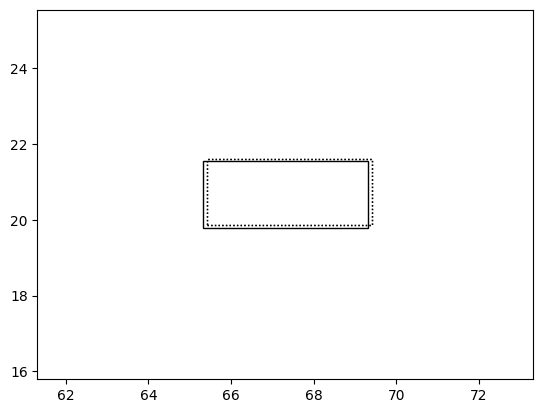

normal [0.15906102 0.84093898]
momentl [ 0.00096528 -0.11461161]
[0.15906102 0.84093898]


C:\Users\mmoussa\AppData\Local\Temp\ipykernel_6728\896333989.py:75: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\mmoussa\AppData\Local\Temp\ipykernel_6728\896333989.py:107: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\mmoussa\AppData\Local\Temp\ipykernel_6728\896333989.py:138: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for th

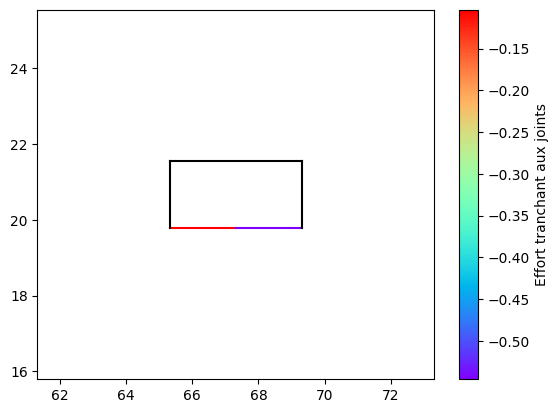

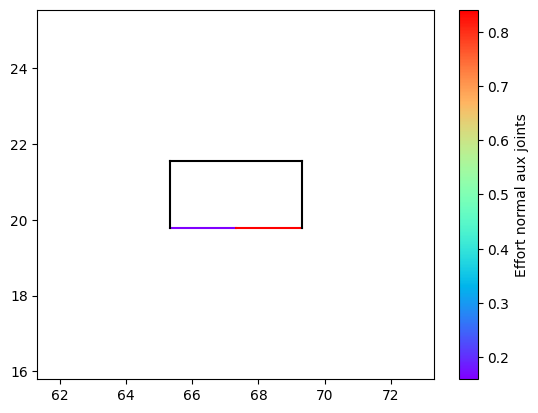

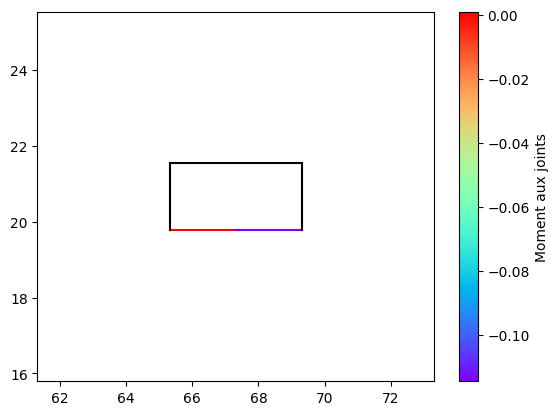

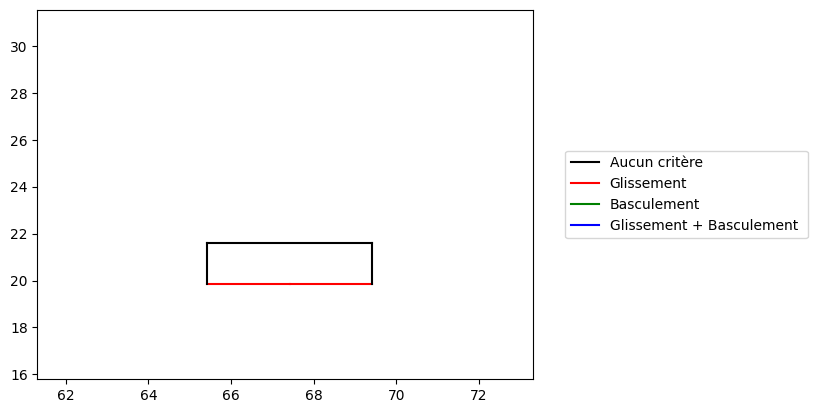

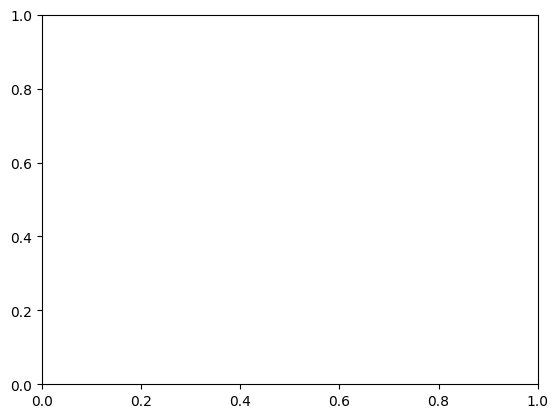

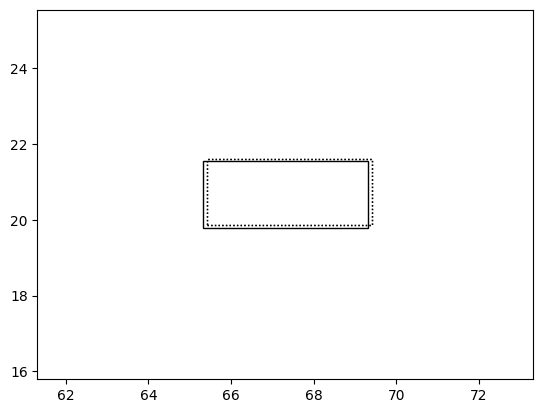

IndexError: index 0 is out of bounds for axis 0 with size 0

In [411]:
kinsol = fourth*0.1
fig, ax = plt.subplots()


for ind, element in enumerate(allpolygons):
    polygonplot = Polygon(allpolygons[element], color='w', lw=1, ec='black', fill='false',) #use polygon function of mathplotlib to put the polygon on the suitable form for plotting    
    ax.add_patch(polygonplot) # plot the blockj

for ind, element in enumerate(allpolygons):
    polygonplot = Polygon(allpolygons[element], lw=1,linestyle=':', ec='black', fill='false',facecolor="none") #use polygon function of mathplotlib to put the polygon on the suitable form for plotting    
    polygonplotdef = polygonplot
    ax.add_patch(polygonplot) # plot the blockj
    (x, y) = (blockscenters[2*ind],blockscenters[2*ind+1])
    # Create the transformation
    transform = mtransforms.Affine2D().translate(-x, -y)+ mtransforms.Affine2D().translate(kinsol[3*ind], kinsol[3*ind+1]) + \
    mtransforms.Affine2D().rotate_deg(kinsol[3*ind+2]*180/3.14) + mtransforms.Affine2D().translate(x, y) + ax.transData

    # Apply the transformation to the polygon
    polygonplotdef.set_transform(transform)
    #transform =  mtransforms.Affine2D().translate(kinsol[3*ind], kinsol[3*ind+1]) + ax.transData
    #polygonplot.set_transform(transform)
    ax.add_patch(polygonplotdef) # plot the blockj after displacement


xlimmin = float(nodes[0,1])
xlimmax=  float(nodes[0,1])
ylimmin=  float(nodes[0,2])
ylimmax = float(nodes[0,2])   
for element in range(nodes.shape[0]):
    xlimmin = min([xlimmin,float(nodes[element,1])])
    xlimmax = max([xlimmax,float(nodes[element,1])])
    ylimmin = min([ylimmin,float(nodes[element,2])])
    ylimmax = max([ylimmax,float(nodes[element,2])])

plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
plt.savefig('blocksdisp.jpg', dpi=300, format='jpg')
plt.show()


shearvalues = np.empty((0,1))
normalvalues = np.empty((0,1))
momentvalues = np.empty((0,1))
rup_test = np.empty((0,1))
for element in range(0,len(statsol)-2,3):
    shearvalues = np.append(shearvalues,statsol[element])
    normalvalues = np.append(normalvalues,statsol[element+1])
    momentvalues = np.append(momentvalues,statsol[element+2])
    rup_test =  np.append(rup_test,1*(round(abs(statsol[element]),3) >=round(statsol[element+1]*math.tan(math.radians(phi)) + cohesion,3)) + \
                          2*(round(abs(statsol[element+2]))>=round(statsol[element+1],3) ))
print("normal",normalvalues)
print("momentl",momentvalues)
# Normalize the data
norm = Normalize(vmin=shearvalues.min(), vmax=shearvalues.max())

# Create a ScalarMappable object
sm = ScalarMappable(norm=norm, cmap='rainbow')
# get the color of each element data
datacolors = sm.to_rgba(shearvalues)

plt.xlim(0,2)
plt.ylim(0, 2)
for  element in edgesIndCoor:
    if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:
        ind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
        edgecolor = datacolors[ind][0]
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],color = (edgecolor[0],edgecolor[1],edgecolor[2]) )
    else:
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],'k' )

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
# Create a colorbar
cbar = plt.colorbar(sm)

# Add a label to the colorbar
cbar.set_label("Effort tranchant aux joints")
filename = f"shear.jpg"
plt.savefig(filename, dpi=300, format='jpg')

fig, ax = plt.subplots()

# Normalize the data
norm = Normalize(vmin=normalvalues.min(), vmax=normalvalues.max())

# Create a ScalarMappable object
sm = ScalarMappable(norm=norm, cmap='rainbow')
# get the color of each element data
datacolors = sm.to_rgba(normalvalues)
print(normalvalues)
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
for  element in edgesIndCoor:
    if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:
        ind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
        edgecolor = datacolors[ind][0]
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],color = (edgecolor[0],edgecolor[1],edgecolor[2]) )
    else:
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],'k' )

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)

# Create a colorbar
cbar = plt.colorbar(sm)

# Add a label to the colorbar
cbar.set_label("Effort normal aux joints")
filename = f"normal.jpg"
plt.savefig(filename, dpi=300, format='jpg')
fig, ax = plt.subplots()

# Normalize the data
norm = Normalize(vmin=momentvalues.min(), vmax=momentvalues.max())

# Create a ScalarMappable object
sm = ScalarMappable(norm=norm, cmap='rainbow')

# get the color of each element data
datacolors = sm.to_rgba(momentvalues)

plt.xlim(0,2)
plt.ylim(0, 2)
for  element in edgesIndCoor:
    if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:
        ind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
        edgecolor = datacolors[ind][0]
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],color = (edgecolor[0],edgecolor[1],edgecolor[2]) )
    else:
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],'k' )

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
# Create a colorbar
cbar = plt.colorbar(sm)

# Add a label to the colorbar
cbar.set_label("Moment aux joints")
filename = f"moment.jpg"
plt.savefig(filename, dpi=300, format='jpg')

fig, ax = plt.subplots()

# Normalize the data
norm = Normalize(vmin=rup_test.min(), vmax=rup_test.max())

# Create a ScalarMappable object
sm = ScalarMappable(norm=norm, cmap='rainbow')

# get the color of each element data
datacolors = sm.to_rgba(rup_test)

labelcolors = ['k','r','g','b']

def rotate_point(point, center, angle):
    #angle = np.radians(angle)
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                [np.sin(angle), np.cos(angle)]])
    translated_point = np.array([point[0] - center[0], point[1] - center[1]])
    rotated_point = np.dot(rotation_matrix, translated_point)
    return rotated_point + center

for  element in edgesIndCoor:

    if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:

        #edgeind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0]))[0][0] #find edge index in activeedges array
        ind = blockedgesInd[element]-1 #block index 
        indcol = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
        (x, y) = (blockscenters[2*ind],blockscenters[2*ind+1])

        point1 = [kinsol[3*ind],kinsol[3*ind+1]]+ rotate_point((float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][3])), (x,y), kinsol[3*ind+2])
        point2 = [kinsol[3*ind],kinsol[3*ind+1]] + rotate_point((float(edgesIndCoor[element][0][2]),float(edgesIndCoor[element][0][4])), (x,y), kinsol[3*ind+2])
        plt.plot([point1[0],point2[0]], \
                 [point1[1],point2[1]],labelcolors[int(rup_test[indcol])] )
    else:
        ind = blockedgesInd[element]-1 #block index
        (x, y) = (blockscenters[2*ind],blockscenters[2*ind+1])

        point1 = [kinsol[3*ind],kinsol[3*ind+1]] + rotate_point((float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][3])), (x,y), kinsol[3*ind+2])
        point2 = [kinsol[3*ind],kinsol[3*ind+1]]  + rotate_point((float(edgesIndCoor[element][0][2]),float(edgesIndCoor[element][0][4])), (x,y), kinsol[3*ind+2])
        plt.plot([point1[0],point2[0]], \
                 [point1[1],point2[1]],'k' )

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
# Create a colorbar


# Add a label to the colorbar
cbar.set_label("Moment aux joints")

leg = plt.legend(['Aucun critère','Glissement','Basculement' ,'Glissement + Basculement '],loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=10)
labelcolors = ['k','r','g','b']

for i, j in enumerate(leg.legendHandles):

    j.set_color(labelcolors[i])

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+10)
# Create a colorbar
filename = f"rupturejoints.jpg"
plt.savefig(filename, dpi=300, format='jpg')



#len(all_fun)/len(all_fun)
for index in range(0,1):
    
    #kinsol = all_sol[index][-Astat.size[0]-Cstat.size[0]:-Cstat.size[0]:]*0.5
    
    #a = np.where(all_fun == min(all_fun))

    #print(all_fun[a[0][0]])

    #kinsol = resnonlin['x'][-Astat.size[0]-Cstat.size[0]:-Cstat.size[0]:]*0.3
    #Plot results
    kinsol = fourth*0.1
    fig, ax = plt.subplots()



    
    
    fig, ax = plt.subplots()


    for ind, element in enumerate(allpolygons):
        polygonplot = Polygon(allpolygons[element], color='w', lw=1, ec='black', fill='false',) #use polygon function of mathplotlib to put the polygon on the suitable form for plotting    
        ax.add_patch(polygonplot) # plot the blockj

    for ind, element in enumerate(allpolygons):
        polygonplot = Polygon(allpolygons[element], lw=1,linestyle=':', ec='black', fill='false',facecolor="none") #use polygon function of mathplotlib to put the polygon on the suitable form for plotting    
        polygonplotdef = polygonplot
        ax.add_patch(polygonplot) # plot the blockj
        (x, y) = (blockscenters[2*ind],blockscenters[2*ind+1])
        # Create the transformation
        transform = mtransforms.Affine2D().translate(-x, -y)+ mtransforms.Affine2D().translate(kinsol[3*ind], kinsol[3*ind+1]) + \
        mtransforms.Affine2D().rotate_deg(kinsol[3*ind+2]*180/3.14) + mtransforms.Affine2D().translate(x, y) + ax.transData

        # Apply the transformation to the polygon
        polygonplotdef.set_transform(transform)
        #transform =  mtransforms.Affine2D().translate(kinsol[3*ind], kinsol[3*ind+1]) + ax.transData
        #polygonplot.set_transform(transform)
        ax.add_patch(polygonplotdef) # plot the blockj after displacement


    xlimmin = float(nodes[0,1])
    xlimmax=  float(nodes[0,1])
    ylimmin=  float(nodes[0,2])
    ylimmax = float(nodes[0,2])   
    for element in range(nodes.shape[0]):
        xlimmin = min([xlimmin,float(nodes[element,1])])
        xlimmax = max([xlimmax,float(nodes[element,1])])
        ylimmin = min([ylimmin,float(nodes[element,2])])
        ylimmax = max([ylimmax,float(nodes[element,2])])

    plt.xlim(xlimmin-4, xlimmax+4)
    plt.ylim(ylimmin-4, ylimmax+4)
    filename = f"ruptureblock_{index}.jpg"
    plt.savefig(filename, dpi=300, format='jpg')
    plt.show()


    shearvalues = np.empty((0,1))
    normalvalues = np.empty((0,1))
    momentvalues = np.empty((0,1))
    rup_test = np.empty((0,1))
    for element in range(0,len(statsol)-2,3):
        shearvalues = np.append(shearvalues,all_sol[index][element])
        normalvalues = np.append(normalvalues,all_sol[index][element+1])
        momentvalues = np.append(momentvalues,all_sol[index][element+2])
        rup_test =  np.append(rup_test,1*(round(abs(all_sol[index][element]),3) >=round(all_sol[index][element+1]*math.tan(math.radians(phi)) + cohesion,3)) + \
                              2*(round(abs(all_sol[index][element+2]),3)>=round(all_sol[index][element+1],3)  ))
    
    print("normal",normalvalues)
    
    # Normalize the data
    boundaries = np.linspace(shearvalues.min(), shearvalues.max(), num=15)

    # Create a BoundaryNorm object that maps data values to colors based on the boundaries
    norm = BoundaryNorm(boundaries, ncolors=256)
    sm = ScalarMappable(norm=norm, cmap='rainbow')
    # get the color of each element data
    datacolors = sm.to_rgba(shearvalues)

    plt.xlim(0,2)
    plt.ylim(0, 2)
    for  element in edgesIndCoor:
        if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:
            ind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
            edgecolor = datacolors[ind][0]
            plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],color = (edgecolor[0],edgecolor[1],edgecolor[2]) )
        else:
            plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],'k' )

    # Add a colorbar
    plt.xlim(xlimmin-4, xlimmax+4)
    plt.ylim(ylimmin-4, ylimmax+4)
    # Create a colorbar
    cbar = plt.colorbar(sm)

    # Add a label to the colorbar
    cbar.set_label("Effort tranchant aux joints")
    filename = f"shear_{index}.jpg"
    plt.savefig(filename, dpi=300, format='jpg')

    fig, ax = plt.subplots()

    # Normalize the data
    boundaries = np.linspace(normalvalues.min(), normalvalues.max(), num=15)
    print(normalvalues)
    # Create a BoundaryNorm object that maps data values to colors based on the boundaries
    norm = BoundaryNorm(boundaries, ncolors=256)
    sm = ScalarMappable(norm=norm, cmap='rainbow')

    # get the color of each element data
    datacolors = sm.to_rgba(normalvalues)

    plt.xlim(xlimmin-4, xlimmax+4)
    plt.ylim(ylimmin-4, ylimmax+4)
    for  element in edgesIndCoor:
        if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:
            ind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
            edgecolor = datacolors[ind][0]
            plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],color = (edgecolor[0],edgecolor[1],edgecolor[2]) )
        else:
            plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],'k' )

    # Add a colorbar
    plt.xlim(xlimmin-4, xlimmax+4)
    plt.ylim(ylimmin-4, ylimmax+4)

    # Create a colorbar
    cbar = plt.colorbar(sm)

    # Add a label to the colorbar
    cbar.set_label("Effort normal aux joints")
    filename = f"Normal_{index}.jpg"

    plt.savefig(filename, dpi=300, format='jpg')
    fig, ax = plt.subplots()

    # Normalize the data
    boundaries = np.linspace(momentvalues.min(), momentvalues.max(), num=15)

    # Create a BoundaryNorm object that maps data values to colors based on the boundaries
    norm = BoundaryNorm(boundaries, ncolors=256)
    sm = ScalarMappable(norm=norm, cmap='rainbow')

    # get the color of each element data
    datacolors = sm.to_rgba(momentvalues)

    plt.xlim(0,2)
    plt.ylim(0, 2)
    for  element in edgesIndCoor:
        if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:
            ind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
            edgecolor = datacolors[ind][0]
            plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],color = (edgecolor[0],edgecolor[1],edgecolor[2]) )
        else:
            plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],'k' )

    # Add a colorbar
    plt.xlim(xlimmin-4, xlimmax+4)
    plt.ylim(ylimmin-4, ylimmax+4)
    # Create a colorbar
    cbar = plt.colorbar(sm)

    # Add a label to the colorbar
    cbar.set_label("Moment aux joints")
    filename = f"Moment_{index}.jpg"
    plt.savefig(filename, dpi=300, format='jpg')

    fig, ax = plt.subplots()

    # Normalize the data
    boundaries = np.linspace(rup_test.min(), rup_test.max(), num=15)

    # Create a BoundaryNorm object that maps data values to colors based on the boundaries
    norm = BoundaryNorm(boundaries, ncolors=256)
    sm = ScalarMappable(norm=norm, cmap='rainbow')

    # get the color of each element data
    datacolors = sm.to_rgba(rup_test)

    labelcolors = ['k','r','g','b']

    def rotate_point(point, center, angle):
        #angle = np.radians(angle)
        rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                    [np.sin(angle), np.cos(angle)]])
        translated_point = np.array([point[0] - center[0], point[1] - center[1]])
        rotated_point = np.dot(rotation_matrix, translated_point)
        return rotated_point + center

    for  element in edgesIndCoor:

        if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:

            #edgeind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0]))[0][0] #find edge index in activeedges array
            ind = blockedgesInd[element]-1 #block index 
            indcol = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
            (x, y) = (blockscenters[2*ind],blockscenters[2*ind+1])

            point1 = [kinsol[3*ind],kinsol[3*ind+1]]+ rotate_point((float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][3])), (x,y), kinsol[3*ind+2])
            point2 = [kinsol[3*ind],kinsol[3*ind+1]] + rotate_point((float(edgesIndCoor[element][0][2]),float(edgesIndCoor[element][0][4])), (x,y), kinsol[3*ind+2])
            plt.plot([point1[0],point2[0]], \
                     [point1[1],point2[1]],labelcolors[int(rup_test[indcol])] )
        else:
            ind = blockedgesInd[element]-1 #block index
            (x, y) = (blockscenters[2*ind],blockscenters[2*ind+1])

            point1 = [kinsol[3*ind],kinsol[3*ind+1]] + rotate_point((float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][3])), (x,y), kinsol[3*ind+2])
            point2 = [kinsol[3*ind],kinsol[3*ind+1]]  + rotate_point((float(edgesIndCoor[element][0][2]),float(edgesIndCoor[element][0][4])), (x,y), kinsol[3*ind+2])
            plt.plot([point1[0],point2[0]], \
                     [point1[1],point2[1]],'k' )

    # Add a colorbar
    plt.xlim(xlimmin-4, xlimmax+4)
    plt.ylim(ylimmin-4, ylimmax+4)
    # Create a colorbar


    # Add a label to the colorbar
    cbar.set_label("Moment aux joints")


    leg = plt.legend(['Aucun critère','Glissement','Basculement' ,'Glissement + Basculement '],loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=10)
    labelcolors = ['k','r','g','b']

    for i, j in enumerate(leg.legendHandles):

        j.set_color(labelcolors[i])

    # Add a colorbar
    plt.xlim(xlimmin-4, xlimmax+4)
    plt.ylim(ylimmin-4, ylimmax+10)
    # Create a colorbar
    filename = f"rupturejoints_{index}.jpg"
    plt.savefig(filename, dpi=300, format='jpg')


In [406]:
print(Astat)
print(normalvalues)
print(momentvalues)
Dead_energie = 0
Dead_energie = sum([Dead_energie  + second[element] for element in range(1,len(second),3)])
print("Dead energie associé", + Dead_energie)
print("live energie associé", + second[0]*statsolver['x'][-1:])

print(np.dot(np.dot(B.T,second).T,statsolver['x'][0:-1:]))
print(np.dot(statsolver['z'].T,coh))

#kinsol = all_sol[index][-Astat.size[0]-Cstat.size[0]:-Cstat.size[0]:]*0.5
index=3
Dead_energie = 0
Dead_energie = sum([Dead_energie  + all_sol[index][element-Astat.size[0]-Cstat.size[0] ] for element in range(1,len(second),3)])
print("Dead energie associé", + Dead_energie)
print("live energie associé", + all_sol[index][-Astat.size[0]-Cstat.size[0] ]*all_sol[index][Astat.size[1]-1 ])

print("Internal loads",+ np.dot(np.dot(B.T,all_sol[index][-Astat.size[0]-Cstat.size[0]:-Cstat.size[0]:]).T,all_sol[index][0:Astat.size[1]-1]))
print("Prm",+ np.dot(all_sol[index][-Cstat.size[0]:].T,coh))


print(all_fun)
print(-Astat.size[0]-Cstat.size[0])
print(len(all_sol[0]))
print(-Cstat.size[0])
print(all_sol[0][-Astat.size[0]-Cstat.size[0]:-Cstat.size[0]:])
print(all_sol[2][-Astat.size[0]-Cstat.size[0]:-Cstat.size[0]:])
energie = 0
for element in range(0,len(third),6):
    energie += abs(third[element] -  third[element+1])
#print( 0.30357615369734203 - energie*0.00001*max(normalvalues))

[ 1.00e+00  0.00e+00  0.00e+00  1.00e+00  0.00e+00  0.00e+00  1.00e+00]
[ 0.00e+00  1.00e+00  0.00e+00  0.00e+00  1.00e+00  0.00e+00  0.00e+00]
[ 8.75e-01 -1.00e+00  1.00e+00  8.75e-01  1.00e+00  1.00e+00  0.00e+00]
[ 0.00e+00  1.00e+00  6.00e+00  0.00e+00 -1.00e+00  6.00e+00  0.00e+00]

[]
[]
Dead energie associé [0.6494076]
live energie associé [[0.6494076]]


ValueError: shapes (6,3) and (4,1) not aligned: 3 (dim 1) != 4 (dim 0)

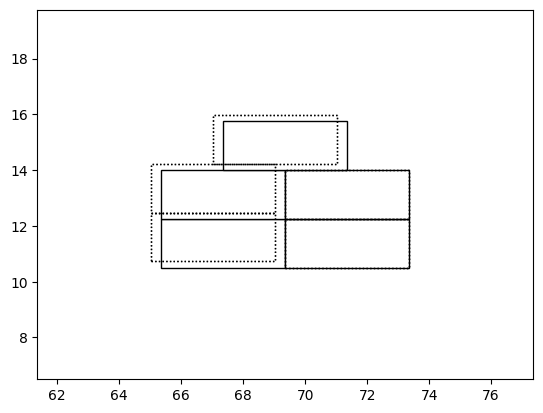

C:\Users\mmoussa\AppData\Local\Temp\ipykernel_17064\4287142329.py:80: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\mmoussa\AppData\Local\Temp\ipykernel_17064\4287142329.py:110: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\mmoussa\AppData\Local\Temp\ipykernel_17064\4287142329.py:140: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes 

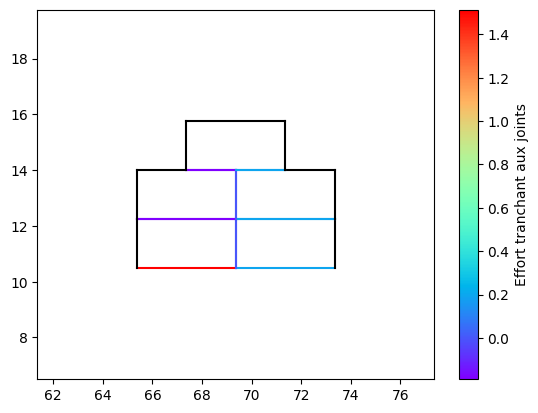

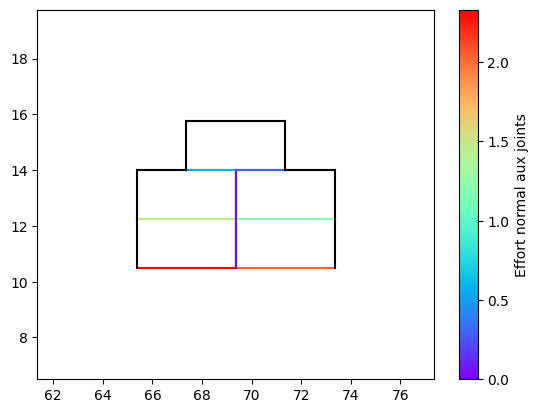

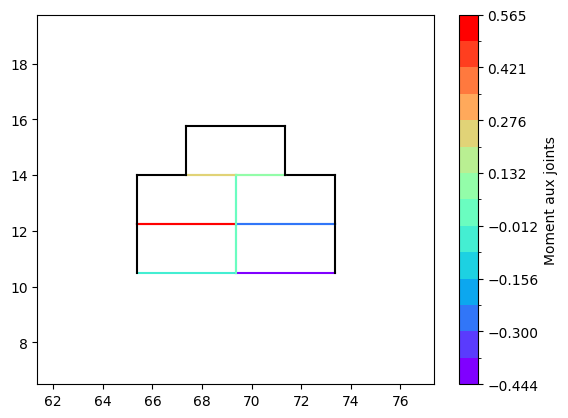

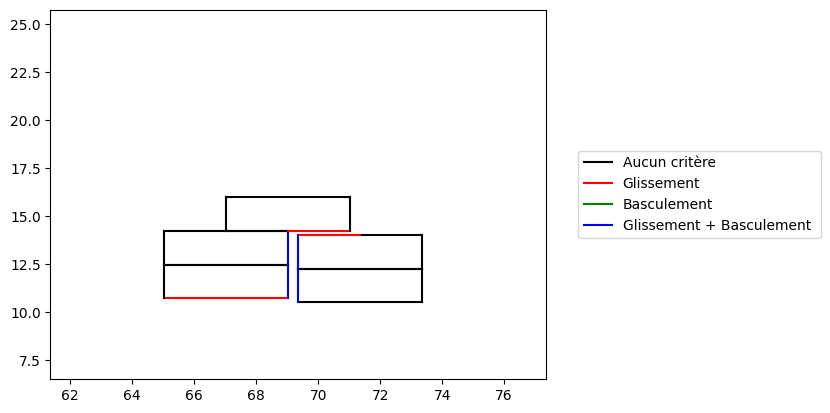

In [61]:
#kinsol = khsolver['x'][-Astat.size[0]-Cstat.size[0]:-Cstat.size[0]:]*20
kinsol = resnonlin['x'][-Astat.size[0]-Cstat.size[0]:-Cstat.size[0]:]*20
kinsol = fourth*0.3
kinsol = all_sol[80][-Astat.size[0]-Cstat.size[0]:-Cstat.size[0]:]*0.5
#Plot results
fig, ax = plt.subplots()


for ind, element in enumerate(allpolygons):
    polygonplot = Polygon(allpolygons[element], color='w', lw=1, ec='black', fill='false',) #use polygon function of mathplotlib to put the polygon on the suitable form for plotting    
    ax.add_patch(polygonplot) # plot the blockj

for ind, element in enumerate(allpolygons):
    polygonplot = Polygon(allpolygons[element], lw=1,linestyle=':', ec='black', fill='false',facecolor="none") #use polygon function of mathplotlib to put the polygon on the suitable form for plotting    
    polygonplotdef = polygonplot
    ax.add_patch(polygonplot) # plot the blockj
    (x, y) = (blockscenters[2*ind],blockscenters[2*ind+1])
    # Create the transformation
    transform = mtransforms.Affine2D().translate(-x, -y)+ mtransforms.Affine2D().translate(kinsol[3*ind], kinsol[3*ind+1]) + \
    mtransforms.Affine2D().rotate_deg(kinsol[3*ind+2]*180/3.14) + mtransforms.Affine2D().translate(x, y) + ax.transData

    # Apply the transformation to the polygon
    polygonplotdef.set_transform(transform)
    #transform =  mtransforms.Affine2D().translate(kinsol[3*ind], kinsol[3*ind+1]) + ax.transData
    #polygonplot.set_transform(transform)
    ax.add_patch(polygonplotdef) # plot the blockj after displacement


xlimmin = float(nodes[0,1])
xlimmax=  float(nodes[0,1])
ylimmin=  float(nodes[0,2])
ylimmax = float(nodes[0,2])   
for element in range(nodes.shape[0]):
    xlimmin = min([xlimmin,float(nodes[element,1])])
    xlimmax = max([xlimmax,float(nodes[element,1])])
    ylimmin = min([ylimmin,float(nodes[element,2])])
    ylimmax = max([ylimmax,float(nodes[element,2])])

plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
plt.savefig('blocksdisp.jpg', dpi=300, format='jpg')
plt.show()


shearvalues = np.empty((0,1))
normalvalues = np.empty((0,1))
momentvalues = np.empty((0,1))
rup_test = np.empty((0,1))
for element in range(0,len(statsol)-2,3):
    shearvalues = np.append(shearvalues,statsol[element])
    normalvalues = np.append(normalvalues,statsol[element+1])
    momentvalues = np.append(momentvalues,statsol[element+2])
    rup_test =  np.append(rup_test,1*(round(abs(statsol[element]),3) >=round(statsol[element+1]*math.tan(math.radians(phi)) + cohesion,3)) + \
                          2*(round(abs(statsol[element+2]))>=round(statsol[element+1],3) ))


# Normalize the data
norm = Normalize(vmin=shearvalues.min(), vmax=shearvalues.max())

# Create a ScalarMappable object
sm = ScalarMappable(norm=norm, cmap='rainbow')
# get the color of each element data
datacolors = sm.to_rgba(shearvalues)

plt.xlim(0,2)
plt.ylim(0, 2)
for  element in edgesIndCoor:
    if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:
        ind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
        edgecolor = datacolors[ind][0]
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],color = (edgecolor[0],edgecolor[1],edgecolor[2]) )
    else:
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],'k' )

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
# Create a colorbar
cbar = plt.colorbar(sm)

# Add a label to the colorbar
cbar.set_label("Effort tranchant aux joints")
plt.savefig('shear.jpg', dpi=300, format='jpg')

fig, ax = plt.subplots()

# Normalize the data
norm = Normalize(vmin=normalvalues.min(), vmax=normalvalues.max())
# Create a ScalarMappable object
sm = ScalarMappable(norm=norm, cmap='rainbow')
# get the color of each element data
datacolors = sm.to_rgba(normalvalues)

plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
for  element in edgesIndCoor:
    if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:
        ind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
        edgecolor = datacolors[ind][0]
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],color = (edgecolor[0],edgecolor[1],edgecolor[2]) )
    else:
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],'k' )

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)

# Create a colorbar
cbar = plt.colorbar(sm)

# Add a label to the colorbar
cbar.set_label("Effort normal aux joints")
plt.savefig('normal.jpg', dpi=300, format='jpg')
fig, ax = plt.subplots()

# Normalize the data
boundaries = np.linspace(momentvalues.min(), momentvalues.max(), num=15)

# Create a BoundaryNorm object that maps data values to colors based on the boundaries
norm = BoundaryNorm(boundaries, ncolors=256)
sm = ScalarMappable(norm=norm, cmap='rainbow')
# get the color of each element data
datacolors = sm.to_rgba(momentvalues)

plt.xlim(0,2)
plt.ylim(0, 2)
for  element in edgesIndCoor:
    if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:
        ind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
        edgecolor = datacolors[ind][0]
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],color = (edgecolor[0],edgecolor[1],edgecolor[2]) )
    else:
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],'k' )

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
# Create a colorbar
cbar = plt.colorbar(sm)

# Add a label to the colorbar
cbar.set_label("Moment aux joints")
plt.savefig('moment.jpg', dpi=300, format='jpg')

fig, ax = plt.subplots()

# Normalize the data
norm = Normalize(vmin=rup_test.min(), vmax=rup_test.max())

# Create a ScalarMappable object
sm = ScalarMappable(norm=norm, cmap='rainbow')

# get the color of each element data
datacolors = sm.to_rgba(rup_test)

labelcolors = ['k','r','g','b']

def rotate_point(point, center, angle):
    #angle = np.radians(angle)
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                [np.sin(angle), np.cos(angle)]])
    translated_point = np.array([point[0] - center[0], point[1] - center[1]])
    rotated_point = np.dot(rotation_matrix, translated_point)
    return rotated_point + center

for  element in edgesIndCoor:

    if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:

        #edgeind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0]))[0][0] #find edge index in activeedges array
        ind = blockedgesInd[element]-1 #block index 
        indcol = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
        (x, y) = (blockscenters[2*ind],blockscenters[2*ind+1])

        point1 = [kinsol[3*ind],kinsol[3*ind+1]]+ rotate_point((float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][3])), (x,y), kinsol[3*ind+2])
        point2 = [kinsol[3*ind],kinsol[3*ind+1]] + rotate_point((float(edgesIndCoor[element][0][2]),float(edgesIndCoor[element][0][4])), (x,y), kinsol[3*ind+2])
        plt.plot([point1[0],point2[0]], \
                 [point1[1],point2[1]],labelcolors[int(rup_test[indcol])] )
    else:
        ind = blockedgesInd[element]-1 #block index
        (x, y) = (blockscenters[2*ind],blockscenters[2*ind+1])

        point1 = [kinsol[3*ind],kinsol[3*ind+1]] + rotate_point((float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][3])), (x,y), kinsol[3*ind+2])
        point2 = [kinsol[3*ind],kinsol[3*ind+1]]  + rotate_point((float(edgesIndCoor[element][0][2]),float(edgesIndCoor[element][0][4])), (x,y), kinsol[3*ind+2])
        plt.plot([point1[0],point2[0]], \
                 [point1[1],point2[1]],'k' )

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
# Create a colorbar


# Add a label to the colorbar
cbar.set_label("Moment aux joints")

leg = plt.legend(['Aucun critère','Glissement','Basculement' ,'Glissement + Basculement '],loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=10)
labelcolors = ['k','r','g','b']

for i, j in enumerate(leg.legendHandles):

    j.set_color(labelcolors[i])

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+10)
# Create a colorbar
plt.savefig('rupture-joints.jpg', dpi=300, format='jpg')



In [2]:
print(ind)

[1]


In [560]:
import pylab
from cvxopt import solvers, matrix, spmatrix, mul, div

def floorplan(Amin):

  
    c = matrix([1.0,1.0] )

    def F(x=None, z=None):
        if x is None:
            return 1, matrix( [2.0,2.0])
        #if min(x) <= 0.0:
         #   print(x)
          #  print("Here")
           # return None
        
        f = -x[0] + div(Amin, x[1])
        Df = matrix([-1,-div(Amin, x[1]**2)]).T
        #Df[0,1] = 1
        if z is None: return f, Df
        H = np.zeros((2,2))
        H[1,:] = matrix(spmatrix( 2.0* mul(z, div(Amin, x[1]**3)), [0], [0]))
        H[1,0] =0
        H = matrix(H)
        return f, Df, H
    A = np.zeros((1,2))
    A[0,0]=1
    A = matrix(A)
    b = matrix([1.0] )
    G = np.zeros((1,2))
    G = matrix(G)
    h = matrix([0.0] )
    sol = solvers.cpl(c, F,G,h,A=A,b=b)
    return  sol['x'][0], sol['x'][1]

Amin = matrix([3.])
x,y = floorplan(Amin)
print(x)
print(y)




     pcost       dcost       gap    pres   dres
 0:  4.0000e+00  3.5000e+00  2e+00  1e+00  2e-01
 1:  3.3739e+00  3.6534e+00  3e-01  3e-01  9e-02
 2:  3.7082e+00  3.9476e+00  5e-03  7e-02  9e-02
 3:  3.9095e+00  3.9942e+00  8e-04  2e-02  3e-02
 4:  3.9896e+00  3.9999e+00  6e-05  2e-03  5e-03
 5:  3.9997e+00  4.0000e+00  1e-06  6e-05  2e-04
 6:  4.0000e+00  4.0000e+00  1e-08  6e-07  2e-06
 7:  4.0000e+00  4.0000e+00  1e-10  6e-09  2e-08
Optimal solution found.
1.00000000013124
2.9999999739403096


     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  4.8800e+02  3e+01  1e+00  1e+00
 1:  4.1434e+00  5.0341e+02  2e+01  9e-01  8e-01
 2:  1.1712e+01  4.7915e+02  2e+01  7e-01  7e-01
 3:  2.1753e+01  4.3806e+02  1e+01  5e-01  6e-01
 4:  3.0392e+01  3.9500e+02  1e+01  5e-01  5e-01
 5:  5.2631e+01  2.6440e+02  5e+00  2e-01  3e-01
 6:  6.9208e+01  1.4271e+02  2e+00  9e-02  2e-01
 7:  7.9553e+01  9.1854e+01  5e-01  3e-02  6e-02
 8:  7.9551e+01  9.1492e+01  5e-01  3e-02  6e-02
 9:  7.9123e+01  9.0414e+01  5e-01  3e-02  5e-02
10:  7.8001e+01  8.8236e+01  5e-01  2e-02  5e-02
11:  7.5977e+01  8.4619e+01  4e-01  2e-02  4e-02
12:  6.9877e+01  7.5752e+01  4e-01  2e-02  3e-02
13:  6.4758e+01  6.9190e+01  2e-01  1e-02  2e-02
14:  6.4419e+01  6.8734e+01  2e-01  1e-02  2e-02
15:  4.9692e+01  5.5697e+01  9e-01  2e-02  7e-03
16:  4.8663e+01  5.3011e+01  6e-01  1e-02  5e-03
17:  4.8482e+01  5.0776e+01  8e-01  1e-02  3e-03
18:  4.7753e+01  4.8788e+01  7e-01  6e-03  2e-03
19:  4.7586e+01  4.83

([], [])

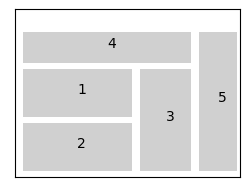

In [477]:
import pylab
from cvxopt import solvers, matrix, spmatrix, mul, div

def floorplan(Amin):

    #     minimize    W+H
    #     subject to  Amink / hk <= wk, k = 1,..., 5
    #                 x1 >= 0,  x2 >= 0, x4 >= 0
    #                 x1 + w1 + rho <= x3
    #                 x2 + w2 + rho <= x3
    #                 x3 + w3 + rho <= x5
    #                 x4 + w4 + rho <= x5
    #                 x5 + w5 <= W
    #                 y2 >= 0,  y3 >= 0,  y5 >= 0
    #                 y2 + h2 + rho <= y1
    #                 y1 + h1 + rho <= y4
    #                 y3 + h3 + rho <= y4
    #                 y4 + h4 <= H
    #                 y5 + h5 <= H
    #                 hk/gamma <= wk <= gamma*hk,  k = 1, ..., 5
    #
    # 22 Variables W, H, x (5), y (5), w (5), h (5).
    #
    # W, H:  scalars; bounding box width and height
    # x, y:  5-vectors; coordinates of bottom left corners of blocks
    # w, h:  5-vectors; widths and heights of the 5 blocks

    rho, gamma = 1.0, 5.0   # min spacing, min aspect ratio

    # The objective is to minimize W + H.  There are five nonlinear
    # constraints
    #
    #     -wk + Amink / hk <= 0,  k = 1, ..., 5

    c = matrix(2*[1.0] + 20*[0.0])

    def F(x=None, z=None):
        if x is None:  return 5, matrix(17*[0.0] + 5*[1.0])
        if min(x[17:]) <= 0.0:  return None
        f = -x[12:17] + div(Amin, x[17:])
        Df = matrix(0.0, (5,22))
        Df[:,12:17] = spmatrix(-1.0, range(5), range(5))
        Df[:,17:] = spmatrix(-div(Amin, x[17:]**2), range(5), range(5))
        if z is None: return f, Df
        
        H = spmatrix( 2.0* mul(z, div(Amin, x[17::]**3)), range(17,22), range(17,22) )
        
        return f, Df, H

    G = matrix(0.0, (26,22))
    h = matrix(0.0, (26,1))
    G[0,2] = -1.0                                       # -x1 <= 0
    G[1,3] = -1.0                                       # -x2 <= 0
    G[2,5] = -1.0                                       # -x4 <= 0
    G[3, [2, 4, 12]], h[3] = [1.0, -1.0, 1.0], -rho     # x1 - x3 + w1 <= -rho
    G[4, [3, 4, 13]], h[4] = [1.0, -1.0, 1.0], -rho     # x2 - x3 + w2 <= -rho
    G[5, [4, 6, 14]], h[5] = [1.0, -1.0, 1.0], -rho     # x3 - x5 + w3 <= -rho
    G[6, [5, 6, 15]], h[6] = [1.0, -1.0, 1.0], -rho     # x4 - x5 + w4 <= -rho
    G[7, [0, 6, 16]] = -1.0, 1.0, 1.0                   # -W + x5 + w5 <= 0
    G[8,8] = -1.0                                       # -y2 <= 0
    G[9,9] = -1.0                                       # -y3 <= 0
    G[10,11] = -1.0                                     # -y5 <= 0
    G[11, [7, 8, 18]], h[11] = [-1.0, 1.0, 1.0], -rho   # -y1 + y2 + h2 <= -rho
    G[12, [7, 10, 17]], h[12] = [1.0, -1.0, 1.0], -rho  #  y1 - y4 + h1 <= -rho
    G[13, [9, 10, 19]], h[13] = [1.0, -1.0, 1.0], -rho  #  y3 - y4 + h3 <= -rho
    G[14, [1, 10, 20]] = -1.0, 1.0, 1.0                 # -H + y4 + h4 <= 0
    G[15, [1, 11, 21]] = -1.0, 1.0, 1.0                 # -H + y5 + h5 <= 0
    G[16, [12, 17]] = -1.0, 1.0/gamma                   # -w1 + h1/gamma <= 0
    G[17, [12, 17]] = 1.0, -gamma                       #  w1 - gamma * h1 <= 0
    G[18, [13, 18]] = -1.0, 1.0/gamma                   # -w2 + h2/gamma <= 0
    G[19, [13, 18]] = 1.0, -gamma                       #  w2 - gamma * h2 <= 0
    G[20, [14, 19]] = -1.0, 1.0/gamma                   # -w3 + h3/gamma <= 0
    G[21, [14, 19]] = 1.0, -gamma                       #  w3 - gamma * h3 <= 0
    G[22, [15, 20]] = -1.0, 1.0/gamma                   # -w4  + h4/gamma <= 0
    G[23, [15, 20]] = 1.0, -gamma                       #  w4 - gamma * h4 <= 0
    G[24, [16, 21]] = -1.0, 1.0/gamma                   # -w5 + h5/gamma <= 0
    G[25, [16, 21]] = 1.0, -gamma                       #  w5 - gamma * h5 <= 0.0

    # solve and return W, H, x, y, w, h
    sol = solvers.cpl(c, F, G, h)
    return  sol['x'][0], sol['x'][1], sol['x'][2:7], sol['x'][7:12], sol['x'][12:17], sol['x'][17:]

pylab.figure(facecolor='w')
pylab.subplot(221)
Amin = matrix([100., 100., 100., 100., 100.])
W, H, x, y, w, h =  floorplan(Amin)
for k in range(5):
    pylab.fill([x[k], x[k], x[k]+w[k], x[k]+w[k]],
               [y[k], y[k]+h[k], y[k]+h[k], y[k]], facecolor = '#D0D0D0')
    pylab.text(x[k]+.5*w[k], y[k]+.5*h[k], "%d" %(k+1))
pylab.axis([-1.0, 26, -1.0, 26])
pylab.xticks([])
pylab.yticks([])



In [193]:
import numpy as np
from scipy.optimize import minimize

def objective(x):
    return (x[0] + x[1])

def constraint(x):
    
    return [-2 + x[0] * x[1], -3 + x[0] * x[1],-1]

x0 = 1*np.array([0.5, 0.5])
b = (0.0, None)
bnds = (b, b)
A = np.array([1,1])
b = np.array([5])
LinearConstraint (A,b,b)
con = {'type': 'ineq', 'fun': constraint}
sol = minimize(objective, x0, method='SLSQP', bounds=bnds, constraints=[con])
print(sol)
print("The solution is:", sol.x)



 message: Positive directional derivative for linesearch
 success: False
  status: 8
     fun: 1.0
       x: [ 5.000e-01  5.000e-01]
     nit: 5
     jac: [ 1.000e+00  1.000e+00]
    nfev: 3
    njev: 1
The solution is: [0.5 0.5]


In [56]:
import numpy as np
from scipy.optimize import minimize

def objective(x):
    return -(x[0] + 5*x[1])

def constraint1(x):
    return 6 - x.T @ [3,4]

def constraint2(x):
    return  x.T @ [1,3] - 2

x0 = np.array([0.5, 0.5])
b = (0.0, None)
bnds = (b, b)
con1['1'] = {'type': 'ineq', 'fun': constraint1}
con1['2'] = {'type': 'ineq', 'fun': constraint2}
constraints = []
for i in range(2):
    constraints = [*constraints,con1[str(i+1)]]
print(type(con1))
sol = minimize(objective, x0, method='SLSQP', bounds=bnds, constraints=constraints)
print(sol)
print(sol.x)
if (constraint1(sol.x) >= -0.1) and (constraint2(sol.x) >= -0.1):
    print("All constraints are satisfied.")
else:
    print("Not all constraints are satisfied.")



<class 'dict'>
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -7.500000000000011
       x: [ 3.331e-15  1.500e+00]
     nit: 2
     jac: [-1.000e+00 -5.000e+00]
    nfev: 6
    njev: 2
[3.33066907e-15 1.50000000e+00]
All constraints are satisfied.


In [95]:
from scipy.optimize import minimize, LinearConstraint
import numpy as np

def f(x):
    return x.T @ [1,2]

A = np.array([[2, 1], [1, 2]])
b = np.array([5, 5])
c = np.array([5, 5])
print(A.shape,len(c),len(b))
linear_constraint = LinearConstraint(A, c,b)
x0 = np.array([1, 1])
res = minimize(f, x0, constraints=linear_constraint)
print(res)

(2, 2) 2 2
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 5.0
       x: [ 1.667e+00  1.667e+00]
     nit: 2
     jac: [ 1.000e+00  2.000e+00]
    nfev: 6
    njev: 2


In [1]:
##
#  Copyright : Copyright (c) MOSEK ApS, Denmark. All rights reserved.
#
#  File :      lo1.py
#
#  Purpose :   Demonstrates how to solve small linear
#              optimization problem using the MOSEK Python API.
##
import sys
import mosek

# Since the value of infinity is ignored, we define it solely
# for symbolic purposes
inf = 0.0

# Define a stream printer to grab output from MOSEK
def streamprinter(text):
    sys.stdout.write(text)
    sys.stdout.flush()


def main():
    # Create a task object
    with mosek.Task() as task:
        # Attach a log stream printer to the task
        task.set_Stream(mosek.streamtype.log, streamprinter)

        # Bound keys for constraints
        bkc = [mosek.boundkey.up,
               mosek.boundkey.up,
               mosek.boundkey.up]

        # Bound values for constraints
        blc = [-inf, -inf, -inf]
        buc = [18.0, 8.0, 14.0]

        # Bound keys for variables
        bkx = [mosek.boundkey.lo,
               mosek.boundkey.lo,
             ]

        # Bound values for variables
        blx = [0.0, 0.0]
        bux = [+inf, +inf]

        # Objective coefficients
        c = [20.0,30.0]

        # Below is the sparse representation of the A
        # matrix stored by column.
        asub = [[0, 1,2],
                [0, 1,2]
               ]
        aval = [[1.0,1.0,2.0],
                [3.0,1.0,1.0]
               ]
        numvar = len(blx)
        numcon = len(blc)
        #numvar = len(bkx)
        #numcon = len(bkc)

        # Append 'numcon' empty constraints.
        # The constraints will initially have no bounds.
        task.appendcons(numcon)

        # Append 'numvar' variables.
        # The variables will initially be fixed at zero (x=0).
        task.appendvars(numvar)

        for j in range(numvar):
            # Set the linear term c_j in the objective.
            task.putcj(j, c[j])

            # Set the bounds on variable j
            # blx[j] <= x_j <= bux[j]
            task.putvarbound(j, bkx[j], blx[j], bux[j])

            # Input column j of A
            task.putacol(j,                  # Variable (column) index.
                         asub[j],            # Row index of non-zeros in column j.
                         aval[j])            # Non-zero Values of column j.

        # Set the bounds on constraints.
         # blc[i] <= constraint_i <= buc[i]
        for i in range(numcon):
            task.putconbound(i, bkc[i], blc[i], buc[i])

        # Input the objective sense (minimize/maximize)
        task.putobjsense(mosek.objsense.maximize)

        # Solve the problem
        task.optimize()
        # Print a summary containing information
        # about the solution for debugging purposes
        task.solutionsummary(mosek.streamtype.msg)

        # Get status information about the solution
        solsta = task.getsolsta(mosek.soltype.bas)

        if (solsta == mosek.solsta.optimal):
            xx = task.getxx(mosek.soltype.bas)
            
            print("Optimal solution: ")
            for i in range(numvar):
                print("x[" + str(i) + "]=" + str(xx[i]))
        elif (solsta == mosek.solsta.dual_infeas_cer or
              solsta == mosek.solsta.prim_infeas_cer):
            print("Primal or dual infeasibility certificate found.\n")
        elif solsta == mosek.solsta.unknown:
            print("Unknown solution status")
        else:
            print("Other solution status")


# call the main function
try:
    main()
except mosek.Error as e:
    print("ERROR: %s" % str(e.errno))
    if e.msg is not None:
        print("\t%s" % e.msg)
        sys.exit(1)
except:
    import traceback
    traceback.print_exc()
    sys.exit(1)



MOSEK error 1008: License cannot be located. The default search path is ';C:\Users\mmoussa\mosek\mosek.lic;'.

*** A FLEXlm error occurred. FLEXlm reported:



*** end of FLEXlm report.

ERROR: rescode.err_missing_license_file
	License cannot be located. The default search path is ';C:\Users\mmoussa\mosek\mosek.lic;'.


AssertionError: 

In [ ]:


from shapely.geometry import Point
from scipy.spatial import ConvexHull
hull = ConvexHull([(0,0,0),(1,1,0),(1,0,0),(0,1,0),(0,0,2),(1,1,2),(1,0,2),(0,1,2)])
print(hull.vertices)
print(hull.volume)

In [1]:
import cvxpy as cp

x = cp.Variable(2)
obj = cp.Minimize(cp.sum_squares(x))
constraints = [x[0] + x[1] == 1, x[0] - x[1] >= 1]

prob = cp.Problem(obj, constraints)
prob.solve(solver=cp.MOSEK)


Error: rescode.err_missing_license_file(1008): License cannot be located. The default search path is ';C:\Users\mmoussa\mosek\mosek.lic;'.

In [35]:
import numpy as np

def is_point_inside_polygon(point, polygon):
    """
    Test whether a point is inside a polygon.

    Args:
        point: a tuple or array representing the (x, y) coordinates of the point
        polygon: a list of tuples or arrays representing the (x, y) coordinates of the vertices of the polygon

    Returns:
        True if the point is inside the polygon, False otherwise.
    """
    # Choose a reference point that does not lie on the polygon
    reference_point = np.array([point[0] + 1, point[1]])

    # Calculate the normal vector of the polygon at the reference point
    normal = np.array([0, 0, 1])
    for i in range(len(polygon)):
        v1 = np.array(polygon[i]) - reference_point
        v2 = np.array(polygon[(i+1)%len(polygon)]) - reference_point
        normal += np.cross(v1, v2)

    # Check the sign of each cross product
    for i in range(len(polygon)):
        v1 = np.array(polygon[i]) - np.array(point)
        v2 = np.array(polygon[(i+1)%len(polygon)]) - np.array(point)
        cross_product = np.cross(v1, v2)
        if np.dot(cross_product, normal) < 0:
            return False

    # If all cross products have the same sign, the point is inside the polygon
    return True

is_point_inside_polygon([1,1.5],[(0,0),(3,0),(3,1),(0,1)])

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

In [100]:
print(np.random.rand(5))


[0.285771   0.69365318 0.38094722 0.80616978 0.79572462]


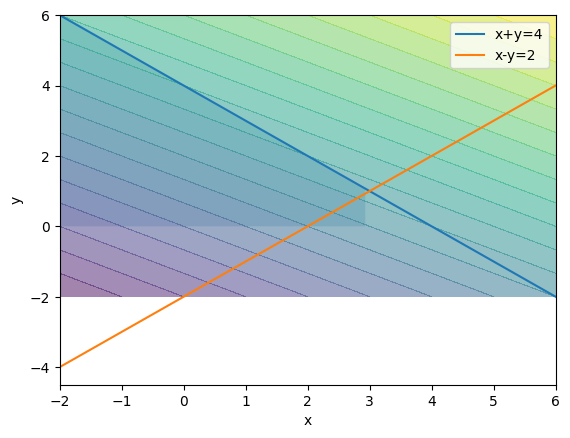

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define the lines
x = np.linspace(-2, 6, 100)
y1 = 4 - x
y2 = x - 2

# Plot the lines
plt.plot(x, y1, label='x+y=4')
plt.plot(x, y2, label='x-y=2')

# Plot the feasible region
plt.fill_between(x, np.maximum(y1, y2), np.maximum(y1*0, y2*0), where=(y1>y2), alpha=0.2)

# Plot the objective function
x, y = np.meshgrid(np.linspace(-2, 6, 50), np.linspace(-2, 6, 50))
z = 2*x + 3*y
plt.contourf(x, y, z, levels=20, alpha=0.5)

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [4]:
import sys
sys.path.append(r'C:\GAMS\42\api')
import gams


ModuleNotFoundError: No module named 'gams'

ModuleNotFoundError: No module named 'gams'

ModuleNotFoundError: No module named 'scipy'

In [389]:
import sympy as sp

# Define the symbols and constants
sigmamin = sp.symbols('sigmamin')
sigmamax = sp.symbols('sigmamax')

L = sp.symbols('L', real=True, positive=True)

# Define the integrand
f = sp.exp(-a*x**2)
f = (L/2-x)*(sigmamin + (sigmamax-sigmamin)/L*x)
# Integrate the function with respect to x
result = sp.integrate(f, (x, 0, L))

# Print the result
print("The integral of exp(-a*x^2) from 0 to L is:", sp.simplify(result))




The integral of exp(-a*x^2) from 0 to L is: L**2*(-sigmamax + sigmamin)/12


In [390]:
import sympy as sp

# Define the symbolic variables
sigmamax, sigmamin = sp.symbols('sigmamax sigmamin')
L = sp.symbols('L', real=True, positive=True)
N = sp.symbols('N')
M = sp.symbols('M')
# Define the equations
eq1 = sp.Eq(sigmamax*L/2 + sigmamin*L/2, N)
eq2 = sp.Eq(sigmamin*L**2/2 + (sigmamax-sigmamin)*L**2/6, M)
eq2 = sp.Eq(result, M)
# Solve the system of equations
sol = sp.solve((eq1, eq2), (sigmamin, sigmamax))

# Print the solution
print("The solution to the system of equations is:", sol)


The solution to the system of equations is: {sigmamin: (L*N + 6*M)/L**2, sigmamax: (L*N - 6*M)/L**2}


In [9]:
import ezdxf

def read_3d_box_data(file_path):
    doc = ezdxf.readfile(file_path)

    msp = doc.modelspace()

    # Iterate through all entities in the modelspace
    for entity in msp.query('*'):
        if entity.dxftype() == '3DFACE':
            print("found")
            # 3DFACE entity represents a 3D face, which can be part of a box
            # Get the vertices of the 3D face
            vertices = entity.get_points('xy')
            z_value = entity.dxf.elevation

            # Print or process the data as needed
            print(f"3D Box Vertex Coordinates: {vertices}, Z Value: {z_value}")

if __name__ == "__main__":
    # Replace 'your_file.dxf' with the path to your DXF file
    dxf_file_path = 'C:\\Users\\mmoussa\\Desktop\\3d_example.dxf'
    read_3d_box_data(dxf_file_path)



In [6]:
import ezdxf

def read_3d_box_data(file_path):
    doc = ezdxf.readfile(file_path)

    msp = doc.modelspace()

    # Iterate through all entities in the modelspace
    for entity in msp.query('*'):
        if entity.dxftype() == 'LWPOLYLINE':
            # LWPOLYLINE entity represents a lightweight polyline, which can be part of a box
            # Get the vertex coordinates of the polyline
            vertices = [(point.x, point.y, point.z) for point in entity.points()]
            
            # Print or process the data as needed
            print(f"3D Box Vertex Coordinates: {vertices}")

if __name__ == "__main__":
    # Replace 'your_file.dxf' with the path to your DXF file
    dxf_file_path = 'C:\\Users\\mmoussa\\Desktop\\3d_example.dxf'
    read_3d_box_data(dxf_file_path)




In [9]:
import ezdxf

def read_3d_solid_data(file_path):
    doc = ezdxf.readfile(file_path)

    msp = doc.modelspace()

    # Iterate through all entities in the modelspace
    for entity in msp.query('*'):
        if entity.dxftype() == '3DSOLID':
            print("hello")
            # 3DSOLID entity represents a 3D solid object
            # Get some basic information
            mass_props = entity.mass_properties()

            # Print or process the data as needed
            print(f"3D Solid Mass Properties: {mass_props}")

if __name__ == "__main__":
    # Replace 'your_file.dxf' with the path to your DXF file
    dxf_file_path = 'C:\\Users\\mmoussa\\Desktop\\3d_example.dxf'
    read_3d_solid_data(dxf_file_path)


hello


AttributeError: 'Solid3d' object has no attribute 'mass_properties'

In [37]:

from ezdxfgrabber import readfile

def read_3d_solid_faces(file_path):
    doc = readfile(file_path)

    msp = doc.modelspace()

    # Iterate through all entities in the modelspace
    for entity in msp.query('*'):
        if entity.dxftype() == '3DSOLID':
            # 3DSOLID entity represents a 3D solid object
            # Get the faces of the 3D solid
            faces = entity.get_faces()

            # Print or process the data as needed
            print(f"3D Solid Faces: {faces}")

if __name__ == "__main__":
    # Replace 'your_file.dxf' with the path to your DXF file
    dxf_file_path = 'C:\\Users\\mmoussa\\Desktop\\3d_example.dxf'
    read_3d_solid_faces(dxf_file_path)




ModuleNotFoundError: No module named 'ezdxfgrabber'

In [94]:
import ezdxf

def get_solid3d_attributes(file_path):
    doc = ezdxf.readfile(file_path)

    msp = doc.modelspace()
    
    # Query for all '3DSOLID' entities
    solids = msp.query('3DSOLID')
    
    for solid in solids:
        print("hello")
        print(f"Solid Type: {solid.dxftype()}")

        
        # Access common attributes
        thickness = solid.dxf
        extrusion = solid.dxf
        history_handle = solid.dxf.history_handle

        print(f"Thickness: {thickness}")
        print(f"Extrusion Vector: {extrusion}")
        print(f"History Handle: {history_handle}")

        # Access additional attributes or methods as needed
        # Note: Detailed geometry information (faces, vertices, etc.) may not be directly available.

        print("\n")

if __name__ == "__main__":
    # Replace 'your_file.dxf' with the path to your DXF file
    dxf_file_path = 'C:\\Users\\mmoussa\\Desktop\\3d_example.dxf'
    get_solid3d_attributes(dxf_file_path)


hello
Solid Type: 3DSOLID


TypeError: 'Solid3d' object is not iterable

[-0.74  0.27  0.61] [-0.48  0.72  0.5 ]
[-0.74  0.27  0.61] [-0.48  0.72  0.5 ]
[-0.74  0.27  0.61] [-0.86  0.07  0.5 ]
[-0.74  0.27  0.61] [-0.86  0.07  0.5 ]
[-0.74  0.27  0.61] [0. 0. 1.]
[-0.74  0.27  0.61] [0. 0. 1.]
[ 0.  0. -1.] [-0. -0. -1.]
[ 0.  0. -1.] [-0. -0. -1.]
[ 0.  0. -1.] [-0.  0. -1.]
[ 0.  0. -1.] [-0. -0. -1.]
[ 0.  0. -1.] [0.81 0.31 0.5 ]
[ 0.  0. -1.] [0.81 0.31 0.5 ]
[ 0.  0. -1.] [0.26 0.83 0.5 ]
[ 0.  0. -1.] [0.26 0.83 0.5 ]
[ 0.  0. -1.] [-0.12  0.86 -0.5 ]
[ 0.  0. -1.] [-0.86  0.07  0.5 ]
[ 0.  0. -1.] [ 0.59  0.63 -0.5 ]
[ 0.  0. -1.] [ 0.59  0.63 -0.5 ]
[0.81 0.31 0.5 ] [0.81 0.31 0.5 ]
[0.81 0.31 0.5 ] [0.26 0.83 0.5 ]
[0.81 0.31 0.5 ] [0.26 0.83 0.5 ]
[0.81 0.31 0.5 ] [-0.75  0.44 -0.5 ]
[0.81 0.31 0.5 ] [-0.75  0.44 -0.5 ]
[0.81 0.31 0.5 ] [0. 0. 1.]
[0.81 0.31 0.5 ] [-0.  0.  1.]
[-0.48  0.72  0.5 ] [-0.48  0.72  0.5 ]
[-0.48  0.72  0.5 ] [-0.48  0.72  0.5 ]
[-0.48  0.72  0.5 ] [0.26 0.83 0.5 ]
[-0.48  0.72  0.5 ] [0.26 0.83 0.5 ]
[-0.48  0.72  0.5

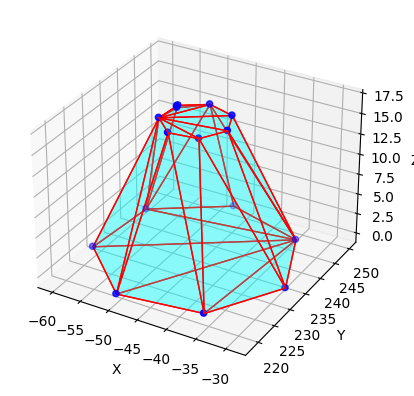

3
7
4
5
4
4
4
5
8
4
[[-34.09479134 245.7646596    0.        ]
 [-50.06855398 236.57941151  16.67708379]
 [-42.07448969 229.27743405  16.67708379]
 [-39.61228549 233.4814172   16.67708379]
 [-36.14893736 220.46888457   0.        ]
 [-60.35340401 228.10036835   0.        ]
 [-47.52725694 249.99981358   0.        ]
 [-49.9787907  236.82303245  16.67708379]
 [-59.21343897 242.13846441   0.        ]
 [-50.44714382 231.91726805  16.67708379]
 [-41.36393265 238.02758658  16.67708379]
 [-50.24868753 236.88795604  16.32049321]
 [-29.03096274 232.62215979   0.        ]
 [-46.89645528 228.58132219  16.67708379]
 [-50.08873513 218.45649806   0.        ]
 [-46.01040515 239.49258393  16.67708379]]
[1. 0. 0.] [ 1. -0. -0.]
[1. 0. 0.] [ 0.  0. -1.]
[1. 0. 0.] [-0. -0. -1.]
[1. 0. 0.] [-0.  1.  0.]
[1. 0. 0.] [0. 1. 0.]
[1. 0. 0.] [ 0.  1. -0.]
[1. 0. 0.] [0. 0. 1.]
[1. 0. 0.] [-0.  0.  1.]
[ 0.  0. -1.] [-0. -0. -1.]
[ 0.  0. -1.] [-0.  1.  0.]
[ 0.  0. -1.] [0. 1. 0.]
[ 0.  0. -1.] [0. 1. 0.]
[ 0.  0

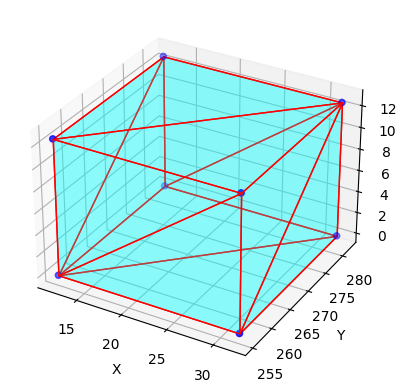

4
4
4
4
4
4
[[ 31.93651283 255.11872734   0.        ]
 [ 12.01555056 255.11872734  12.52681467]
 [ 12.01555056 282.04687255   0.        ]
 [ 31.93651283 282.04687255   0.        ]
 [ 31.93651283 255.11872734  12.52681467]
 [ 12.01555056 255.11872734   0.        ]
 [ 12.01555056 282.04687255  12.52681467]
 [ 31.93651283 282.04687255  12.52681467]]
[1. 0. 0.] [ 1. -0.  0.]
[1. 0. 0.] [-0.  1. -0.]
[1. 0. 0.] [ 0.  1. -0.]
[1. 0. 0.] [0. 0. 1.]
[1. 0. 0.] [0. 0. 1.]
[1. 0. 0.] [0. 0. 1.]
[1. 0. 0.] [ 0.  1. -0.]
[-0.  1. -0.] [ 0.  1. -0.]
[-0.  1. -0.] [0. 0. 1.]
[-0.  1. -0.] [ 0. -0.  1.]
[-0.  1. -0.] [0. 0. 1.]
[-0.  1. -0.] [0. 0. 1.]
[-0.  1. -0.] [ 1.  0. -0.]
[-0.  1. -0.] [1. 0. 0.]
[0. 0. 1.] [ 0. -0.  1.]
[0. 0. 1.] [ 1.  0. -0.]
[0. 0. 1.] [1. 0. 0.]
[0. 0. 1.] [ 0.  1. -0.]
[0. 0. 1.] [0. 1. 0.]
[0. 0. 1.] [0. 0. 1.]
[0. 0. 1.] [ 1.  0. -0.]
[0. 0. 1.] [1. 0. 0.]
[0. 0. 1.] [ 0.  1. -0.]
[0. 0. 1.] [0. 1. 0.]
[ 1.  0. -0.] [1. 0. 0.]
[ 1.  0. -0.] [ 0.  1. -0.]
[ 1.  0. -0.]

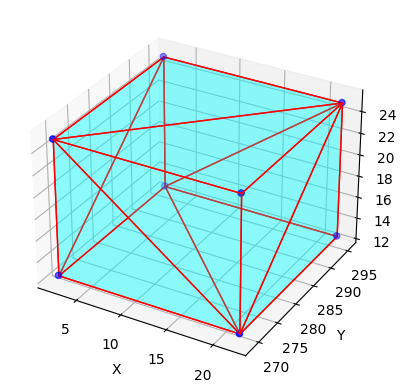

4
4
4
4
4
4
[[  2.05506943 268.58279994  12.52681467]
 [  2.05506943 295.51094516  12.52681467]
 [ 21.9760317  268.58279994  25.05362934]
 [  2.05506943 268.58279994  25.05362934]
 [  2.05506943 295.51094516  25.05362934]
 [ 21.9760317  295.51094516  12.52681467]
 [ 21.9760317  268.58279994  12.52681467]
 [ 21.9760317  295.51094516  25.05362934]]
[-0.74  0.27 -0.61] [-0.86  0.07 -0.5 ]
[-0.74  0.27 -0.61] [-0.86  0.07 -0.5 ]
[-0.74  0.27 -0.61] [-0.86  0.07 -0.5 ]
[-0.74  0.27 -0.61] [-0.48  0.72 -0.5 ]
[-0.74  0.27 -0.61] [-0.48  0.72 -0.5 ]
[-0.74  0.27 -0.61] [0. 0. 1.]
[-0.74  0.27 -0.61] [-0. -0.  1.]
[-0.74  0.27 -0.61] [-0. -0.  1.]
[ 0. -0.  1.] [-0. -0.  1.]
[ 0. -0.  1.] [ 0. -0.  1.]
[ 0. -0.  1.] [ 0. -0.  1.]
[ 0. -0.  1.] [ 0. -0.  1.]
[ 0. -0.  1.] [0.59 0.63 0.5 ]
[ 0. -0.  1.] [0.59 0.63 0.5 ]
[ 0. -0.  1.] [-0.86  0.07 -0.5 ]
[ 0. -0.  1.] [-0.86  0.07 -0.5 ]
[ 0. -0.  1.] [-0.86  0.07 -0.5 ]
[ 0. -0.  1.] [-0.48  0.72 -0.5 ]
[ 0. -0.  1.] [-0.48  0.72 -0.5 ]
[ 0. -0.

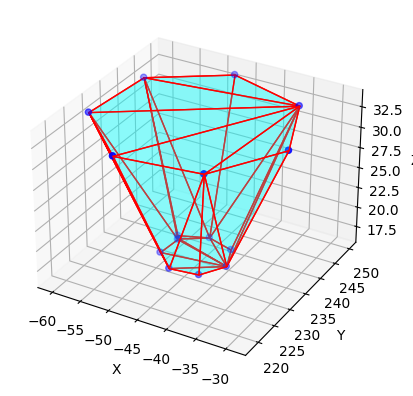

3
7
4
4
5
5
4
8
4
4
[[-46.01040515 239.49258393  16.67708379]
 [-47.52725694 249.99981358  33.35416758]
 [-36.14893736 220.46888457  33.35416758]
 [-41.36393265 238.02758658  16.67708379]
 [-29.03096274 232.62215979  33.35416758]
 [-50.08873513 218.45649806  33.35416758]
 [-34.09479134 245.7646596   33.35416758]
 [-42.07448969 229.27743405  16.67708379]
 [-50.06855398 236.57941151  16.67708379]
 [-59.21343897 242.13846441  33.35416758]
 [-50.24868753 236.88795604  17.03367437]
 [-50.44714382 231.91726805  16.67708379]
 [-60.35340401 228.10036835  33.35416758]
 [-39.61228549 233.4814172   16.67708379]
 [-46.89645528 228.58132219  16.67708379]
 [-49.9787907  236.82303245  16.67708379]]
[[ 12.01555056 255.11872734   0.        ]
 [ 12.01555056 255.11872734  12.52681467]
 [ 12.01555056 282.04687255   0.        ]
 [ 12.01555056 282.04687255  12.52681467]]
{'1': {'nodes': array([[  1.   , -34.095, 245.765,   0.   ],
       [  1.   , -50.069, 236.579,  16.677],
       [  1.   , -42.074, 229.27

AttributeError: 'Segment' object has no attribute 'start'

In [373]:
import ezdxf
from collections import Counter
from scipy.spatial import ConvexHull
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import Geometry3D as G3D
from Geometry3D import *

def read_solid3d_data(file_path):
    blocks = dict()
    doc = ezdxf.readfile(file_path)

    msp = doc.modelspace()
    polygons = msp.query('3DSOLID') # Extract all polygon entities
    
    block_ind = 1  
    # Iterate through all entities in the modelspace
    for entity in msp.query('*'):
        unique_start_points = set()
        
        if entity.dxftype() == 'POLYLINE':
            print("hello")
            
        if entity.dxftype() == 'INSERT':
            
            
            #for entity1 in entity.virtual_entities():
                
                #print(f"Found {str(entity1)}.")
            points = entity.explode()
            
            
            3#for i in points:
              #  print(i)
               # print(points[1].dxf.text)
                #print(points[1].dxftype())
                #print(points[1].dxf.insert[0],points[1].dxf.insert[1])
                #j = i.explode()
            for i in points:               
                 # Iterate over the points and add unique start points to the set
            
                unique_start_points.add(i.dxf.start)
                #unique_start_points.add(i.dxf.end)
            unique_start_points = np.array(list(unique_start_points)  )   
            
            points = unique_start_points
            #centroid of the block using points coordinates
            centroid = np.mean(points, axis=0)

            # Create a convex hull to form a 3D solid       
            hull = ConvexHull(points)
            
            # Calculate the centroid of the convex hull
            centroid = np.mean(hull.points[hull.vertices], axis=0)
            
            # Store faces' coordinates
            faces = []


            # Generate some random 3D points (replace this with your own data)
            np.random.seed(42)
            num_points = 100
            # Plot the 3D solid
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            
            # Plot the points
            ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b')
            
            # Plot the convex hull using the simplices directly
            for simplex in hull.simplices:
                faces.append(simplex)  # Store the face indices
                poly3d = [[points[i, 0], points[i, 1], points[i, 2]] for i in simplex]
                ax.add_collection3d(Poly3DCollection([poly3d], facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))
            
            
            
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')



            # Group coplanar faces and extract coordinates without repetition
            grouped_vertices = []
            visited = set()
            
            for i, face1 in enumerate(faces):
    
                if i not in visited:
                    coordinates = points[face1]
                    for j, face2 in enumerate(faces[i + 1:]):  
                        if are_faces_coplanar(points,face1, face2):
                            coordinates = np.concatenate([coordinates, points[face2]])
                            coordinates = np.unique(coordinates, axis=0)
                            
                            # Mark the face as visited to avoid repetition
                            visited.add(i + j + 1 ) 
                        
                     
                    x,y,z = coordinates[:,0], coordinates[:,1], coordinates[:,2]
                    #ax.scatter(x,y,z,marker = 'x',s = 200)
                    
                    grouped_vertices.append(coordinates)
                        
            plt.show()
            #print(grouped_vertices)
            
            for i in grouped_vertices:
                print(len(i))
        

            
            # Plot the convex hull
            for simplex in hull.simplices:
                simplex = np.append(simplex, simplex[0])  # close the simplex
                
                poly3d = [[unique_start_points[i, 0], unique_start_points[i, 1], unique_start_points[i, 2]] for i in simplex]
                faces.append(poly3d)  # Store the face coordinates
            
            #v = points[0].get_points()
            count = 0
            print(unique_start_points) 
            for i in points:
                count = count+1
            
            points =  np.round(points, decimals=3)
            
            blocks[str(block_ind)] = dict()
            
            blocks[str(block_ind)]["nodes"] = np.hstack((np.ones((points.shape[0],1)),points)) 
            blocks[str(block_ind)]["faces"] = grouped_vertices
            
            block_ind += 1
    return blocks,points
            
            
def blocks_intersection(block1,block2):
    for face1 in block1["faces"]:
        for face2 in block2["faces"]:
            
            polygon1 = ConvexPolygon([Point(*point) for point in face1])
            polygon2 = ConvexPolygon([Point(*point) for point in face2])

           
            inter = G3D.intersection(polygon1,polygon2)
            
            print(inter)
            if inter is not None:
                print(inter)
                print(inter.start.x)
                #xx, yy = inter.exterior.coords.xy
               
             
    return False



def find_line_position(lines_array, line_to_check):
    for i, line in enumerate(lines_array):
        if np.array_equal(line, line_to_check) :
            return i  # Return the index when a match is found


# add all blocks nodes to a new array, this does count the additional nodes showed by the blocks intersection
def points_array(blocks): 
    nodes = np.empty((0,4))
    new_ind = 1
    for block in blocks.values():
        for i,node in enumerate(block["nodes"]):
            
            check = any( np.array_equal(line[1:4], node[1:])  for line in nodes  ) 

            
            if not check:
                node[0] = new_ind
                block["nodes"][i][0] = new_ind
                nodes = np.append(nodes, np.array([node]) ,axis = 0)
                new_ind += 1
            else:
                block["nodes"][i][0] = find_line_position( nodes[:,1:4] , node[1:]) + 1
                
    print(nodes)            
    return blocks            
    
                                                                 
            
         
            


if __name__ == "__main__":
    # Replace 'your_file.dxf' with the path to your DXF file
    dxf_file_path = 'C:\\Users\\mmoussa\\Desktop\\3d_example.dxf'
    blocks,points = read_solid3d_data(dxf_file_path)
    print(blocks["2"]["faces"][0])
    
    print(blocks)
    
    print(blocks_intersection(blocks["1"],blocks["4"]))
    
    blocks = points_array(blocks)
    print(blocks)
    
    

def are_faces_coplanar(points,face1, face2):
    
    intersection_set = set(face1) & set(face2)
    
    # Print the result
    
    if intersection_set:
    
        centroid_face1 = np.mean(points[face1], axis=0) 
        centroid_face2 = np.mean(points[face2], axis=0) 
        
        normal1 = np.cross(points[face1[1]] - points[face1[0]], points[face1[2]] - points[face1[0]])
        normal2 = np.cross(points[face2[1]] - points[face2[0]], points[face2[2]] - points[face2[0]])

        normal1 /= np.linalg.norm(normal1)
        normal2 /= np.linalg.norm(normal2)
        
        if np.dot(normal1, centroid - centroid_face1) > 0:
            normal1 *= -1
        if np.dot(normal2, centroid - centroid_face2) > 0:
            normal2 *= -1    
        

        # 3 is the number of decimal digits which can be modified according to the data
        normal1 = np.round(normal1,2)
        normal2 = np.round(normal2,2)
        print(normal1,normal2)
        test = (normal1 == normal2)
        test = min(test)
        #np.allclose(normal1, normal2, rtol=1e-3)
        return test
    
    return False




def normal_faces(faces, points):
    all_normal = []
    
    for i in range(len(faces)):
        face1 = faces[i]
        centroid_face1 = np.mean(points[face1], axis=0) 
        normal1 = np.cross(points[face1[1]] - points[face1[0]], points[face1[2]] - points[face1[0]])
        normal1 /= np.linalg.norm(normal1)
        
        if np.dot(normal1, centroid - centroid_face1) > 0:
            normal1 *= -1

        # 3 is the number of decimal digits which can be modified according to the data
        normal1 = tuple(np.round(normal1, 1))
        all_normal.append(normal1)

    # Count the occurrences of each unique normal vector
    normal_counts = Counter(all_normal)
    
    # Convert the Counter result back to a list of unique normal vectors and their counts
    unique_normals, counts = zip(*normal_counts.items())
    
    return unique_normals, counts

#print(normal_faces(faces,points))
#print(len(faces))



[ 22.766547   -12.25247506  -2.79409794] [ 1.11858000e-05  2.65857945e+01 -1.16582746e+02]
[ 22.766547   -12.25247506  -2.79409794] [ 4.28166000e-05  2.65858261e+01 -1.16582793e+02]
[ 22.766547   -12.25247506  -2.79409794] [-1.11858000e-05 -2.65857945e+01  1.16582746e+02]
[ 22.766547   -12.25247506  -2.79409794] [ 22.76656303 -12.25247506  -2.7940592 ]
[ 22.766547   -12.25247506  -2.79409794] [-1.11858000e-05 -2.65858261e+01  1.16582885e+02]
[ 22.766547   -12.25247506  -2.79409794] [23.38881565 41.31090025  9.42055385]
[ 22.766547   -12.25247506  -2.79409794] [-23.38880005 -41.31086862  -9.42067724]
[ 22.766547   -12.25247506  -2.79409794] [-23.38880005 -41.31086862  -9.42067724]
[ 1.11858000e-05  2.65857945e+01 -1.16582746e+02] [ 4.28166000e-05  2.65858261e+01 -1.16582793e+02]
[ 1.11858000e-05  2.65857945e+01 -1.16582746e+02] [23.38880005 41.31090025  9.42068445]
[ 1.11858000e-05  2.65857945e+01 -1.16582746e+02] [23.38881565 41.31090025  9.42055385]
[ 1.11858000e-05  2.65857945e+01 -1

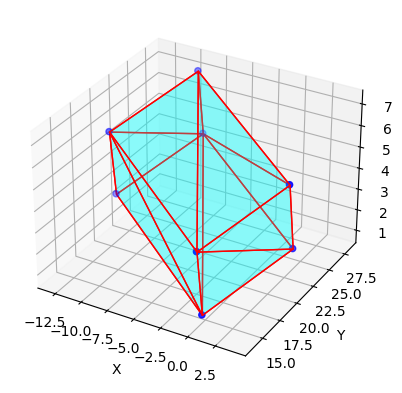

4
4
4
4
4
4


In [370]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Generate some random 3D points (replace this with your own data)
np.random.seed(42)
num_points = 100
points = np.array([[  3.96359117,  21.22458478,   2.40491812],
 [ -9.09674528,  27.5320618,    7.17085666],
 [  0.09000201,  14.38278796,   0.84470046],
 [  0.09000201  ,13.66147301,   4.00777856],
 [-12.97033445  ,21.41157994  , 2.44756089],
 [ -9.09674528  ,28.25337675,   4.00777856],
 [-12.97033445  ,20.69026498  , 5.61063899],
 [  3.96359117  ,20.50326982 ,  5.56799622]])

points =  np.round(points, decimals=5)




centroid = np.mean(points, axis=0)

# Create a convex hull to form a 3D solid
from scipy.spatial import ConvexHull
    
hull = ConvexHull(points)

# Calculate the centroid of the convex hull
centroid = np.mean(hull.points[hull.vertices], axis=0)



# Store faces' indices
faces = []

# Plot the 3D solid
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b')

# Plot the convex hull using the simplices directly
for simplex in hull.simplices:
    faces.append(simplex)  # Store the face indices
    poly3d = [[points[i, 0], points[i, 1], points[i, 2]] for i in simplex]
    ax.add_collection3d(Poly3DCollection([poly3d], facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))



ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')



# Group coplanar faces and extract coordinates without repetition
grouped_vertices = []
visited = set()

def are_faces_coplanar(points,face1, face2):
    
    intersection_set = set(face1) & set(face2)
    
    # Print the result
    
    if intersection_set:
    
        centroid_face1 = np.mean(points[face1], axis=0) 
        centroid_face2 = np.mean(points[face2], axis=0) 
        
        normal1 = np.cross(points[face1[1]] - points[face1[0]], points[face1[2]] - points[face1[0]])
        normal2 = np.cross(points[face2[1]] - points[face2[0]], points[face2[2]] - points[face2[0]])
        
        if np.dot(normal1, centroid - centroid_face1) > 0:
            normal1 *= -1
        if np.dot(normal2, centroid - centroid_face2) > 0:
            normal2 *= -1    
        print(normal1,normal2)

        # 3 is the number of decimal digits which can be modified according to the data
        normal1 = np.round(normal1,3)
        normal2 = np.round(normal2,3)
        
        return np.allclose(normal1, normal2, rtol=1e-3)
    
    return False
firsttime = False

for i, face1 in enumerate(faces):
    
    found = 0
    
    if i  not in visited:
        coordinates_face1 = points[face1]
        for j, face2 in enumerate(faces[i + 1:]):
            coordinates = np.concatenate([coordinates_face1, points[face2]])
            coordinates = np.unique(coordinates, axis=0)
            
            if are_faces_coplanar(points,face1, face2):
                found = 1
                # Mark the face as visited to avoid repetition
                visited.add(i + j + 1)
                
                grouped_vertices.append(coordinates)
                 
        if found == 0:
            if firsttime: 
                x,y,z = coordinates_face1[:,0], coordinates_face1[:,1], coordinates_face1[:,2]
                ax.scatter(x,y,z,marker = 'x',s = 200)
            firsttime = True
            grouped_vertices.append(coordinates_face1)
                

print(faces)
plt.show()
#print(grouped_vertices)

for i in grouped_vertices:
    print(len(i))


In [172]:
def compare(a,b):
    return min([a != b , a!=b,a!=b])
compare([1,2],[1,3])


True

[[-12.28636744 144.21023999   0.        ]
 [-14.25993991 147.07753041   0.        ]
 [ -7.72344265 146.12683925   7.50250776]
 [ -7.72344265 146.12683925   0.        ]
 [-14.36808994 136.12583121   7.50250776]
 [-14.25993991 147.07753041   7.50250776]
 [-14.36808994 136.12583121   0.        ]
 [-12.28636744 144.21023999   7.50250776]]


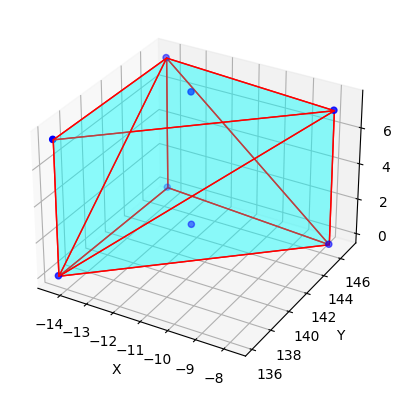

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Generate some random 3D points (replace this with your own data)
np.random.seed(42)
num_points = 100
points = np.array([[-12.28636744, 144.21023999,   0.        ],
 [-14.25993991, 147.07753041,   0.        ],
 [ -7.72344265, 146.12683925 ,  7.50250776],
 [ -7.72344265, 146.12683925,   0.        ],
 [-14.36808994, 136.12583121,   7.50250776],
 [-14.25993991, 147.07753041,   7.50250776],
 [-14.36808994, 136.12583121,   0.        ],
 [-12.28636744, 144.21023999,   7.50250776]])
print(points)
# Create a convex hull to form a 3D solid
from scipy.spatial import ConvexHull

hull = ConvexHull(points)

print(hull)

# Plot the 3D solid
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o')

# Plot the convex hull
for simplex in hull.simplices:
    simplex = np.append(simplex, simplex[0])  # close the simplex
    poly3d = [[points[i, 0], points[i, 1], points[i, 2]] for i in simplex]
    ax.add_collection3d(Poly3DCollection([poly3d], facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


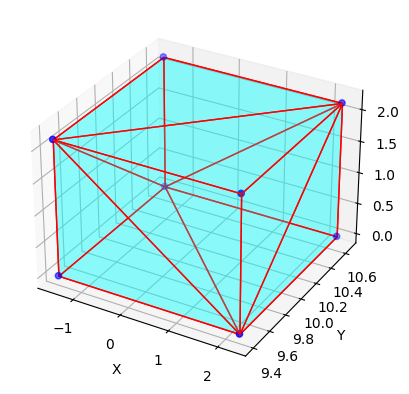

12


In [174]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Generate some random 3D points (replace this with your own data)
np.random.seed(42)
num_points = 100
points = np.array([[ 2.27659844 ,10.65472664 , 2.14385984],
 [ 2.27659844 , 9.39911958 , 2.14385984],
 [ 2.27659844, 10.65472664 , 0.        ],
 [-1.48812585, 10.65472664 , 2.14385984],
 [-1.48812585 , 9.39911958  ,2.14385984],
 [ 2.27659844 , 9.39911958 , 0.        ],
 [-1.48812585,  9.39911958,  0.        ],
 [-1.48812585, 10.65472664 , 0.        ],])

# Create a convex hull to form a 3D solid
from scipy.spatial import ConvexHull

hull = ConvexHull(points)


sorted_indices = np.argsort(hull.vertices)
hull_vertices = hull.vertices[sorted_indices]

# Store faces' coordinates
faces = []

# Plot the 3D solid
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o')

# Plot the convex hull
for simplex in hull.simplices:
    simplex = np.append(simplex, simplex[0])  # close the simplex
    poly3d = [[points[i, 0], points[i, 1], points[i, 2]] for i in simplex]
    faces.append(poly3d)  # Store the face coordinates
    ax.add_collection3d(Poly3DCollection([poly3d], facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

# Now, 'faces' contains the coordinates of each face as a list of polygons.
print(len(faces))


IndexError: index 4 is out of bounds for axis 0 with size 4

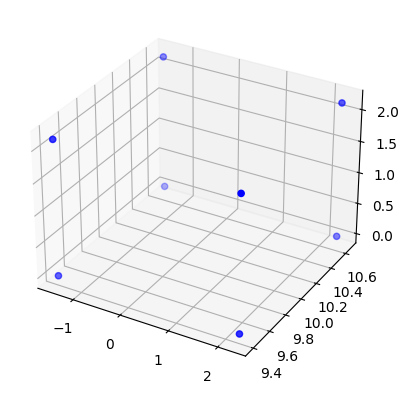

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Generate some random 3D points (replace this with your own data)
np.random.seed(42)
num_points = 100
points = np.array([[2.27659844, 10.65472664, 2.14385984],
                   [2.27659844, 9.39911958, 2.14385984],
                   [2.27659844, 10.65472664, 0.],
                   [-1.48812585, 10.65472664, 2.14385984],
                   [-1.48812585, 9.39911958, 2.14385984],
                   [2.27659844, 9.39911958, 0.],
                   [-1.48812585, 9.39911958, 0.],
                   [-1.48812585, 10.65472664, 0.]])

# Create a convex hull to form a 3D solid
from scipy.spatial import ConvexHull

hull = ConvexHull(points)

# Sort the indices for consistent order in visualization
sorted_indices = np.argsort(hull.vertices)
hull_vertices = hull.vertices[sorted_indices]

# Store faces' coordinates
faces = []

# Plot the 3D solid
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o')

# Plot the convex hull
for simplex in hull.simplices:
    # Check if all indices are within the hull vertices
    if all(idx in sorted_indices for idx in simplex):
        simplex = np.append(simplex, simplex[0])  # close the simplex
        simplex = simplex[sorted_indices]  # sort the indices
        poly3d = [[points[i, 0], points[i, 1], points[i, 2]] for i in simplex]
        faces.append(poly3d)  # Store the face coordinates
        ax.add_collection3d(Poly3DCollection([poly3d], facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

# Now, 'faces' contains the coordinates of each face as a list of polygons.
print(len(faces))


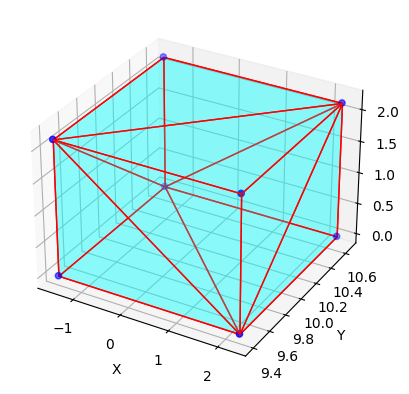

[[[-1.48812585, 9.39911958, 2.14385984], [2.27659844, 9.39911958, 2.14385984], [2.27659844, 10.65472664, 2.14385984]], [[-1.48812585, 9.39911958, 2.14385984], [2.27659844, 10.65472664, 2.14385984], [-1.48812585, 10.65472664, 2.14385984]], [[2.27659844, 9.39911958, 0.0], [-1.48812585, 10.65472664, 0.0], [-1.48812585, 9.39911958, 0.0]]]
[[[-1.48812585, 10.65472664, 0.0], [2.27659844, 10.65472664, 2.14385984], [-1.48812585, 10.65472664, 2.14385984]], [[-1.48812585, 10.65472664, 0.0], [2.27659844, 10.65472664, 0.0], [2.27659844, 10.65472664, 2.14385984]], [[2.27659844, 9.39911958, 0.0], [-1.48812585, 9.39911958, 2.14385984], [-1.48812585, 9.39911958, 0.0]]]
[[[-1.48812585, 10.65472664, 0.0], [-1.48812585, 9.39911958, 2.14385984], [-1.48812585, 10.65472664, 2.14385984]], [[2.27659844, 9.39911958, 0.0], [2.27659844, 9.39911958, 2.14385984], [2.27659844, 10.65472664, 2.14385984]]]
[[[-1.48812585, 10.65472664, 0.0], [-1.48812585, 9.39911958, 2.14385984], [-1.48812585, 9.39911958, 0.0]], [[2.27

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Generate some random 3D points (replace this with your own data)
np.random.seed(42)
num_points = 100
points = np.array([[2.27659844, 10.65472664, 2.14385984],
                   [2.27659844, 9.39911958, 2.14385984],
                   [2.27659844, 10.65472664, 0.],
                   [-1.48812585, 10.65472664, 2.14385984],
                   [-1.48812585, 9.39911958, 2.14385984],
                   [2.27659844, 9.39911958, 0.],
                   [-1.48812585, 9.39911958, 0.],
                   [-1.48812585, 10.65472664, 0.]])

# Create a convex hull to form a 3D solid
from scipy.spatial import ConvexHull

hull = ConvexHull(points)

# Store faces' coordinates
faces = []

# Plot the 3D solid
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o')

# Plot the convex hull using the simplices directly
for simplex in hull.simplices:
    poly3d = [[points[i, 0], points[i, 1], points[i, 2]] for i in simplex]
    faces.append(poly3d)  # Store the face coordinates
    ax.add_collection3d(Poly3DCollection([poly3d], facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

# Now, 'faces' contains the coordinates of each face as a list of polygons.

# Group coplanar faces
grouped_faces = []
visited = set()

for i, face1 in enumerate(faces):
    if i not in visited:
        group = [face1]
        normal1 = np.cross(np.array(face1[1]) - np.array(face1[0]), np.array(face1[2]) - np.array(face1[0]))
        for j, face2 in enumerate(faces[i + 1:]):
            normal2 = np.cross(np.array(face2[1]) - np.array(face2[0]), np.array(face2[2]) - np.array(face2[0]))
            if np.allclose(normal1, normal2, rtol=1e-3):
                group.append(face2)
                visited.add(i + j + 1)

        grouped_faces.append(group)

# Print the grouped faces
for group in grouped_faces:
    print(group)
print(len(grouped_faces))

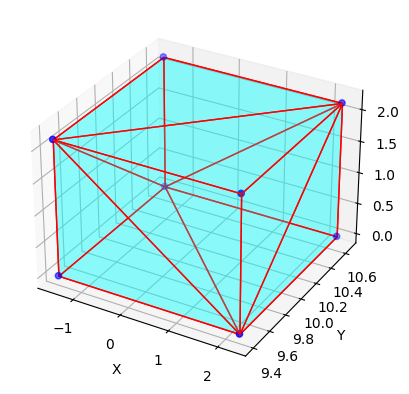

[[[-1.48812585, 9.39911958, 2.14385984], [2.27659844, 9.39911958, 2.14385984], [2.27659844, 10.65472664, 2.14385984]], [[-1.48812585, 9.39911958, 2.14385984], [2.27659844, 10.65472664, 2.14385984], [-1.48812585, 10.65472664, 2.14385984]], [[2.27659844, 9.39911958, 0.0], [-1.48812585, 10.65472664, 0.0], [-1.48812585, 9.39911958, 0.0]]]


In [185]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Generate some random 3D points (replace this with your own data)
np.random.seed(42)
num_points = 100
points = np.array([[2.27659844, 10.65472664, 2.14385984],
                   [2.27659844, 9.39911958, 2.14385984],
                   [2.27659844, 10.65472664, 0.],
                   [-1.48812585, 10.65472664, 2.14385984],
                   [-1.48812585, 9.39911958, 2.14385984],
                   [2.27659844, 9.39911958, 0.],
                   [-1.48812585, 9.39911958, 0.],
                   [-1.48812585, 10.65472664, 0.]])

# Create a convex hull to form a 3D solid
from scipy.spatial import ConvexHull

hull = ConvexHull(points)

# Store faces' coordinates
faces = []

# Plot the 3D solid
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o')

# Plot the convex hull using the simplices directly
for simplex in hull.simplices:
    poly3d = [[points[i, 0], points[i, 1], points[i, 2]] for i in simplex]
    faces.append(poly3d)  # Store the face coordinates
    ax.add_collection3d(Poly3DCollection([poly3d], facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

# Group coplanar faces
grouped_faces = []
visited = set()

for i, face1 in enumerate(faces):
    if i not in visited:
        group = [face1]
        normal1 = np.cross(np.array(face1[1]) - np.array(face1[0]), np.array(face1[2]) - np.array(face1[0]))
        for j, face2 in enumerate(faces[i + 1:]):
            normal2 = np.cross(np.array(face2[1]) - np.array(face2[0]), np.array(face2[2]) - np.array(face2[0]))
            if np.allclose(normal1, normal2, rtol=1e-3):
                group.append(face2)
                visited.add(i + j + 1)

        grouped_faces.append(group)
print(grouped_faces[0])


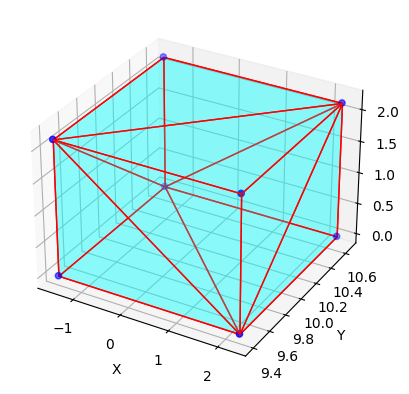

[-1.48812585 10.65472664  0.          2.27659844 10.65472664  2.14385984
 -1.48812585 10.65472664  2.14385984 -1.48812585 10.65472664  0.
  2.27659844 10.65472664  0.          2.27659844 10.65472664  2.14385984
  2.27659844  9.39911958  0.         -1.48812585  9.39911958  2.14385984
 -1.48812585  9.39911958  0.        ]


In [195]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Generate some random 3D points (replace this with your own data)
np.random.seed(42)
num_points = 100
points = np.array([[2.27659844, 10.65472664, 2.14385984],
                   [2.27659844, 9.39911958, 2.14385984],
                   [2.27659844, 10.65472664, 0.],
                   [-1.48812585, 10.65472664, 2.14385984],
                   [-1.48812585, 9.39911958, 2.14385984],
                   [2.27659844, 9.39911958, 0.],
                   [-1.48812585, 9.39911958, 0.],
                   [-1.48812585, 10.65472664, 0.]])

# Create a convex hull to form a 3D solid
from scipy.spatial import ConvexHull

hull = ConvexHull(points)

# Store faces' coordinates
faces = []

# Plot the 3D solid
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o')

# Plot the convex hull using the simplices directly
for simplex in hull.simplices:
    poly3d = [[points[i, 0], points[i, 1], points[i, 2]] for i in simplex]
    faces.append(poly3d)  # Store the face coordinates
    ax.add_collection3d(Poly3DCollection([poly3d], facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

# Group coplanar faces and extract coordinates
grouped_coordinates = []
visited = set()

for i, face1 in enumerate(faces):
    if i not in visited:
        coordinates = np.concatenate(face1)
        for j, face2 in enumerate(faces[i + 1:]):
            normal1 = np.cross(np.array(face1[1]) - np.array(face1[0]), np.array(face1[2]) - np.array(face1[0]))
            normal2 = np.cross(np.array(face2[1]) - np.array(face2[0]), np.array(face2[2]) - np.array(face2[0]))
            if np.allclose(normal1, normal2, rtol=1e-3):
                coordinates = np.concatenate([coordinates, np.concatenate(face2)])
                visited.add(i + j + 1)

        grouped_coordinates.append(coordinates)




print(grouped_coordinates[1])

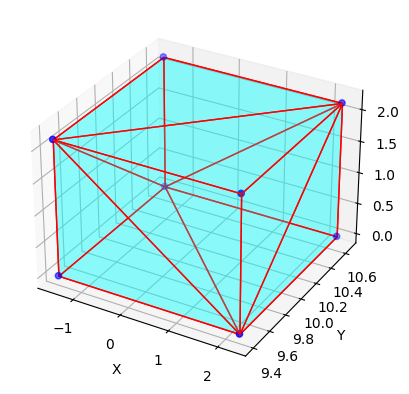

[[-1.48812585  9.39911958  2.14385984]
 [ 2.27659844  9.39911958  2.14385984]
 [ 2.27659844 10.65472664  2.14385984]
 [-1.48812585  9.39911958  2.14385984]
 [ 2.27659844 10.65472664  2.14385984]
 [-1.48812585 10.65472664  2.14385984]
 [ 2.27659844  9.39911958  0.        ]
 [-1.48812585 10.65472664  0.        ]
 [-1.48812585  9.39911958  0.        ]]


In [205]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Generate some random 3D points (replace this with your own data)
np.random.seed(42)
num_points = 100
points = np.array([[2.27659844, 10.65472664, 2.14385984],
                   [2.27659844, 9.39911958, 2.14385984],
                   [2.27659844, 10.65472664, 0.],
                   [-1.48812585, 10.65472664, 2.14385984],
                   [-1.48812585, 9.39911958, 2.14385984],
                   [2.27659844, 9.39911958, 0.],
                   [-1.48812585, 9.39911958, 0.],
                   [-1.48812585, 10.65472664, 0.]])


# Create a convex hull to form a 3D solid
from scipy.spatial import ConvexHull

hull = ConvexHull(points)

# Store faces' indices
faces = []

# Plot the 3D solid
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o')

# Plot the convex hull using the simplices directly
for simplex in hull.simplices:
    faces.append(simplex)  # Store the face indices
    poly3d = [[points[i, 0], points[i, 1], points[i, 2]] for i in simplex]
    ax.add_collection3d(Poly3DCollection([poly3d], facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

# Group coplanar faces and extract coordinates
grouped_vertices = []
visited = set()

for i, face1 in enumerate(faces):
    if i not in visited:
        coordinates = points[face1]
        for j, face2 in enumerate(faces[i + 1:]):
            normal1 = np.cross(points[face1[1]] - points[face1[0]], points[face1[2]] - points[face1[0]])
            normal2 = np.cross(points[face2[1]] - points[face2[0]], points[face2[2]] - points[face2[0]])
            if np.allclose(normal1, normal2, rtol=1e-3):
                coordinates = np.concatenate([coordinates, points[face2]])
                visited.add(i + j + 1)

        grouped_vertices.append(coordinates)
print(grouped_vertices[0])


[-5.2226456  12.87813221  1.73303782]
[-5.2226456  12.87813221  1.73303782]


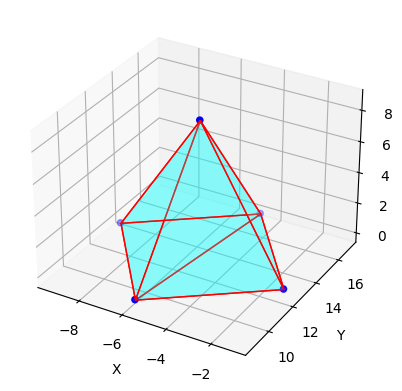

[-40.52819709 -31.06341736  17.36334297] [ 31.06341736 -40.52819709  17.363343  ]
[-40.52819709 -31.06341736  17.36334297] [-31.06341736  40.52819701  17.36334301]
[-40.52819709 -31.06341736  17.36334297] [40.52819709 31.06341744 17.36334305]
[-40.52819709 -31.06341736  17.36334297] [ -0.          -0.         -34.72668605]
[-40.52819709 -31.06341736  17.36334297] [  0.           0.         -34.72668597]
[ 31.06341736 -40.52819709  17.363343  ] [-31.06341736  40.52819701  17.36334301]
[ 31.06341736 -40.52819709  17.363343  ] [40.52819709 31.06341744 17.36334305]
[ 31.06341736 -40.52819709  17.363343  ] [ -0.          -0.         -34.72668605]
[ 31.06341736 -40.52819709  17.363343  ] [  0.           0.         -34.72668597]
[-31.06341736  40.52819701  17.36334301] [40.52819709 31.06341744 17.36334305]
[-31.06341736  40.52819701  17.36334301] [ -0.          -0.         -34.72668605]
[-31.06341736  40.52819701  17.36334301] [  0.           0.         -34.72668597]
[40.52819709 31.06341744 

In [293]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Generate some random 3D points (replace this with your own data)
np.random.seed(42)
num_points = 100
points = np.array([[-9.35363533 ,13.42427031 , 0.        ],
 [-5.2226456 , 12.87813221 , 8.6651891 ],
 [-4.67650751, 17.00912195 , 0.        ],
 [-1.09165586, 12.33199412 , 0.        ],
 [-5.76878369,  8.74714248,  0.        ]])

centroid = np.mean(points, axis=0)
print(centroid)

# Create a convex hull to form a 3D solid
from scipy.spatial import ConvexHull
    
hull = ConvexHull(points)

# Calculate the centroid of the convex hull
centroid = np.mean(hull.points[hull.vertices], axis=0)

print(centroid)

# Store faces' indices
faces = []

# Plot the 3D solid
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o')

# Plot the convex hull using the simplices directly
for simplex in hull.simplices:
    faces.append(simplex)  # Store the face indices
    poly3d = [[points[i, 0], points[i, 1], points[i, 2]] for i in simplex]
    ax.add_collection3d(Poly3DCollection([poly3d], facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))



ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

# Group coplanar faces and extract coordinates without repetition
grouped_vertices = []
visited = set()

def are_faces_coplanar(face1, face2):
    common_vertices = np.intersect1d(face1, face2)
    if len(common_vertices) > 0:
        centroid_face1 = np.mean(points[face1], axis=0) 
        centroid_face2 = np.mean(points[face2], axis=0) 
        
        normal1 = np.cross(points[face1[1]] - points[face1[0]], points[face1[2]] - points[face1[0]])
        normal2 = np.cross(points[face2[1]] - points[face2[0]], points[face2[2]] - points[face2[0]])
        
        if np.dot(normal1, centroid - centroid_face1) > 0:
            normal1 *= -1
        if np.dot(normal2, centroid - centroid_face2) > 0:
            normal2 *= -1    
        print(normal1,normal2)
        return np.allclose(normal1, normal2, rtol=1e-3)
    return False

for i, face1 in enumerate(faces):
    found = 0
    if i not in visited:
        coordinates_face1 = points[face1]
        for j, face2 in enumerate(faces[i + 1:]):
            coordinates = np.concatenate([coordinates_face1, points[face2]])
            coordinates = np.unique(coordinates, axis=0)
            face1_sort = face1
            face2_sort = face2
            if are_faces_coplanar(face1_sort, face2_sort):
                found = 1
                # Mark the face as visited to avoid repetition
                visited.add(i + j + 1)
                
                grouped_vertices.append(coordinates)
                 
        if found == 0:
            grouped_vertices.append(coordinates_face1)
                

        


print(grouped_vertices)

for i in grouped_vertices:
    print(len(i))


In [242]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Generate some random 3D points (replace this with your own data)
np.random.seed(42)
num_points = 100
points = np.array([[2.27659844, 10.65472664, 2.14385984],
                   [2.27659844, 9.39911958, 2.14385984],
                   [2.27659844, 10.65472664, 0.],
                   [-1.48812585, 10.65472664, 2.14385984],
                   [-1.48812585, 9.39911958, 2.14385984],
                   [2.27659844, 9.39911958, 0.],
                   [-1.48812585, 9.39911958, 0.],
                   [-1.48812585, 10.65472664, 0.]])

# Create a convex hull to form a 3D solid
from scipy.spatial import ConvexHull

hull = ConvexHull(points)

# Store faces' indices
faces = hull.simplices

# Reorder the points to ensure counterclockwise faces
ordered_points = hull.points[hull.vertices]

# Plot the 3D solid
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o')

# Plot the convex hull using the simplices directly
for simplex in faces:
    poly3d = [[points[i, 0], points[i, 1], points[i, 2]] for i in simplex]
    ax.add_collection3d(Poly3DCollection([poly3d], facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

# Group coplanar faces and extract coordinates without repetition
grouped_vertices = []
visited = set()

def are_faces_coplanar(face1, face2):
    common_vertices = np.intersect1d(face1, face2)
    if len(common_vertices) > 0:
        normal1 = np.cross(ordered_points[face1[1]] - ordered_points[face1[0]], ordered_points[face1[2]] - ordered_points[face1[0]])
        normal2 = np.cross(ordered_points[face2[1]] - ordered_points[face2[0]], ordered_points[face2[2]] - ordered_points[face2[0]])
        return np.allclose(abs(normal1, normal2, rtol=1e-3)
    return False

for i, face1 in enumerate(faces):
    if i not in visited:
        coordinates = ordered_points[face1]
        for j, face2 in enumerate(faces[i + 1:]):
            if are_faces_coplanar(face1, face2):
                coordinates = np.concatenate([coordinates, ordered_points[face2]])

                # Mark the face as visited to avoid repetition
                visited.add(i + j + 1)

        grouped_vertices.append(np.unique(coordinates, axis=0))

print(grouped_vertices)

for i in grouped_vertices:
    print(len(i))


SyntaxError: invalid syntax (892767068.py, line 56)

In [359]:
from shapely.geometry import Polygon
from shapely.ops import unary_union

def polygon_intersection_area(polygon1, polygon2):
    # Create Shapely Polygon objects
    shapely_polygon1 = Polygon(polygon1)
    shapely_polygon2 = Polygon(polygon2)

    # Check if polygons intersect
    if shapely_polygon1.intersects(shapely_polygon2):
        # Find the intersection area
        intersection_area = shapely_polygon1.intersection(shapely_polygon2).area
        return intersection_area
    else:
        return 0.0  # No intersection

# Example usage
polygon1 = [(1, 0, 3), (1, 0, 3), (1, 1, 3), (0, 1, 3)]
polygon2 = [(0, 0, 6), (1, 0, 6), (1, 1, 6), (0, 1, 6)]

intersection_area = polygon_intersection_area(polygon1, polygon2)

if intersection_area > 0.0:
    print(f"The polygons intersect with an area of {intersection_area}")
else:
    print("The polygons do not intersect.")



The polygons intersect with an area of 0.5


In [37]:
import Geometry3D as G3D
from Geometry3D import *

def difference(polygon1, polygon2):
    # Assuming polygon1 and polygon2 are ConvexPolygons or Segments
    # Find the intersection
    inter = G3D.intersection(polygon1, polygon2)

    # Use the intersection directly if it's a ConvexPolygon
    if isinstance(inter, G3D.ConvexPolygon):
        # Find the difference (complementary part)
        difference_part = G3D.ConvexPolygon(pts=[])
        if len(inter.faces) == 0:  # Empty intersection
            difference_part = polygon1.copy()
        else:
            for face in polygon1.faces:
                # Check if the face is completely outside the intersection
                if all(inter.point_inside(vertex) == 0 for vertex in face.vertices):
                    difference_part.add_face(face.vertices)
    else:  # Handle the case when inter is a Segment or empty
        if inter.is_empty():
            difference_part = polygon1.copy()
        else:
            # For simplicity, use the midpoint of the segment as a point in the difference
            midpoint = G3D.Point(
                (inter.start.x + inter.end.x) / 2,
                (inter.start.y + inter.end.y) / 2,
                (inter.start.z + inter.end.z) / 2,
            )
            difference_part = G3D.ConvexPolygon(pts=[midpoint])

    return difference_part

# Example usage:
a = Point(0, 0, 1)
b = Point(1, 0, 1)
c = Point(1, 1, 1)
d = Point(0, 1, 1)
plane1 = G3D.ConvexPolygon(pts=[a, b, c, d])

a = Point(0, 0, 1)
b = Point(0,0.5, 1)
c = Point(0.5, 0.5, 1)
d = Point(0, 0.5, 1)
plane2 = G3D.ConvexPolygon(pts=[a, b, c, d])

inter = G3D.intersection(plane1, plane2)
print("Intersection:", inter)

difference_part = difference(plane1, inter)
print("Difference (Complementary Part):", difference_part)


Intersection: ConvexPolygon((Point(0.5, 0.5, 1.0), Point(0.0, 0.5, 1.0), Point(0, 0, 1)))


ValueError: Cannot build a polygon with number of points smaller than 3

In [374]:
import Geometry3D as G3D
from Geometry3D import *

a = Point(0,0,1)
b = Point(1,0,1)
c = Point(1,1,1)
d = Point(0,1,1)

plane1 = G3D.ConvexPolygon((a,b,c,d))
print(plane1)


a = Point(1,2,1)
b = Point(0,2,1)
c = Point(1,1,1)
d = Point(0,1,1)

plane2 = G3D.ConvexPolygon((a,b,c,d))

inter = G3D.intersection(plane1,plane2)
print(inter) # results I needed

polygon1 = ConvexPolygon([Point(*point) for point in face1])

ConvexPolygon((Point(0, 0, 1), Point(1, 0, 1), Point(1, 1, 1), Point(0, 1, 1)))
Segment(Point(1, 1, 1), Point(0, 1, 1))


TypeError: type object argument after * must be an iterable, not numpy.intc

In [40]:
import Geometry3D as G3D
from Geometry3D import *

def difference(polygon1, polygon2):
    # Assuming polygon1 and polygon2 are ConvexPolygons or Segments
    # Find the intersection
    inter = G3D.intersection(polygon1, polygon2)

    # Use the intersection directly if it's a ConvexPolygon
    if isinstance(inter, G3D.ConvexPolygon):
        # Find the difference (complementary part)
        difference_part = G3D.ConvexPolygon(pts=polygon1.points)
        for face in inter.faces:
            # Remove the intersected face from the difference part
            difference_part.remove_face(face.vertices)
    else:  # Handle the case when inter is a Segment or empty
        if inter.is_empty():
            difference_part = G3D.ConvexPolygon(pts=polygon1.points)
        else:
            # For simplicity, use the midpoint of the segment as a point in the difference
            midpoint = G3D.Point(
                (inter.start.x + inter.end.x) / 2,
                (inter.start.y + inter.end.y) / 2,
                (inter.start.z + inter.end.z) / 2,
            )
            difference_part = G3D.ConvexPolygon(pts=polygon1.points)
            # Remove the points of the intersection segment from the difference part
            difference_part.remove_point(midpoint)

    return difference_part

# Example usage:
a = Point(0, 0, 1)
b = Point(1, 0, 1)
c = Point(1, 1, 1)
d = Point(0, 1, 1)
plane1 = G3D.ConvexPolygon(pts=[a, b, c, d])

a = Point(0,0, 1)
b = Point(0, 0.5, 1)
c = Point(0.5, 0, 1)
d = Point(0.5, 0.5, 1)
plane2 = G3D.ConvexPolygon(pts=[a, b, c, d])

inter = G3D.intersection(plane1, plane2)
print("Intersection:", inter)

difference_part = difference(plane1, inter)
print("Difference (Complementary Part):", difference_part)


Intersection: ConvexPolygon((Point(0.5, 0.0, 1.0), Point(0.5, 0.5, 1.0), Point(0.0, 0.5, 1.0), Point(0, 0, 1)))


AttributeError: 'ConvexPolygon' object has no attribute 'faces'

In [399]:
from scipy.spatial import cKDTree

# Sample data
points = [(1, 2, 3), (4, 5, 6), (7, 8, 9), (10, 11, 12)]

# Build a 3D KD-tree
kdtree = cKDTree(points)

# Query neighbors for each point
for i, point in enumerate(points):
    # Specify the radius for neighbors (adjust as needed)
    radius = 100
    
    # Query neighbors within the specified radius
    neighbors = kdtree.query_ball_point(point, radius)
    
    print(f"Neighbors for point {i}: {neighbors}")


Neighbors for point 0: [0, 1, 2, 3]
Neighbors for point 1: [0, 1, 2, 3]
Neighbors for point 2: [0, 1, 2, 3]
Neighbors for point 3: [0, 1, 2, 3]


In [403]:
from scipy.spatial import cKDTree

# Sample data
points = [(1, 2, 3), (4, 5, 6), (7, 8, 9), (10, 11, 12)]

# Build a 3D KD-tree
kdtree = cKDTree(points)

# Specify the number of neighbors to find (adjust as needed)
k_neighbors = 10

# Query k neighbors for each point
for i, point in enumerate(points):
    # Query k neighbors
    distances, neighbors = kdtree.query(point, k=k_neighbors)
    
    print(f"Neighbors for point {i}: {neighbors}")
    print(f"Distances for point {i}: {distances}")


Neighbors for point 0: [0 1 2 3 4]
Distances for point 0: [ 0.          5.19615242 10.39230485 15.58845727         inf         inf
         inf         inf         inf         inf]
Neighbors for point 1: [0 1 2 3 4]
Distances for point 1: [ 0.          5.19615242  5.19615242 10.39230485         inf         inf
         inf         inf         inf         inf]
Neighbors for point 2: [0 1 2 3 4]
Distances for point 2: [ 0.          5.19615242  5.19615242 10.39230485         inf         inf
         inf         inf         inf         inf]
Neighbors for point 3: [0 1 2 3 4]
Distances for point 3: [ 0.          5.19615242 10.39230485 15.58845727         inf         inf
         inf         inf         inf         inf]


In [6]:
from scipy.spatial import cKDTree
import numpy as np

# Sample block data (replace with your actual data)
block_data = {
    'block1': [(1, 2, 3), (4, 5, 6), (7, 8, 9)],
    'block2': [(10, 11, 12), (13, 14, 15), (16, 17, 18)],
    'block3': [(19, 20, 21), (22, 23, 24), (25, 26, 27)],
     'block4': [(-19, -20, 21), (-22, 23, 24), (-25, 26, 27)]
}

# Compute centroids for each block
block_centroids = {block_id: np.mean(points, axis=0) for block_id, points in block_data.items()}
print(block_centroids)
# Build a 3D KD-tree for block centroids
kdtree = cKDTree(list(block_centroids.values()))

# Specify the number of neighbors to find (adjust as needed)
k_neighbors = 6

# Query k neighbors for each block
for block_id, centroid in block_centroids.items():
    # Query k neighbors
    distances, neighbors = kdtree.query(centroid, k=k_neighbors + 1)  # Add 1 to exclude the block itself
    
    # Exclude the block itself from neighbors
    neighbors = [neighbor_id for neighbor_id in neighbors if neighbor_id != block_id]
    
    print(f"Neighbors for block {block_id}: {neighbors}")
    print(f"Distances for block {block_id}: {distances[1:]}")  # Exclude the distance to the block itself



<class 'dict'>
{'block1': array([4., 5., 6.]), 'block2': array([13., 14., 15.]), 'block3': array([22., 23., 24.]), 'block4': array([-22.        ,   9.66666667,  24.        ])}
Neighbors for block block1: [0, 1, 2, 3, 4, 4, 4]
Distances for block block1: [15.58845727 31.17691454 31.96525892         inf         inf         inf]
Neighbors for block block2: [1, 2, 0, 3, 4, 4, 4]
Distances for block block2: [15.58845727 15.58845727 36.39749686         inf         inf         inf]
Neighbors for block block3: [2, 1, 0, 3, 4, 4, 4]
Distances for block block3: [15.58845727 31.17691454 45.97583907         inf         inf         inf]
Neighbors for block block4: [3, 0, 1, 2, 4, 4, 4]
Distances for block block4: [31.96525892 36.39749686 45.97583907         inf         inf         inf]


In [415]:
from scipy.spatial import cKDTree
import numpy as np
import matplotlib.pyplot as plt

# Sample block data (replace with your actual data)
block_data = {
    'block1': [(1, 2, 3), (4, 5, 6), (7, 8, 9)],
    'block2': [(10, 11, 12), (13, 14, 15), (16, 17, 18)],
    'block3': [(19, 20, 21), (22, 23, 24), (25, 26, 27)],
    'block4': [(-1900, -2000, -2100), (-2200, -2300, -2400), (-2500, -2600, -2700)]
}

# Compute centroids for each block
block_centroids = {block_id: np.mean(points, axis=0) for block_id, points in block_data.items()}

# Flatten centroids into a list
centroids = list(block_centroids.values())

# Build a 3D KD-tree for block centroids
kdtree = cKDTree(centroids)

# Query distances to k-neighbors for each point
distances, neighbors = kdtree.query(centroids, k=len(centroids))

# Print neighbor indices for each block
for block_id, neighbor_indices in zip(block_data.keys(), neighbors):
    print(f"Neighbors for {block_id}: {neighbor_indices[1:]}")  # Exclude the block itself


Neighbors for block1: [1 2 3]
Neighbors for block2: [2 0 3]
Neighbors for block3: [1 0 3]
Neighbors for block4: [0 1 2]


In [1]:
from sklearn.cluster import DBSCAN
import numpy as np

# Sample block data (replace with your actual data)
block_data = {
    'block1': [(1, 2, 3), (4, 5, 6), (7, 8, 9)],
    'block2': [(10, 11, 12), (13, 14, 15), (16, 17, 18)],
    'block3': [(19, 20, 21), (22, 23, 24), (25, 26, 27)]
}

# Flatten points into a list
points = [point for points in block_data.values() for point in points]

# Use DBSCAN to cluster points
dbscan = DBSCAN(eps=0.5, min_samples=2)  # Adjust eps and min_samples based on your data
labels = dbscan.fit_predict(points)

# Group points by cluster label
clustered_points = {}
for label, point in zip(labels, points):
    if label not in clustered_points:
        clustered_points[label] = []
    clustered_points[label].append(point)

# Print neighbor indices for each block
for block_id, block_points in block_data.items():
    block_centroid = np.mean(block_points, axis=0)
    block_label = dbscan.predict([block_centroid])[0]
    neighbors = [neighbor_point for neighbor_label, neighbor_points in clustered_points.items()
                 if neighbor_label != block_label for neighbor_point in neighbor_points]
    print(f"Neighbors for {block_id}: {neighbors}")


ModuleNotFoundError: No module named 'sklearn'

In [3]:
%pip install sklearn

  Using cached sklearn-0.0.post11.tar.gz (3.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  
  If the previous advice does not cover your use 

In [20]:
from shapely.geometry import Polygon
import numpy as np

# Define faces
face1 = np.array([[0,0,0],
                  [1,0,0],
                  [1,1,0.2]])

face2 = np.array([[0,0.5,0],
                  [0,1,0],
                  [1,1,0]])

# Convert faces to Shapely Polygon objects
polygon1 = Polygon(face1)
polygon2 = Polygon(face2)

# Check if the polygons intersect
if polygon1.intersects(polygon2):
    print("intersection found")
    print(polygon1.intersection(polygon2))
    
    
else:
    print("Faces do not intersect.")


intersection found
POINT Z (1 1 0)


In [24]:
import numpy as np
from triangle_intersection import intersection

# Définir les faces
face1 = np.array([[3.96359117, 21.22458478, 2.40491812],
                  [-9.09674528, 27.5320618, 7.17085666],
                  [0.09000201, 14.38278796, 0.84470046]])

face2 = np.array([[-9.09674528, 28.25337675, 4.00777856],
                  [-12.97033445, 20.69026498, 5.61063899],
                  [3.96359117, 20.50326982, 5.56799622]])

# Vérifier l'intersection
is_intersecting, intersection_points = intersection.intersection_3d(face1, face2)

# Afficher le résultat
if is_intersecting:
    print("Les faces s'intersectent.")
    print("Point(s) d'intersection:")
    for point in intersection_points:
        print(point)
else:
    print("Les faces ne s'intersectent pas.")



ModuleNotFoundError: No module named 'triangle_intersection'

In [17]:
import numpy as np
import Geometry3D as G3D
from Geometry3D import Point, ConvexPolygon

# Define faces
face1 = np.array([[0,0,0],
                  [1,0,0],
                  [1,1,0]])

face2 = np.array([[0,0,0],
                  [1,0,0],
                  [1,1,0]])


# Convert faces to ConvexPolygon instances
polygon1 = ConvexPolygon([Point(*point) for point in face1])
polygon2 = ConvexPolygon([Point(*point) for point in face2])

# Find the intersection using your Geometry3D module
intersection_result = G3D.intersection(polygon1, polygon2)

print(intersection_result)

# Check if there is an intersection
if intersection_result is not None:
    # Access the points of the ConvexPolygon
    intersection_points = intersection_result.points
    print("Intersection Points:")
    for point in intersection_points:
        print(point.x,point.y,point.z)
       
else:
    print("No intersection found")

ConvexPolygon((Point(0, 0, 0), Point(1, 1, 0), Point(1, 0, 0)))
Intersection Points:
0 0 0
1 1 0
1 0 0


In [76]:
list1 = [1, 2]
list2 = [5, 6,1]

intersection_set = set(list1) & set(list2)

if intersection_set:
    print("At least one element exists in both lists.")
else:
    print("No common elements in the lists.")

At least one element exists in both lists.


In [118]:
%pip install tripy

Note: you may need to restart the kernel to use updated packages.


AttributeError: 'Trimesh' object has no attribute 'simplices'

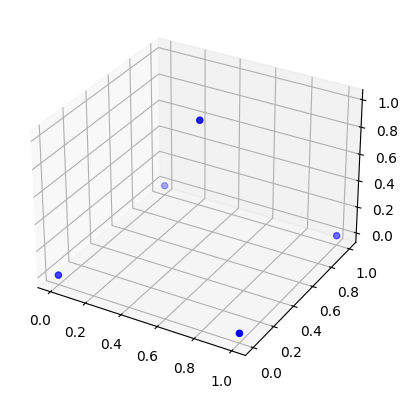

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from alphashape import alphashape

# Replace this array with your own 3D coordinates
points = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
    [1, 1, 0],
    [0.5, 0.5, 1]
])

# Set the alpha parameter (adjust as needed)
alpha = 0.1

# Perform Alpha-shape reconstruction
alpha_shape = alphashape(points, alpha)

# Visualize the 3D points and the Alpha-shape
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b')

# Plot the Alpha-shape faces
for simplex in alpha_shape.simplices:
    poly3d = [[points[i, 0], points[i, 1], points[i, 2]] for i in simplex]
    ax.add_collection3d(Poly3DCollection([poly3d], facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


In [231]:
points = np.array([[1,2,3], [1,2,7]])
points = np.unique(points, axis = 0)
print(points)
points = np.append(points, np.array([[1,2,3], [1,2,7], [1,2,6]]),axis=0)
print(points)
points = np.unique(points, axis = 0)
print(points)

[[1 2 3]
 [1 2 7]]
[[1 2 3]
 [1 2 7]
 [1 2 3]
 [1 2 7]
 [1 2 6]]
[[1 2 3]
 [1 2 6]
 [1 2 7]]


In [343]:
import numpy as np

# Existing array
points = np.array([[1, 2, 3], [1, 2, 7]])

# New elements to be added
new_elements = np.array([[1, 2, 3], [1, 2, 7], [1, 2, 6]])

# Vertically stack the arrays
stacked_array = np.vstack((points, new_elements))

# Remove duplicate rows
unique_points = np.unique(stacked_array, axis=0)

print(unique_points)



[[1 2 3]
 [1 2 6]
 [1 2 7]]


In [240]:
blocks = set()
blocks.add((0,1))
blocks.add((0,2))
blocks.add((0,2))
blocks.add((0,1))
blocks = np.array(list(blocks))
print(blocks[0])

[0 1]


In [246]:
new_elements = np.array([[1, 2, 3], [1, 2, 7], [1, 2, 6]])
new_elements1 = np.array([[1, 2, 3]]).T
all = np.hstack((new_elements,new_elements1))
print(all)

[[1 2 3 1]
 [1 2 7 2]
 [1 2 6 3]]


In [294]:
a = dict()
a[str(1)] = dict()
a[str(1)]["nodes"] = 1
print(a)


{'1': {'nodes': 1}}
1


In [344]:
class Point:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

class Segment:
    def __init__(self, *points):
        self.points = points

# Example Segment with more than two points
segment = Segment(Point(1, 2, 3), Point(4, 5, 6), Point(7, 8, 9))

# Convert Segment to iterable
iterable_segment = [(point.x, point.y, point.z) for point in segment.points]

print(iterable_segment)


[(1, 2, 3), (4, 5, 6), (7, 8, 9)]


In [361]:
import plotly.graph_objects as go

# Define cube vertices
vertices = [
    [-1, -1, -1],
    [1, -1, -1],
    [1, 1, -1],
    [-1, 1, -1],
    [-1, -1, 1],
    [1, -1, 1],
    [1, 1, 1],
    [-1, 1, 1]
]

# Define cube faces
faces = [
    [0, 1, 2, 3],
    [4, 5, 6, 7],
    [0, 3, 7, 4],
    [1, 2, 6, 5],
    [0, 1, 5, 4],
    [2, 3, 7, 6]
]

# Create stress values for each face (replace this with your actual data)
stress_values = [10, 20, 30, 40, 50, 60]

# Create a Plotly figure for the 3D cube
fig = go.Figure()

# Add cube faces to the figure
for face, stress_value in zip(faces, stress_values):
    x = [vertices[i][0] for i in face]
    y = [vertices[i][1] for i in face]
    z = [vertices[i][2] for i in face]

    # Add a surface plot for each face with color representing stress
    fig.add_trace(go.Mesh3d(x=x, y=y, z=z, facecolor =[f'rgba(255, 255, 0, {stress_value/100})'] * 4, opacity=0.7, showscale=False))

# Set layout for the 3D plot
fig.update_layout(scene=dict(aspectmode="data"))
fig.update_traces(showlegend=False)

fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='markers'))
# Show the interactive plot
fig.show()


In [346]:
%pip install plotly

   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.6 MB 4.3 MB/s eta 0:00:04
    --------------------------------------- 0.3/15.6 MB 3.8 MB/s eta 0:00:05
   - -------------------------------------- 0.4/15.6 MB 3.2 MB/s eta 0:00:05
   - -------------------------------------- 0.5/15.6 MB 3.1 MB/s eta 0:00:05
   - -------------------------------------- 0.8/15.6 MB 3.5 MB/s eta 0:00:05
   - -------------------------------------- 0.8/15.6 MB 3.5 MB/s eta 0:00:05
   -- ------------------------------------- 0.9/15.6 MB 3.1 MB/s eta 0:00:05
   -- ------------------------------------- 1.0/15.6 MB 2.9 MB/s eta 0:00:06
   -- ------------------------------------- 1.1/15.6 MB 2.6 MB/s eta 0:00:06
   --- ------------------------------------ 1.2/15.6 MB 2.8 MB/s eta 0:00:06
   --- ------------------------------------ 1.4/15.6 MB 2.7 MB/s eta 0:00:06
   --- ------------------------------------ 1.5/15.6 MB 2.8 MB/s eta 0:00:06
   ---

In [363]:
import plotly.graph_objects as go

# Create a basic scatter plot
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=[1, 2, 3], y=[4, 5, 6], z=[7, 8, 9], mode='markers'))

# Add a 3D mesh surface
fig.add_trace(go.Mesh3d(x=[1, 2, 3], y=[4, 5, 6], z=[7, 8, 9]))

# Show the figure
fig.show()


In [6]:
# Import modules:
import gmsh
import sys
 
# Initialize gmsh:
gmsh.initialize()
 
# cube points:
lc = 0.1
point1 = gmsh.model.geo.add_point(0, 0, 0, lc)
point2 = gmsh.model.geo.add_point(1, 0, 0, lc)
point3 = gmsh.model.geo.add_point(1, 1, 0, lc)
point4 = gmsh.model.geo.add_point(0, 1, 0, lc)
point5 = gmsh.model.geo.add_point(0, 1, 1, lc)
point6 = gmsh.model.geo.add_point(0, 0, 1, lc)
point7 = gmsh.model.geo.add_point(1, 0, 1, lc)
point8 = gmsh.model.geo.add_point(1, 1, 1, lc)
 
# Edge of cube:
line1 = gmsh.model.geo.add_line(point1, point2)
line2 = gmsh.model.geo.add_line(point2, point3)
line3 = gmsh.model.geo.add_line(point3, point4)
line4 = gmsh.model.geo.add_line(point4, point1)
line5 = gmsh.model.geo.add_line(point5, point6)
line6 = gmsh.model.geo.add_line(point6, point7)
line7 = gmsh.model.geo.add_line(point7, point8)
line8 = gmsh.model.geo.add_line(point8, point5)
line9 = gmsh.model.geo.add_line(point4, point5)
line10 = gmsh.model.geo.add_line(point6, point1)
line11 = gmsh.model.geo.add_line(point7, point2)
line12 = gmsh.model.geo.add_line(point3, point8)
 
# faces of cube:
face1 = gmsh.model.geo.add_curve_loop([line1, line2, line3, line4])
face2 = gmsh.model.geo.add_curve_loop([line5, line6, line7, line8])
face3 = gmsh.model.geo.add_curve_loop([line9, line5, line10, -line4])
face4 = gmsh.model.geo.add_curve_loop([line9, -line8, -line12, line3])
face5 = gmsh.model.geo.add_curve_loop([line6, line11, -line1, -line10])
face6 = gmsh.model.geo.add_curve_loop([line11, line2, line12, -line7])
 
# surfaces of cube:
gmsh.model.geo.add_plane_surface([face1])

 
# Create the relevant Gmsh data structures 
# from Gmsh model.
gmsh.model.geo.synchronize()
 
# Generate mesh:
gmsh.model.mesh.generate()
 
# Write mesh data:
gmsh.write("GFG.msh")
 

# It finalize the Gmsh API
gmsh.finalize()

In [19]:
%pip install gmsh

     ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
     ---------------------------------------- 0.2/41.2 MB 5.0 MB/s eta 0:00:09
     ---------------------------------------- 0.4/41.2 MB 3.7 MB/s eta 0:00:12
      --------------------------------------- 0.6/41.2 MB 4.1 MB/s eta 0:00:10
      --------------------------------------- 0.8/41.2 MB 4.5 MB/s eta 0:00:09
      --------------------------------------- 0.8/41.2 MB 4.4 MB/s eta 0:00:10
      --------------------------------------- 0.9/41.2 MB 3.1 MB/s eta 0:00:14
     - -------------------------------------- 1.2/41.2 MB 3.7 MB/s eta 0:00:11
     - -------------------------------------- 1.5/41.2 MB 3.7 MB/s eta 0:00:11
     - -------------------------------------- 1.7/41.2 MB 3.7 MB/s eta 0:00:11
     - -------------------------------------- 2.0/41.2 MB 3.9 MB/s eta 0:00:10
     -- ------------------------------------- 2.3/41.2 MB 4.2 MB/s eta 0:00:10
     -- ------------------------------------- 2.5/41.2 MB 4

In [4]:
import meshio

# Read the mesh file
mesh = meshio.read("GFG.msh")

# Access mesh information
points = mesh.points  # Coordinates of the mesh nodes
cells = mesh.cells  # Connectivity information for mesh elements (e.g., triangles, tetrahedra)
point_data = mesh.point_data  # Data associated with each mesh node
cell_data = mesh.cell_data  # Data associated with each mesh element

# Example: Print the coordinates of the first 5 nodes
print("Coordinates of the first 5 nodes:")
print(points[:5])

# Example: Print connectivity of the first 5 triangles
triangle_cells = None
for cell_block in cells:
    if "triangle" in cell_block.type.lower():
        triangle_cells = cell_block.data
        break

if triangle_cells is not None:
    print(f"Connectivity of the first 5 triangles:")
    print(triangle_cells[:5])
else:
    print("No triangle cells found in the mesh.")



Coordinates of the first 5 nodes:
[[0. 0. 0.]
 [1. 0. 0.]
 [1. 1. 0.]
 [0. 1. 0.]
 [0. 1. 1.]]
Connectivity of the first 5 triangles:
[[147 156 177]
 [197 151 199]
 [190 124 195]
 [181 127 196]
 [127 181 197]]


In [6]:
import meshio

# Read the mesh file
mesh = meshio.read("GFG.msh")

# Access mesh information
points = mesh.points  # Coordinates of the mesh nodes
cells = mesh.cells  # Connectivity information for mesh elements (e.g., triangles, tetrahedra)
point_data = mesh.point_data  # Data associated with each mesh node
cell_data = mesh.cell_data  # Data associated with each mesh element

# Example: Print the coordinates of the first 5 nodes
print("Coordinates of the first 5 nodes:")
print(points[:5])

# Example: Print connectivity of the first 5 triangles
triangle_cells = None
for cell_block in cells:
    if "triangle" in cell_block.type.lower():
        triangle_cells = cell_block.data
        break

if triangle_cells is not None:
    print(f"Connectivity of the first 5 triangles:")
    print(triangle_cells[:5])

    # Get coordinates of each point in the first 5 triangles
    for triangle in triangle_cells[:10]:
        triangle_coordinates = points[triangle]
        print(f"Coordinates of the points in the triangle: {triangle}")
        print(triangle_coordinates)
else:
    print("No triangle cells found in the mesh.")



Coordinates of the first 5 nodes:
[[0. 0. 0.]
 [1. 0. 0.]
 [1. 1. 0.]
 [0. 1. 0.]
 [0. 1. 1.]]
Connectivity of the first 5 triangles:
[[147 156 177]
 [197 151 199]
 [190 124 195]
 [181 127 196]
 [127 181 197]]
Coordinates of the points in the triangle: [147 156 177]
[[0.70445422 0.48366093 0.        ]
 [0.75353581 0.39872547 0.        ]
 [0.81679561 0.48998173 0.        ]]
Coordinates of the points in the triangle: [197 151 199]
[[0.18905757 0.29408424 0.        ]
 [0.3        0.30717968 0.        ]
 [0.25039524 0.38845736 0.        ]]
Coordinates of the points in the triangle: [190 124 195]
[[0.81504074 0.81830244 0.        ]
 [0.91037039 0.75867257 0.        ]
 [0.91675371 0.85087185 0.        ]]
Coordinates of the points in the triangle: [181 127 196]
[[0.18563431 0.17940395 0.        ]
 [0.08660254 0.25       0.        ]
 [0.08296629 0.14988755 0.        ]]
Coordinates of the points in the triangle: [127 181 197]
[[0.08660254 0.25       0.        ]
 [0.18563431 0.17940395 0.      

In [14]:
import meshio
import numpy as np

# Define an array of points (x, y, z)
points_array = np.array([
    [0.0, 0.0, 0.0],
    [1.0, 0.0, 0.0],
    [1.0, 1.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 1.0, 1.0],
])

# Create a mesh object using meshio with entity information for each point
point_data = {"gmsh:dim_tags": np.zeros((points_array.shape[0], 3), dtype=int)}
mesh = meshio.Mesh(points=points_array, cells=[], point_data=point_data)

# Write the mesh data to a file (Gmsh format)
meshio.write("input_mesh.geo", mesh, file_format="gmsh")




# Use Gmsh to mesh the geometry (you need Gmsh installed on your system)
# For simplicity, you can run this command in your terminal:
# gmsh -2 input_mesh.geo -o output_mesh.msh

# Read the mesh data back in Python
mesh = meshio.read("output_mesh.msh")

# Access mesh information
points = mesh.points
cells = mesh.cells

# Example: Print the coordinates of the first 5 nodes
print("Coordinates of the first 5 nodes:")
print(points[:5])

# Example: Print connectivity of the first 5 triangles
triangle_cells = None
for cell_block in cells:
    if "triangle" in cell_block.type.lower():
        triangle_cells = cell_block.data
        break

if triangle_cells is not None:
    print(f"Connectivity of the first 5 triangles:")
    print(triangle_cells[:5])

    # Get coordinates of each point in the first 5 triangles
    for triangle in triangle_cells[:5]:
        triangle_coordinates = points[triangle]
        print(f"Coordinates of the points in the triangle: {triangle}")
        print(triangle_coordinates)
else:
    print("No triangle cells found in the mesh.")


IndexError: index 0 is out of bounds for axis 0 with size 0

In [15]:
import gmsh
import meshio
import numpy as np

# Initialize gmsh:
gmsh.initialize()

# cube points:
lc = 0.1
point1 = gmsh.model.geo.add_point(0, 0, 0, lc)
point2 = gmsh.model.geo.add_point(1, 0, 0, lc)
point3 = gmsh.model.geo.add_point(1, 1, 0, lc)
point4 = gmsh.model.geo.add_point(0, 1, 0, lc)
point5 = gmsh.model.geo.add_point(0, 1, 1, lc)
point6 = gmsh.model.geo.add_point(0, 0, 1, lc)
point7 = gmsh.model.geo.add_point(1, 0, 1, lc)
point8 = gmsh.model.geo.add_point(1, 1, 1, lc)

# Edge of cube:
line1 = gmsh.model.geo.add_line(point1, point2)
line2 = gmsh.model.geo.add_line(point2, point3)
line3 = gmsh.model.geo.add_line(point3, point4)
line4 = gmsh.model.geo.add_line(point4, point1)
line5 = gmsh.model.geo.add_line(point5, point6)
line6 = gmsh.model.geo.add_line(point6, point7)
line7 = gmsh.model.geo.add_line(point7, point8)
line8 = gmsh.model.geo.add_line(point8, point5)
line9 = gmsh.model.geo.add_line(point4, point5)
line10 = gmsh.model.geo.add_line(point6, point1)
line11 = gmsh.model.geo.add_line(point7, point2)
line12 = gmsh.model.geo.add_line(point3, point8)

# faces of cube:
face1 = gmsh.model.geo.add_curve_loop([line1, line2, line3, line4])
face2 = gmsh.model.geo.add_curve_loop([line5, line6, line7, line8])
face3 = gmsh.model.geo.add_curve_loop([line9, line5, line10, -line4])
face4 = gmsh.model.geo.add_curve_loop([line9, -line8, -line12, line3])
face5 = gmsh.model.geo.add_curve_loop([line6, line11, -line1, -line10])
face6 = gmsh.model.geo.add_curve_loop([line11, line2, line12, -line7])

# surfaces of cube:
gmsh.model.geo.add_plane_surface([face1])

# Create the relevant Gmsh data structures from the Gmsh model.
gmsh.model.geo.synchronize()

# Generate mesh:
gmsh.model.mesh.generate()

# Write mesh data:
gmsh.write("GFG.msh")

# It finalizes the Gmsh API
gmsh.finalize()

# Read the mesh file
mesh = meshio.read("GFG.msh")

# Access mesh information
points = mesh.points  # Coordinates of the mesh nodes
cells = mesh.cells  # Connectivity information for mesh elements (e.g., triangles, tetrahedra)
point_data = mesh.point_data  # Data associated with each mesh node
cell_data = mesh.cell_data  # Data associated with each mesh element

# Example: Print the coordinates of the first 5 nodes
print("Coordinates of the first 5 nodes:")
print(points[:5])

# Example: Print connectivity of the first 5 triangles
triangle_cells = None
for cell_block in cells:
    if "triangle" in cell_block.type.lower():
        triangle_cells = cell_block.data
        break

if triangle_cells is not None:
    print(f"Connectivity of the first 5 triangles:")
    print(triangle_cells[:5])

    # Get coordinates of each point in the first 5 triangles
    for triangle in triangle_cells[:5]:
        triangle_coordinates = points[triangle]
        print(f"Coordinates of the points in the triangle: {triangle}")
        print(triangle_coordinates)
else:
    print("No triangle cells found in the mesh.")



Coordinates of the first 5 nodes:
[[0. 0. 0.]
 [1. 0. 0.]
 [1. 1. 0.]
 [0. 1. 0.]
 [0. 1. 1.]]
Connectivity of the first 5 triangles:
[[147 156 177]
 [197 151 199]
 [190 124 195]
 [181 127 196]
 [127 181 197]]
Coordinates of the points in the triangle: [147 156 177]
[[0.70445422 0.48366093 0.        ]
 [0.75353581 0.39872547 0.        ]
 [0.81679561 0.48998173 0.        ]]
Coordinates of the points in the triangle: [197 151 199]
[[0.18905757 0.29408424 0.        ]
 [0.3        0.30717968 0.        ]
 [0.25039524 0.38845736 0.        ]]
Coordinates of the points in the triangle: [190 124 195]
[[0.81504074 0.81830244 0.        ]
 [0.91037039 0.75867257 0.        ]
 [0.91675371 0.85087185 0.        ]]
Coordinates of the points in the triangle: [181 127 196]
[[0.18563431 0.17940395 0.        ]
 [0.08660254 0.25       0.        ]
 [0.08296629 0.14988755 0.        ]]
Coordinates of the points in the triangle: [127 181 197]
[[0.08660254 0.25       0.        ]
 [0.18563431 0.17940395 0.      

In [16]:
import gmsh
import meshio
import numpy as np

# Define nodes using a NumPy array (replace this with your own node coordinates)
nodes_array = np.array([
    [0.0, 0.0, 0.0],
    [1.0, 0.0, 0.0],
    [1.0, 1.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 1.0, 1.0],
    [0.0, 0.0, 1.0],
    [1.0, 0.0, 1.0],
    [1.0, 1.0, 1.0],
])

# Initialize gmsh:
gmsh.initialize()

# Define nodes in Gmsh using the NumPy array:
lc = 0.1
node_tags = [gmsh.model.geo.add_point(x, y, z, lc) for x, y, z in nodes_array]

# Define the cube geometry using the node tags:
line1 = gmsh.model.geo.add_line(node_tags[0], node_tags[1])
line2 = gmsh.model.geo.add_line(node_tags[1], node_tags[2])
line3 = gmsh.model.geo.add_line(node_tags[2], node_tags[3])
line4 = gmsh.model.geo.add_line(node_tags[3], node_tags[0])
line5 = gmsh.model.geo.add_line(node_tags[4], node_tags[5])
line6 = gmsh.model.geo.add_line(node_tags[5], node_tags[6])
line7 = gmsh.model.geo.add_line(node_tags[6], node_tags[7])
line8 = gmsh.model.geo.add_line(node_tags[7], node_tags[4])
line9 = gmsh.model.geo.add_line(node_tags[3], node_tags[4])
line10 = gmsh.model.geo.add_line(node_tags[5], node_tags[0])
line11 = gmsh.model.geo.add_line(node_tags[6], node_tags[1])
line12 = gmsh.model.geo.add_line(node_tags[2], node_tags[7])

# Define faces and surface of the cube:
face1 = gmsh.model.geo.add_curve_loop([line1, line2, line3, line4])
face2 = gmsh.model.geo.add_curve_loop([line5, line6, line7, line8])
face3 = gmsh.model.geo.add_curve_loop([line9, line5, line10, -line4])
face4 = gmsh.model.geo.add_curve_loop([line9, -line8, -line12, line3])
face5 = gmsh.model.geo.add_curve_loop([line6, line11, -line1, -line10])
face6 = gmsh.model.geo.add_curve_loop([line11, line2, line12, -line7])

# Surfaces of the cube:
gmsh.model.geo.add_plane_surface([face1])

# Create the relevant Gmsh data structures from the Gmsh model.
gmsh.model.geo.synchronize()

# Generate mesh:
gmsh.model.mesh.generate()

# Write mesh data:
gmsh.write("GFG.msh")

# It finalizes the Gmsh API
gmsh.finalize()

# Read the mesh file
mesh = meshio.read("GFG.msh")

# Access mesh information
points = mesh.points  # Coordinates of the mesh nodes
cells = mesh.cells  # Connectivity information for mesh elements (e.g., triangles, tetrahedra)
point_data = mesh.point_data  # Data associated with each mesh node
cell_data = mesh.cell_data  # Data associated with each mesh element

# Example: Print the coordinates of the first 5 nodes
print("Coordinates of the first 5 nodes:")
print(points[:5])

# Example: Print connectivity of the first 5 triangles
triangle_cells = None
for cell_block in cells:
    if "triangle" in cell_block.type.lower():
        triangle_cells = cell_block.data
        break

if triangle_cells is not None:
    print(f"Connectivity of the first 5 triangles:")
    print(triangle_cells[:5])

    # Get coordinates of each point in the first 5 triangles
    for triangle in triangle_cells[:5]:
        triangle_coordinates = points[triangle]
        print(f"Coordinates of the points in the triangle: {triangle}")
        print(triangle_coordinates)
else:
    print("No triangle cells found in the mesh.")



Coordinates of the first 5 nodes:
[[0. 0. 0.]
 [1. 0. 0.]
 [1. 1. 0.]
 [0. 1. 0.]
 [0. 1. 1.]]
Connectivity of the first 5 triangles:
[[147 156 177]
 [197 151 199]
 [190 124 195]
 [181 127 196]
 [127 181 197]]
Coordinates of the points in the triangle: [147 156 177]
[[0.70445422 0.48366093 0.        ]
 [0.75353581 0.39872547 0.        ]
 [0.81679561 0.48998173 0.        ]]
Coordinates of the points in the triangle: [197 151 199]
[[0.18905757 0.29408424 0.        ]
 [0.3        0.30717968 0.        ]
 [0.25039524 0.38845736 0.        ]]
Coordinates of the points in the triangle: [190 124 195]
[[0.81504074 0.81830244 0.        ]
 [0.91037039 0.75867257 0.        ]
 [0.91675371 0.85087185 0.        ]]
Coordinates of the points in the triangle: [181 127 196]
[[0.18563431 0.17940395 0.        ]
 [0.08660254 0.25       0.        ]
 [0.08296629 0.14988755 0.        ]]
Coordinates of the points in the triangle: [127 181 197]
[[0.08660254 0.25       0.        ]
 [0.18563431 0.17940395 0.      

In [3]:
import gmsh
import meshio
import numpy as np

# Define nodes using a NumPy array (replace this with your own node coordinates)
nodes_array = np.array([
    [0.0, 0.0, 1],
    [1.0, 0.0, 1],
    [1.0, 1.0, 1],
    [0.0, 1.0, 1],
])

# Initialize gmsh:
gmsh.initialize()

# Define nodes in Gmsh using the NumPy array:
lc = 1
node_tags = [gmsh.model.geo.add_point(x, y, z, lc) for x, y, z in nodes_array]

# Define lines forming a square connected in a loop using a for loop:
lines = []
for i in range(len(node_tags)):
    line = gmsh.model.geo.add_line(node_tags[i], node_tags[(i + 1) % len(node_tags)])
    lines.append(line)

# Define a loop connecting the lines to form a face:
loop = gmsh.model.geo.add_curve_loop(lines)

# Define a surface using the loop:
face = gmsh.model.geo.add_plane_surface([loop])

# Create the relevant Gmsh data structures from the Gmsh model:
gmsh.model.geo.synchronize()

# Generate mesh:
gmsh.model.mesh.generate()

# Write mesh data:
gmsh.write("square_face.msh")

# It finalizes the Gmsh API
gmsh.finalize()

# Read the mesh file
mesh = meshio.read("square_face.msh")

# Access mesh information
points = mesh.points  # Coordinates of the mesh nodes
cells = mesh.cells  # Connectivity information for mesh elements (e.g., triangles, tetrahedra)
point_data = mesh.point_data  # Data associated with each mesh node
cell_data = mesh.cell_data  # Data associated with each mesh element

# Example: Print the coordinates of the first 5 nodes
print("Coordinates of the first 5 nodes:")
print(points[:5])

# Example: Print connectivity of the first 5 triangles
triangle_cells = None
for cell_block in cells:
    if "triangle" in cell_block.type.lower():
        triangle_cells = cell_block.data
        break

if triangle_cells is not None:
    print(f"Connectivity of the first 5 triangles:")
    print(triangle_cells[:5])

    # Get coordinates of each point in the first 5 triangles
    for triangle in triangle_cells[:5]:
        triangle_coordinates = points[triangle]
        print(f"Coordinates of the points in the triangle: {triangle}")
        print(triangle_coordinates)
else:
    print("No triangle cells found in the mesh.")
print(len(triangle_cells))


Coordinates of the first 5 nodes:
[[0.  0.  1. ]
 [1.  0.  1. ]
 [1.  1.  1. ]
 [0.  1.  1. ]
 [0.5 0.5 1. ]]
Connectivity of the first 5 triangles:
[[0 1 4]
 [3 0 4]
 [1 2 4]
 [2 3 4]]
Coordinates of the points in the triangle: [0 1 4]
[[0.  0.  1. ]
 [1.  0.  1. ]
 [0.5 0.5 1. ]]
Coordinates of the points in the triangle: [3 0 4]
[[0.  1.  1. ]
 [0.  0.  1. ]
 [0.5 0.5 1. ]]
Coordinates of the points in the triangle: [1 2 4]
[[1.  0.  1. ]
 [1.  1.  1. ]
 [0.5 0.5 1. ]]
Coordinates of the points in the triangle: [2 3 4]
[[1.  1.  1. ]
 [0.  1.  1. ]
 [0.5 0.5 1. ]]
4


In [45]:
import Geometry3D as G3D
from Geometry3D import *

def difference(polygon1, polygon2):
    # Assuming polygon1 and polygon2 are ConvexPolygons or Segments
    # Find the intersection
    inter = G3D.intersection(polygon1, polygon2)

    # Use the intersection directly if it's a ConvexPolygon
    if isinstance(inter, G3D.ConvexPolygon):
        # Find the difference (complementary part)
        difference_part = G3D.ConvexPolygon(pts=polygon1.points)
        print(difference_part)
        for face in inter.faces:
            # Remove the intersected face from the difference part
            difference_part.remove_face(face.vertices)
    else:  # Handle the case when inter is a Segment or empty
        if inter.is_empty():
            
            difference_part = polygon1.copy()  # Assuming polygon1 has a copy method
        else:
            # For simplicity, use the midpoint of the segment as a point in the difference
            midpoint = G3D.Point(
                (inter.start.x + inter.end.x) / 2,
                (inter.start.y + inter.end.y) / 2,
                (inter.start.z + inter.end.z) / 2,
            )
            difference_part = polygon1.copy()  # Assuming polygon1 has a copy method
            # Remove the points of the intersection segment from the difference part
            difference_part.remove_point(midpoint)

    return difference_part

# Example usage:
a = Point(0, 0, 1)
b = Point(1, 0, 1)
c = Point(1, 1, 1)
d = Point(0, 1, 1)
plane1 = G3D.ConvexPolygon(pts=[a, b, c, d])

a = Point(0, 0, 1)
b = Point(0, 0.5, 1)
c = Point(0.5, 0, 1)
d = Point(0.5, 0.5, 1)
plane2 = G3D.ConvexPolygon(pts=[a, b, c, d])

inter = G3D.intersection(plane1, plane2)
print("Intersection:", inter)

difference_part = difference(plane1, inter)
print("Difference (Complementary Part):", difference_part)


Intersection: ConvexPolygon((Point(0.5, 0.0, 1.0), Point(0.5, 0.5, 1.0), Point(0.0, 0.5, 1.0), Point(0, 0, 1)))
ConvexPolygon((Point(0, 0, 1), Point(1, 0, 1), Point(1, 1, 1), Point(0, 1, 1)))


AttributeError: 'ConvexPolygon' object has no attribute 'faces'

In [58]:
from shapely.geometry import Polygon

# Define the coordinates of the first polygon
polygon1_coords = [(0, 0), (1, 0), (1, 1), (0, 1)]

# Define the coordinates of the second polygon
polygon2_coords = [(0, 0), (0.5, 0), (0.5, 0.5), (0, 0.5)]

# Create Shapely Polygon objects
polygon1 = Polygon(polygon1_coords)
polygon2 = Polygon(polygon2_coords)

# Check if the polygons are valid
if not polygon1.is_valid or not polygon2.is_valid:
    # If not valid, try to fix or simplify
    polygon1 = polygon1.buffer(0)
    polygon2 = polygon2.buffer(0)

# Find the difference (complementary part) between the two polygons
difference_polygon = polygon1.difference(polygon2)

print(difference_polygon)
# Check if the result is a MultiPolygon (in case of multiple disjoint parts)
if difference_polygon.geom_type == 'MultiPolygon':
    # Iterate over the parts and print their coordinates
    for part in difference_polygon:
        print("Difference Part:")
        print(list(part.exterior.coords))
else:
    # Print the coordinates of the difference polygon
    print("Difference:")
    print(list(difference_polygon.exterior.coords))


POLYGON ((0 1, 1 1, 1 0, 0.5 0, 0.5 0.5, 0 0.5, 0 1))
Difference:
[(0.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.5, 0.0), (0.5, 0.5), (0.0, 0.5), (0.0, 1.0)]


In [63]:
import pyvista as pv
import tripy
import numpy as np
from shapely.geometry import Polygon

def vtk_polydata_from_polygon(coords):
    triangles = tripy.earclip(coords)
    triangles = np.array(triangles).reshape(-1, 3)
    
    # Create vtk cells
    cells = np.full((len(triangles), 4), 3, dtype=np.int)
    cells[:, 1:] = triangles

    poly = pv.PolyData()
    poly.points = np.array(coords)
    poly.cells = cells

    return poly

def shapely_difference(polygon1, polygon2):
    shapely_polygon1 = Polygon(polygon1)
    shapely_polygon2 = Polygon(polygon2)

    difference = shapely_polygon1.difference(shapely_polygon2)

    if difference.geom_type == 'Polygon':
        return np.array(difference.exterior.coords)
    elif difference.geom_type == 'MultiPolygon':
        return [np.array(p.exterior.coords) for p in difference]

# Define the coordinates of the first polygon
polygon1_coords = [(0, 0, 0), (1, 0, 0), (1, 1, 0), (0, 1, 0)]

# Define the coordinates of the second polygon
polygon2_coords = [(0.5, 0.5, 0), (1.5, 0.5, 0), (1.5, 1.5, 0), (0.5, 1.5, 0)]

# Convert polygons to PolyData
poly1 = vtk_polydata_from_polygon(polygon1_coords)
poly2 = vtk_polydata_from_polygon(polygon2_coords)

# Find the difference using shapely
difference_coords = shapely_difference(polygon1_coords, polygon2_coords)

# Convert the result to PolyData
difference_poly = vtk_polydata_from_polygon(difference_coords)

# Plot the result
plotter = pv.Plotter()
plotter.add_mesh(poly1, color="red", opacity=0.5)
plotter.add_mesh(poly2, color="green", opacity=0.5)
plotter.add_mesh(difference_poly, color="blue", opacity=0.5)
plotter.show()


TypeError: __new__() takes 3 positional arguments but 4 were given

In [60]:
%pip install pyvista

   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.9 MB 6.4 MB/s eta 0:00:01
   -- ------------------------------------- 0.1/1.9 MB 6.4 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.9 MB 2.5 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.9 MB 2.5 MB/s eta 0:00:01
   ----- ---------------------------------- 0.3/1.9 MB 1.1 MB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.9 MB 1.1 MB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.9 MB 999.0 kB/s eta 0:00:02
   --------- ------------------------------ 0.5/1.9 MB 1.2 MB/s eta 0:00:02
   ----------- ---------------------------- 0.6/1.9 MB 1.3 MB/s eta 0:00:02
   --------------- ------------------------ 0.7/1.9 MB 1.5 MB/s eta 0:00:01
   ----------------- ---------------------- 0.8/1.9 MB 1.6 MB/s eta 0:00:01
   ----------------------- ---------------- 1.1/1.9 MB 1.9 MB/s eta 0:00:01
   --------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
%pip install rhino3dm

   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
    --------------------------------------- 0.0/2.3 MB 1.3 MB/s eta 0:00:02
   - -------------------------------------- 0.1/2.3 MB 871.5 kB/s eta 0:00:03
   - -------------------------------------- 0.1/2.3 MB 871.5 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/2.3 MB 599.1 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/2.3 MB 599.1 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/2.3 MB 532.5 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/2.3 MB 532.5 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/2.3 MB 532.5 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/2.3 MB 532.5 kB/s eta 0:00:05
   -- ------------------------------------- 0.2/2.3 MB 350.7 kB/s eta 0:00:07
   -- ------------------------------------- 0.2/2.3 MB 350.7 kB/s eta 0:00:07
   -- ------------------------------------- 0.2/2.3 MB 308.0 kB/s eta 0:00:

In [79]:
import rhino3dm

def read_rhino_file(file_path):
    # Read the Rhino file
    model = rhino3dm.File3dm.Read(file_path)

    # Extract points
    points = [point.Location for point in model.Objects if isinstance(point.Geometry, rhino3dm.Point)]
    
    # Extract edges with node connectivities
    edges = []
    for curve_object in model.Objects:
        if isinstance(curve_object.Geometry, rhino3dm.Curve):
            curve = curve_object.Geometry
            if isinstance(curve, rhino3dm.PolylineCurve):
                # Extract node connectivities for polyline curves
                node_connectivities = [point_index for point_index in curve.Points.GetPointIndices()]
                edges.append({"type": "PolylineCurve", "nodes": node_connectivities})
            elif isinstance(curve, rhino3dm.PolyCurve):
                # Extract node connectivities for polycurves
                sub_curves = curve.Curves
                for sub_curve in sub_curves:
                    if isinstance(sub_curve, rhino3dm.PolylineCurve):
                        node_connectivities = [point_index for point_index in sub_curve.Points.GetPointIndices()]
                        edges.append({"type": "PolylineCurve", "nodes": node_connectivities})

    # Close the model
    #model.Dispose()

    return points, edges

# Specify the path to your Rhino file
rhino_file_path = "C:\\Users\\mmoussa\\Desktop\\rhino_test\\test.3dm"

# Read the Rhino file and get points and edges
points, edges = read_rhino_file(rhino_file_path)

# Print the results
print("Points:")
for i, point in enumerate(points):
    print(f"Point {i + 1}: ({point.X}, {point.Y}, {point.Z})")

print("\nEdges:")
for i, edge in enumerate(edges):
    print(f"Edge {i + 1}: {edge}")


Points:

Edges:


In [197]:
import rhino3dm

def read_rhino_surfaces(file_path):
    # Read the Rhino file
    count = 0
    model = rhino3dm.File3dm.Read(file_path)

    # Extract surface control points and connectivity
    surfaces = []
    for geometry in model.Objects:
        print("hello")
        
        if isinstance(geometry.Geometry, rhino3dm.Brep):
            brep = geometry.Geometry
            edges = brep.Edges
            surface = brep.Surfaces
            print(len(surface))

            
            
            for index in range(len(surface)):
                face = surface[index]
                nurbs_surface = face.ToNurbsSurface()
                if nurbs_surface:
                    
                    control_points = nurbs_surface.Points
                    
                    print("yes")
                    for u in range(control_points.CountU):
                        for v in range(control_points.CountV):
                            point = control_points.GetControlPoint(u, v)
                            
                            print(f"  ({point.X}, {point.Y}, {point.Z})")
                
           
            
            for edge in range(len(edges)):
                count += 1
                points = edges.__getitem__(edge)
                start = points.PointAtStart
                end = points.PointAtEnd
                print(start,end)
                
            
    print(count)
    # Close the model
    #model.Dispose()

    return surfaces

# Specify the path to your Rhino file
rhino_file_path = "C:\\Users\\mmoussa\\Desktop\\rhino_test\\test.3dm"

# Read the Rhino file and get surfaces' control points and edges
surfaces_data = read_rhino_surfaces(rhino_file_path)

# Print the results
for i, surface in enumerate(surfaces_data):
    print(f"Surface {i + 1}:")
    print("Control Points:")
    for j, control_point in enumerate(surface["control_points"]):
        print(f"  Control Point {j + 1}: {control_point}")

    print("Edges:")
    for j, edge in enumerate(surface["edges"]):
        print(f"  Edge {j + 1}: {edge}")
    print("\n")


hello
6
yes
  (-21.940172335387537, 17.131037907517246, 0.0)
  (-21.940172335387537, 17.131037907517246, 2.376363310544071)
  (-16.099204179341655, 17.131037907517246, 0.0)
  (-16.099204179341655, 17.131037907517246, 2.376363310544071)
yes
  (-16.099204179341655, 17.131037907517246, 0.0)
  (-16.099204179341655, 17.131037907517246, 2.376363310544071)
  (-16.099204179341655, 23.686392526971396, 0.0)
  (-16.099204179341655, 23.686392526971396, 2.376363310544071)
yes
  (-16.099204179341655, 23.686392526971396, 0.0)
  (-16.099204179341655, 23.686392526971396, 2.376363310544071)
  (-21.940172335387537, 23.686392526971396, 0.0)
  (-21.940172335387537, 23.686392526971396, 2.376363310544071)
yes
  (-21.940172335387537, 23.686392526971396, 0.0)
  (-21.940172335387537, 23.686392526971396, 2.376363310544071)
  (-21.940172335387537, 17.131037907517246, 0.0)
  (-21.940172335387537, 17.131037907517246, 2.376363310544071)
yes
  (-21.940172335387537, 17.131037907517246, 0.0)
  (-21.940172335387537, 23.

In [226]:
import rhino3dm

def read_rhino_surfaces(file_path):
    # Read the Rhino file
    count = 0
    model = rhino3dm.File3dm.Read(file_path)

    # Extract surface control points and connectivity
    surfaces = []
    for geometry in model.Objects:
        print("hello")
        
        if isinstance(geometry.Geometry, rhino3dm.Brep):
            brep = geometry.Geometry
            edges = brep.Edges
            faces = brep.Faces
            print(faces)
            surfaces += faces  # Use += to extend the surfaces list
            print(len(surfaces))

            for index, face in enumerate(faces):
                
                nurbs_surface = face.ToNurbsSurface()
                if nurbs_surface:
                    control_points = nurbs_surface.Points
                    print(control_points.CountU)
                    print("yes")
                    for u in range(control_points.CountU):
                        for v in range(control_points.CountV):
                            point = control_points.GetControlPoint(u, v)
                            print(f"  ({point.X}, {point.Y}, {point.Z})")
                
            for edge in range(len(edges)):
                count += 1
                points = edges.__getitem__(edge)
                start = points.PointAtStart
                end = points.PointAtEnd
                print(start, end)
                
    print(count)

    return surfaces

# Specify the path to your Rhino file
rhino_file_path = "C:\\Users\\mmoussa\\Desktop\\rhino_test\\test.3dm"

# Read the Rhino file and get surfaces' control points and edges
surfaces_data = read_rhino_surfaces(rhino_file_path)

# Print the results
for i, surface in enumerate(surfaces_data):
    print(f"Surface {i + 1}:")
    print("Control Points:")
    for j, control_point in enumerate(surface.Points):
        print(f"  Control Point {j + 1}: ({control_point.Location.X}, {control_point.Location.Y}, {control_point.Location.Z})")

    print("Edges:")
    for j, edge in enumerate(surface.Edges):
        print(f"  Edge {j + 1}: {edge}")
    print("\n")


hello
11
2
yes
  (-28.210837098572707, 17.263383398319903, 7.243461477800437)
  (-28.210837098572707, 17.941000634809452, 7.243461477800437)
  (-27.860650996927276, 17.263383398319903, 7.243461477800437)
  (-27.860650996927276, 17.941000634809452, 7.243461477800437)
2
yes
  (-31.015601437891398, 17.20571575512309, 7.243461477800437)
  (-31.015601437891398, 17.941000634809452, 7.243461477800437)
  (-29.923207548615814, 17.20571575512309, 7.243461477800437)
  (-29.923207548615814, 17.941000634809452, 7.243461477800437)
2
yes
  (-29.438126217409337, 17.2386235259087, 7.243461477800437)
  (-29.438126217409337, 17.941000634809452, 7.243461477800437)
  (-28.64098229195411, 17.2386235259087, 7.243461477800437)
  (-28.64098229195411, 17.941000634809452, 7.243461477800437)
2
yes
  (-31.015601437891398, 15.24341697351201, 7.243461477800437)
  (-31.015601437891398, 15.710232905459804, 7.243461477800437)
  (-30.075986316189805, 15.24341697351201, 7.243461477800437)
  (-30.075986316189805, 15.71023

AttributeError: 'rhino3dm._rhino3dm.BrepFace' object has no attribute 'Points'

In [186]:
import rhino3dm

def read_rhino_surfaces(file_path):
    # Read the Rhino file
    count = 0
    model = rhino3dm.File3dm.Read(file_path)

    # Extract surface control points and connectivity
    surfaces = []
    for geometry in model.Objects:
        print("hello")
        
        if isinstance(geometry.Geometry, rhino3dm.Brep):
            brep = geometry.Geometry
            edges = brep.Edges
            faces = brep.Faces
            surfaces += faces  # Use += to extend the surfaces list
            print(len(surfaces))

            for index, face in enumerate(faces):
                # Use Brep.Trim to get the trimmed surface
                trimmed_brep = brep.Faces[index].DuplicateFace(False)
                brep.Trim(face, model.ModelAbsoluteTolerance)
                
                if trimmed_brep:
                    control_points = trimmed_brep.Surfaces[0].Points
                    
                    print("yes")
                    for u in range(control_points.CountU):
                        for v in range(control_points.CountV):
                            point = control_points.GetControlPoint(u, v)
                            print(f"  ({point.Location.X}, {point.Location.Y}, {point.Location.Z})")
                
            for edge in range(len(edges)):
                count += 1
                points = edges.__getitem__(edge)
                start = points.PointAtStart
                end = points.PointAtEnd
                print(start, end)
                
    print(count)

    return surfaces

# Specify the path to your Rhino file
rhino_file_path = "C:\\Users\\mmoussa\\Desktop\\rhino_test\\test.3dm"

# Read the Rhino file and get surfaces' control points and edges
surfaces_data = read_rhino_surfaces(rhino_file_path)

# Print the results
for i, surface in enumerate(surfaces_data):
    print(f"Surface {i + 1}:")
    print("Control Points:")
    for j, control_point in enumerate(surface.Points):
        print(f"  Control Point {j + 1}: ({control_point.Location.X}, {control_point.Location.Y}, {control_point.Location.Z})")

    print("Edges:")
    for j, edge in enumerate(surface.Edges):
        print(f"  Edge {j + 1}: {edge}")
    print("\n")


hello
8


AttributeError: 'rhino3dm._rhino3dm.Brep' object has no attribute 'Trim'

In [189]:
import rhinoscriptsyntax as rs

def read_rhino_surfaces(file_path):
    # Read the Rhino file
    model_id = rs.ReadFile(file_path)
    if not model_id:
        print("Failed to read Rhino file.")
        return

    count = 0
    surfaces = []

    # Iterate through all objects in the model
    for obj_id in rs.AllObjects():
        if rs.IsBrep(obj_id):
            brep = rs.coercebrep(obj_id)
            
            # Extract the surfaces from the Brep
            brep_surfaces = rs.ExplodePolysurfaces(brep, True)
            
            if brep_surfaces:
                surfaces += brep_surfaces
                print(f"Number of surfaces: {len(brep_surfaces)}")

                # Print control points of each surface
                for surface_id in brep_surfaces:
                    control_points = rs.SurfaceEditPoints(surface_id)
                    if control_points:
                        print("Control Points:")
                        for point in control_points:
                            print(f"  ({point[0]}, {point[1]}, {point[2]})")

                count += len(brep_surfaces)

    print(f"Total number of surfaces: {count}")

    # Delete temporary surfaces
    rs.DeleteObjects(surfaces)

# Specify the path to your Rhino file
rhino_file_path = "C:\\Users\\mmoussa\\Desktop\\rhino_test\\test.3dm"

# Read the Rhino file and get surfaces' control points
read_rhino_surfaces(rhino_file_path)


ModuleNotFoundError: No module named 'rhinoscriptsyntax'

In [216]:
%pip  install rhinoscriptsyntax

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement rhinoscriptsyntax (from versions: none)
ERROR: No matching distribution found for rhinoscriptsyntax


In [193]:
import rhino3dm

def save_rhino_file(brep, file_path):
    model = rhino3dm.File3dm()
    model.Objects.AddBrep(brep)
    model.Write(file_path)

def read_rhino_surfaces(file_path):
    model = rhino3dm.File3dm.Read(file_path)

    count = 0
    surfaces = []

    for geometry in model.Objects:
        if isinstance(geometry.Geometry, rhino3dm.Brep):
            brep = geometry.Geometry
            surfaces += brep.Faces

            for index, face in enumerate(brep.Faces):
                nurbs_surface = face.UnderlyingSurface()
                control_points = nurbs_surface.Points
                
                print("yes")
                for u in range(control_points.CountU):
                    for v in range(control_points.CountV):
                        point = control_points.GetControlPoint(u, v)
                        print(f"  ({point.Location.X}, {point.Location.Y}, {point.Location.Z})")

                count += 1

    print(f"Total number of surfaces: {count}")

# Create or load a Brep (or any other geometry) to be saved
# For example, create a simple box


# Specify the path to save the Rhino file
save_path = "C:\\Users\\mmoussa\\Desktop\\rhino_test\\saved_file.3dm"




In [18]:
import numpy as np
from stl import mesh
import tripy

# Load STL file
stl_filename = "C:\\Users\\mmoussa\\Desktop\\rhino_test\\test.stl"
mesh_data = mesh.Mesh.from_file(stl_filename)

# Access vertices and normals
vertices = mesh_data.vectors
normals = mesh_data.normals

# Function to calculate centroid
def calculate_centroid(face_vertices):
    return np.mean(face_vertices, axis=0)

# Result table to store face information with outward normals
result_table = []

# Iterate through facets (faces)
for i, (normal, vertex) in enumerate(zip(normals, vertices)):
    # Use tripy library to identify faces
    faces = tripy.earclip(vertex)

    # Iterate through faces
    for face_vertices in faces:
        # Calculate centroid of the face
        face_centroid = calculate_centroid(face_vertices)

        # Calculate the vector from mesh centroid to face centroid
        centroid_vector = face_centroid - calculate_centroid(vertex)

        # Check if the normal is inward and flip it if needed
        if np.dot(centroid_vector, normal) < 0:
            normal = -normal

        # Store the face information (points and outward normal)
        face_info = {
            "face_number": i + 1,
            "vertices": face_vertices.tolist(),
            "outward_normal": normal.tolist()
        }

        # Append the face information to the result_table
        result_table.append(face_info)

# Print or process the result_table as needed
for face_info in result_table:
    print(f"Face {face_info['face_number']}:")
    print(f"  Vertices:")
    for j, v in enumerate(face_info['vertices']):
        print(f"    Vertex {j + 1}: {v}")
    print(f"  Outward Normal: {face_info['outward_normal']}\n")


TypeError: __new__() takes 3 positional arguments but 4 were given

In [21]:
from stepfile import StepFile

def get_points(face):
    return [(point.x, point.y, point.z) for point in face.vertices]

def extract_solids(step_file):
    solids = []

    for entity in step_file:
        if entity.is_a('ADVANCED_BREP_SHAPE'):
            solid_data = {'type': 'ADVANCED_BREP_SHAPE', 'surfaces': []}

            for face in entity.faces:
                surface_data = {'type': 'FACE', 'points': get_points(face)}
                solid_data['surfaces'].append(surface_data)

            solids.append(solid_data)

    return solids

def main():
    step_filename = "your_file.stp"

    # Load the STEP file
    step_file = StepFile(step_filename)

    # Extract solids, surfaces, and points
    solids_data = extract_solids(step_file)

    # Print the extracted data
    for i, solid_data in enumerate(solids_data, start=1):
        print(f"Solid {i}:")
        print(f"  Type: {solid_data['type']}")
        for j, surface_data in enumerate(solid_data['surfaces'], start=1):
            print(f"    Surface {j}:")
            print(f"      Type: {surface_data['type']}")
            print(f"      Points: {surface_data['points']}")
        print("\n")

if __name__ == "__main__":
    main()


ModuleNotFoundError: No module named 'stepfile'

In [8]:
import numpy as np
from stl import mesh

# Load STL file
stl_filename = "C:\\Users\\mmoussa\\Desktop\\rhino_test\\test.stl"
mesh_data = mesh.Mesh.from_file(stl_filename)

# Access vertices and normals
vertices = mesh_data.vectors
normals = mesh_data.normals

# Result table to store face information with outward normals
result_table = []

# Iterate through facets (faces)
for i, (normal, vertex) in enumerate(zip(normals, vertices)):
    # Calculate the centroid of the face
    centroid = np.mean(vertex, axis=0)
    
    # Check if the centroid is in the same direction as the normal
    if np.dot(centroid - vertex[0], normal) < 0:
        
        # If centroid is in opposite direction, invert the normal to make it outward
        normal = -normal
        

    # Store the face information (points and outward normal)
    face_info = {
        "face_number": i + 1,
        "vertices": vertex.tolist(),
        "outward_normal": normal.tolist()
    }

    # Append the face information to the result_table
    result_table.append(face_info)

# Print or process the result_table as needed
for face_info in result_table:
    print(f"Face {face_info['face_number']}:")
    print(f"  Vertices:")
    for j, v in enumerate(face_info['vertices']):
        print(f"    Vertex {j + 1}: {v}")
    print(f"  Outward Normal: {face_info['outward_normal']}\n")


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1.3883501e-05
-1.3883501e-05
-5.573006e-05
-4.1846557e-05
-5.573006e-05
-4.1846557e-05
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Face 1:
  Vertices:
    Vertex 1: [-52.46377944946289, 17.673593521118164, 4.173055648803711]
    Vertex 2: [-55.57533264160156, 17.673593521118164, 4.173055648803711]
    Vertex 3: [-55.57533264160156, 17.673593521118164, 0.0]
  Outward Normal: [-0.0, -12.984684944152832, 0.0]

Face 2:
  Vertices:
    Vertex 1: [-52.46377944946289, 17.673593521118164, 4.173055648803711]
    Vertex 2: [-48.573604583740234, 17.673593521118164, 0.0]
    Vertex 3: [-49.35222244262695, 17.673593521118164, 4.173055648803711]
  Outward Normal: [0.0, -12.984700202941895, 0.0]

Face 3:
  Vertices:
    Vertex 1: [-48.573604583740234, 17.673593521118164, 0.0]
    Vertex 2: [-52.46377944946289, 17.673593521118164, 4.173055

In [234]:

%pip uninstall stl



^C
Note: you may need to restart the kernel to use updated packages.


In [235]:
%pip install numpy-stl

Note: you may need to restart the kernel to use updated packages.


In [236]:
pip install --upgrade numpy-stl


Note: you may need to restart the kernel to use updated packages.


In [25]:
%pip install Stepfile


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement Stepfile (from versions: none)
ERROR: No matching distribution found for Stepfile


In [10]:

from OCC.Core.GProp import GProp_GProps
from OCC.Core.BRepGProp import brepgprop_VolumeProperties
from OCC.Extend.DataExchange import read_step_file

my_shape = read_step_file(path_to_file)
prop = GProp_GProps()
tolerance = 1e-5 # Adjust to your liking
volume = brepgprop_VolumeProperties(myshape, prop, tolerance)
print(volume)

ModuleNotFoundError: No module named 'OCC'

In [12]:
pip install pysteps


     ---------------------------------------- 0.0/503.0 kB ? eta -:--:--
     ------- ------------------------------- 92.2/503.0 kB 1.7 MB/s eta 0:00:01
     ------------ ------------------------- 163.8/503.0 kB 2.0 MB/s eta 0:00:01
     --------------------------------- ---- 440.3/503.0 kB 3.1 MB/s eta 0:00:01
     -------------------------------------- 503.0/503.0 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached jsmin-3.0.1-py3-none-any.whl
  Created wheel for pysteps: filename=pysteps-1.7.4-cp38-cp38-win_amd64.whl size=778833 sha256=1a6721c19bc1c3f3b273e1c58ca99138

In [10]:
from pysteps import reader


ImportError: cannot import name 'reader' from 'pysteps' (c:\users\mmoussa\appdata\local\programs\python\python38\lib\site-packages\pysteps\__init__.py)

In [16]:
%pip install --upgrade pysteps

Note: you may need to restart the kernel to use updated packages.


In [10]:
class Solid:
    def __init__(self):
        self.vertices = []
        self.faces = []

def parse_step_file(file_path):
    solid = Solid()

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line.startswith("v"):
                # Parse vertices
                _, x, y, z = line.split()
                solid.vertices.append((float(x), float(y), float(z)))
            elif line.startswith("f"):
                # Parse faces
                _, *vertices = line.split()
                solid.faces.append([int(v) for v in vertices])

    return solid

# Example usage
step_file_path = 'C:\\Users\\mmoussa\\Desktop\\rhino_test\\test.txt'
solid = parse_step_file(step_file_path)

# Print the extracted information
print("Solid Information:")
print("Vertices:", solid.vertices)
print("Faces:", solid.faces)




Solid Information:
Vertices: []
Faces: []


In [23]:
import occ
from OCC.STEPControl import STEPControl_Reader


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pythonocc-core (from versions: none)
ERROR: No matching distribution found for pythonocc-core


In [24]:
%pip install OCC

Note: you may need to restart the kernel to use updated packages.


In [5]:
from OCC.TopExp import TopExp_Explorer
from OCC.TopAbs import TopAbs_SOLID


ModuleNotFoundError: No module named 'OCC'

In [6]:
from OCC.gp import gp_Pnt, gp_Pln, gp_Dir

ModuleNotFoundError: No module named 'OCC'